# Information datasets

In [21]:
import torch
#import torch.nn as nn
#from torch.utils.data import TensorDataset, ConcatDataset

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import mplhep as hep

In [34]:
import gc

In [4]:
plt.style.use(hep.cms.style.ROOT)

In [5]:
display_names = ['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks']

In [6]:
categories = ['b', 'bb', 'c', 'udsg']
labels = [0, 1, 2, 3]

In [8]:
default = 0.001

## Flavour distributions and length of each preprocessed file

In [43]:
length_tr = np.zeros(49)
length_va = np.zeros(49)
length_te = np.zeros(49)

In [51]:
flavours = np.zeros((3,4))
for k in range(49):
    tr = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/train_targets_{k}_with_default_{default}.pt')
    va = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/val_targets_{k}_with_default_{default}.pt')
    te = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/test_targets_{k}_with_default_{default}.pt')
    length_tr[k] = len(tr)
    length_va[k] = len(va)
    length_te[k] = len(te)
    for f in range(4):
        flavours[0][f] += len(tr[tr==f])
        flavours[1][f] += len(va[va==f])
        flavours[2][f] += len(te[te==f])
del tr
del va
del te
gc.collect()

4899

In [47]:
with open('/home/um106329/aisafety/april_21/length_tr.npy', 'wb') as f:
    np.save(f, length_tr)

In [48]:
with open('/home/um106329/aisafety/april_21/length_va.npy', 'wb') as f:
    np.save(f, length_va)

In [49]:
with open('/home/um106329/aisafety/april_21/length_te.npy', 'wb') as f:
    np.save(f, length_te)

In [36]:
flavours

array([[41290360.,   625907.,  6836812., 12909420.],
       [ 4589644.,    69373.,   759519.,  1432880.],
       [11469557.,   173300.,  1899465.,  3586183.]])

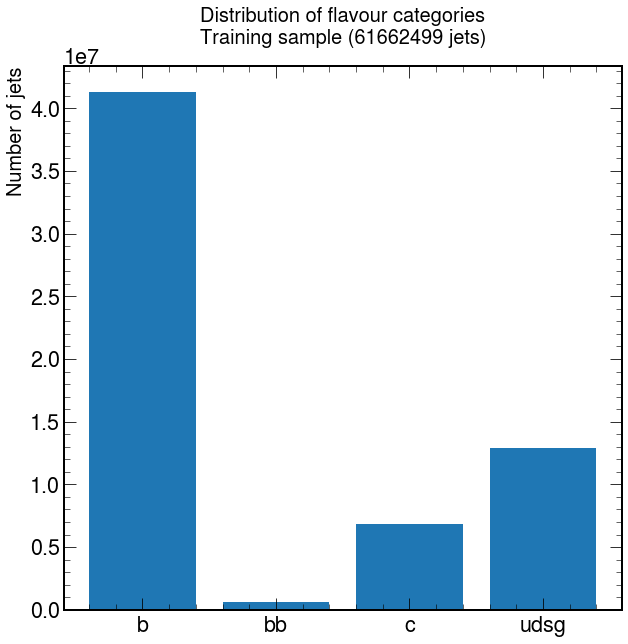

In [52]:
plt.title(f'Distribution of flavour categories\nTraining sample ({int(sum(flavours[0]))} jets)', fontsize=20,
              y=1.03)
plt.bar(labels, flavours[0])
plt.xticks(labels, categories)
plt.ylabel('Number of jets', fontsize=20)
plt.savefig(f'/home/um106329/aisafety/april_21/training_flavour_distribution.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

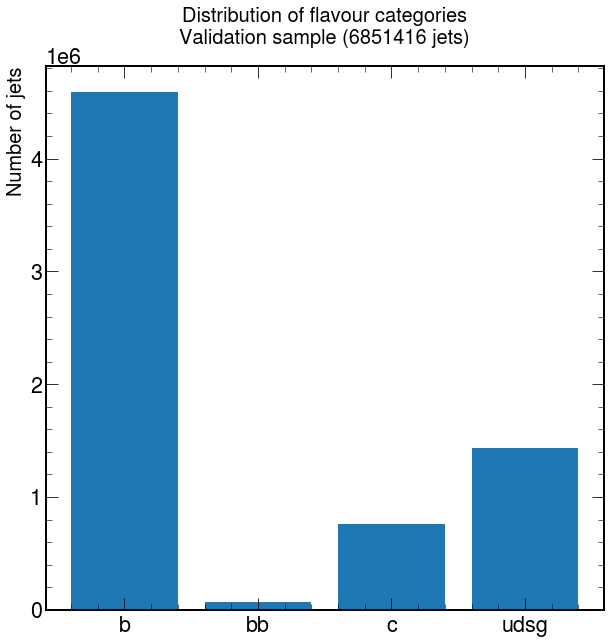

In [53]:
plt.title(f'Distribution of flavour categories\nValidation sample ({int(sum(flavours[1]))} jets)', fontsize=20,
              y=1.03)
plt.bar(labels, flavours[1])
plt.xticks(labels, categories)
plt.ylabel('Number of jets', fontsize=20)
plt.savefig(f'/home/um106329/aisafety/april_21/validation_flavour_distribution.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

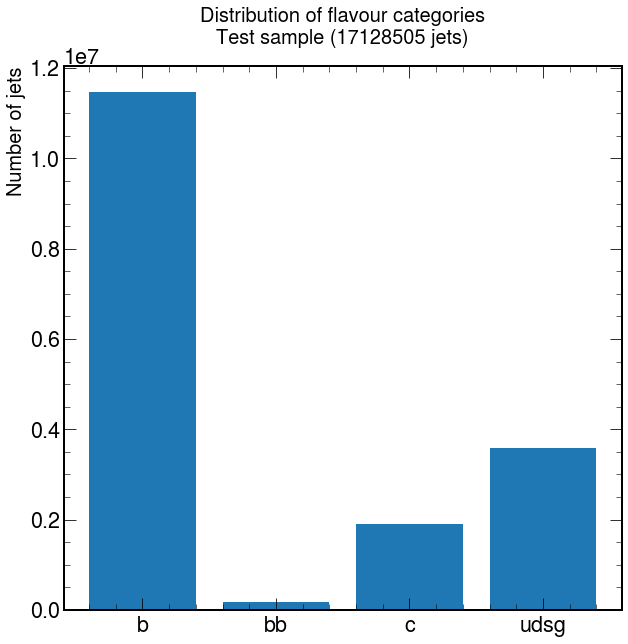

In [54]:
plt.title(f'Distribution of flavour categories\nTest sample ({int(sum(flavours[2]))} jets)', fontsize=20,
              y=1.03)
plt.bar(labels, flavours[2])
plt.xticks(labels, categories)
plt.ylabel('Number of jets', fontsize=20)
plt.savefig(f'/home/um106329/aisafety/april_21/test_flavour_distribution.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

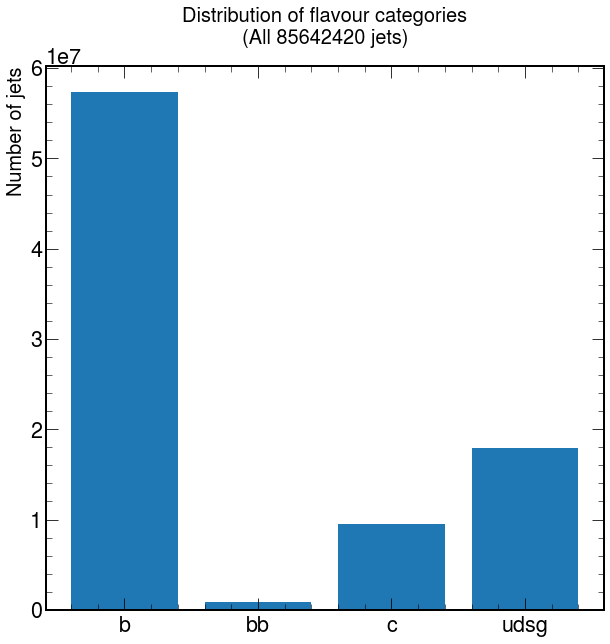

In [55]:
plt.title(f'Distribution of flavour categories\n(All {int(sum(flavours[0]+flavours[1]+flavours[2]))} jets)', fontsize=20,
              y=1.03)
plt.bar(labels, flavours[0]+flavours[1]+flavours[2])
plt.xticks(labels, categories)
plt.ylabel('Number of jets', fontsize=20)
plt.savefig(f'/home/um106329/aisafety/april_21/total_flavour_distribution.png', bbox_inches='tight', dpi=600, facecolor='w', transparent=False)

## All input distributions (for one file only)

#### For comparison of the cleaned files with the cleaned + scaled + inverse_transformed files, each input variable is listed twice
Additionally, log-scale and linear-scale are used in separate cells.

In [29]:
def plot_in(var, sample, scalers, title,log=True):
    plt.hist(scalers[var].inverse_transform(sample[:,var]), log=log, bins=100)
    plt.title(title, y=1.02)
    plt.xlabel(display_names[var])
    plt.ylabel('Jets')
    plt.show()

In [30]:
def plot_in_prescale(var, sample, title,log=True):
    plt.hist(sample[:,var], log=log, bins=100)
    plt.title(title, y=1.02)
    plt.xlabel(display_names[var])
    plt.ylabel('Jets')
    plt.show()

In [8]:
start = 0
end = 49

In [9]:
singleDataset = np.load(f'/hpcwork/um106329/april_21/cleaned_TT/inputs_{start}_to_{end}_with_default_{default}.npy')

In [22]:
singleTrain = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/train_inputs_0_with_default_{default}.pt')
singleVal = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/val_inputs_0_with_default_{default}.pt')
singleTest = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/test_inputs_0_with_default_{default}.pt')

In [23]:
singleScalers = torch.load(f'/hpcwork/um106329/april_21/scaled_TT/scalers_0_with_default_{default}.pt')

In [27]:
singleScaledDataset = torch.cat((singleTrain, singleVal, singleTest)).float()

In [14]:
n_total = len(singleDataset)

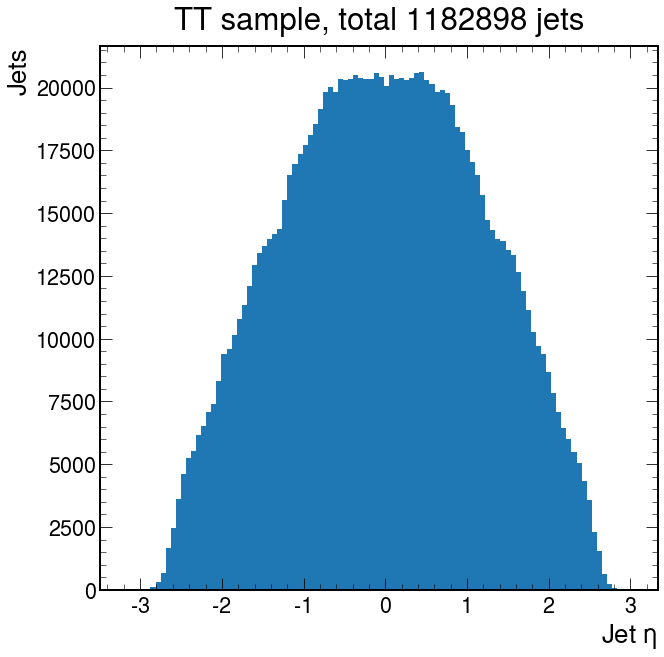

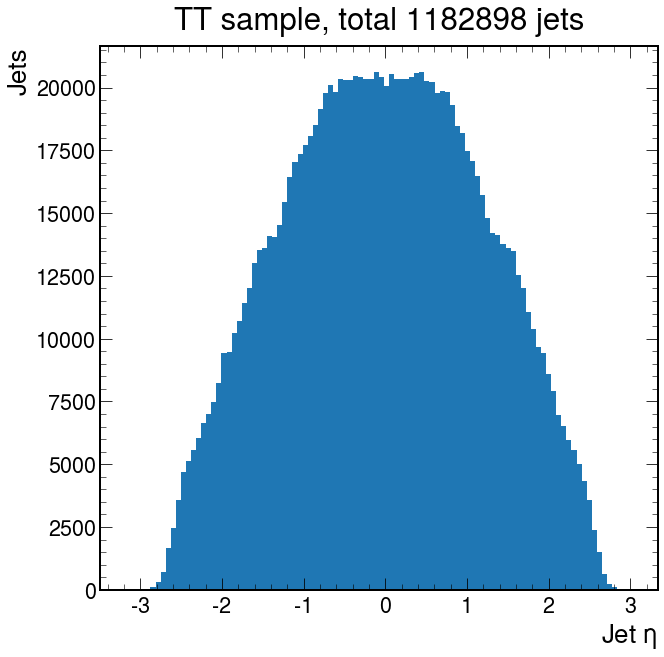

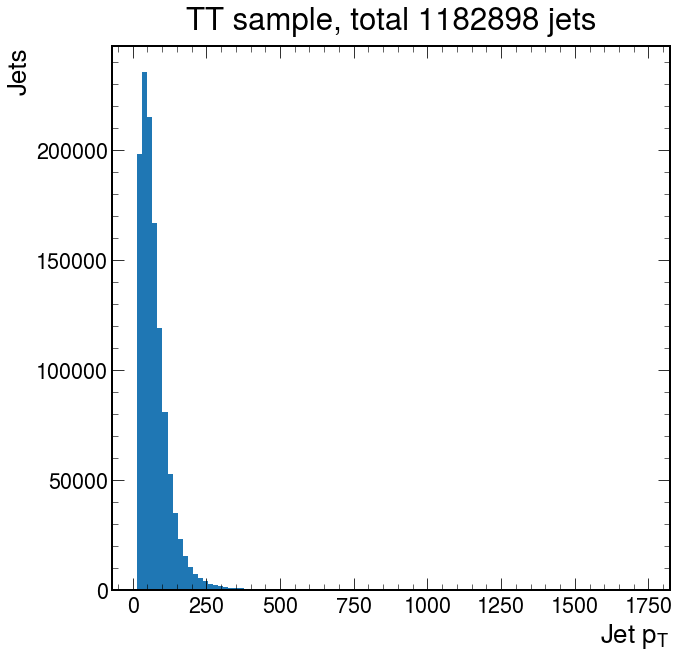

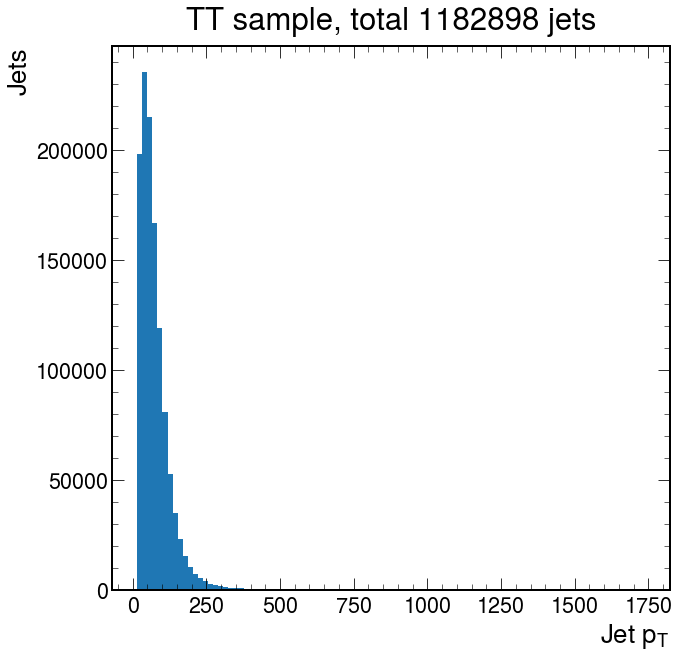

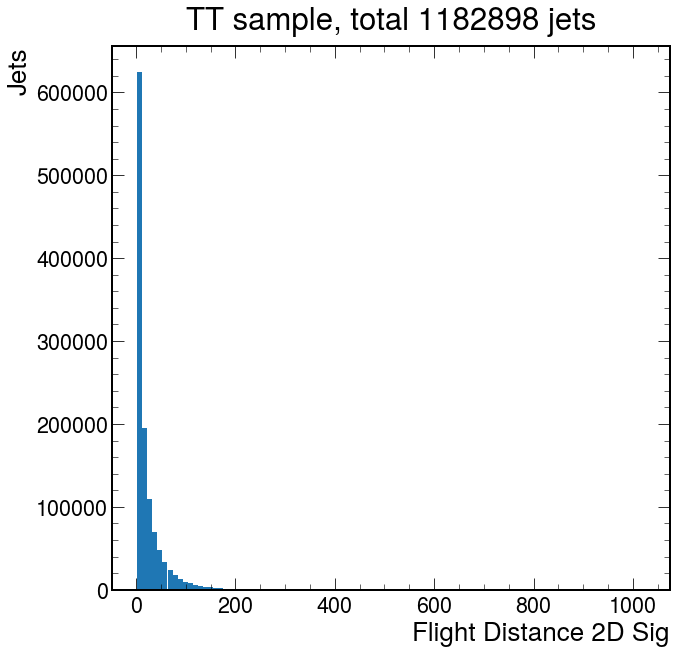

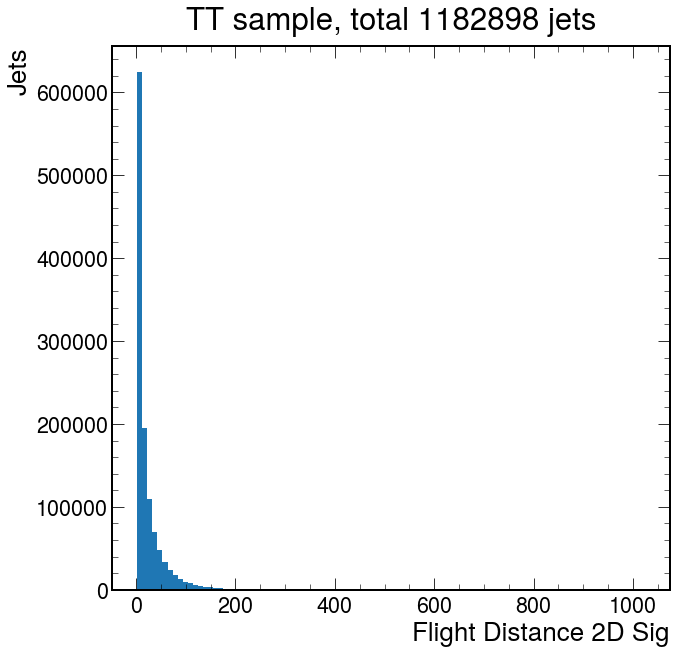

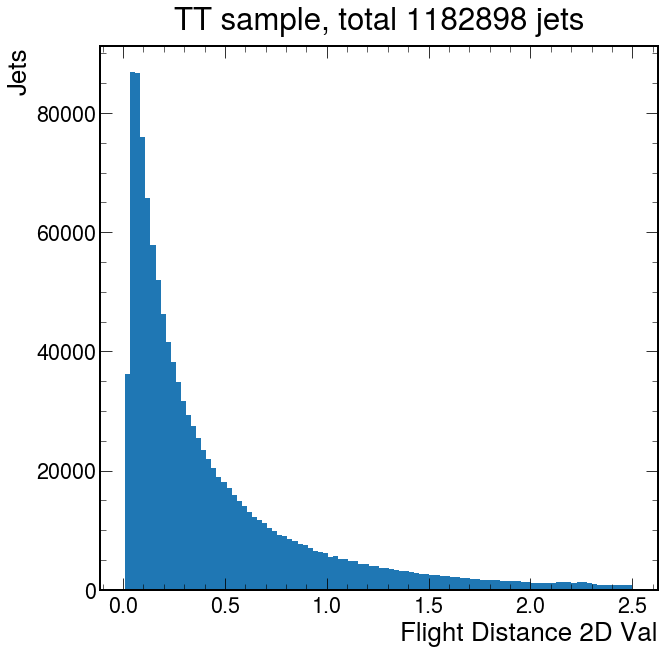

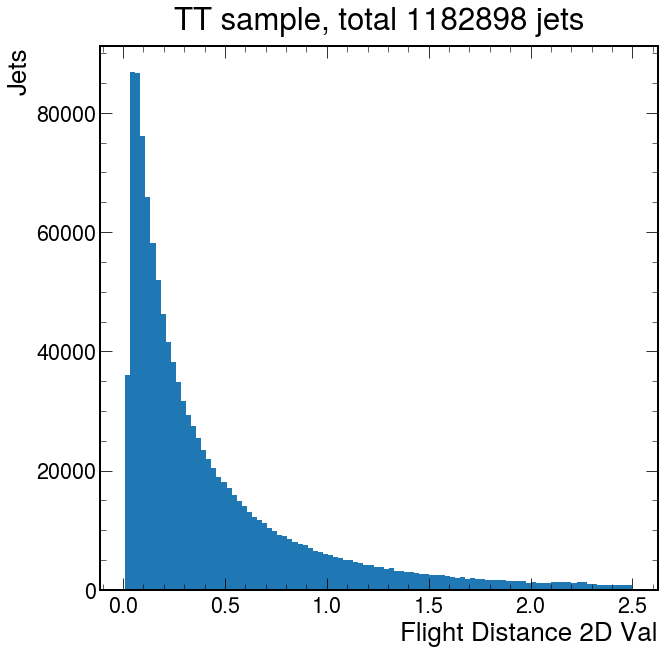

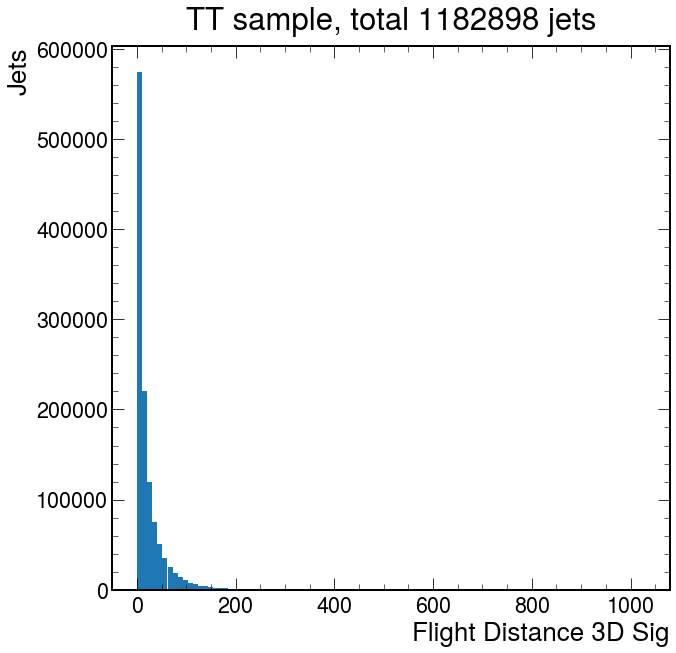

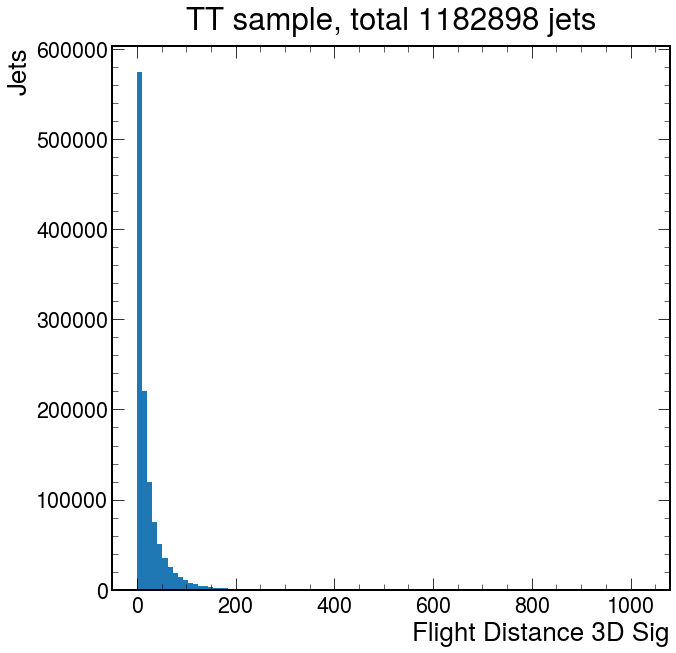

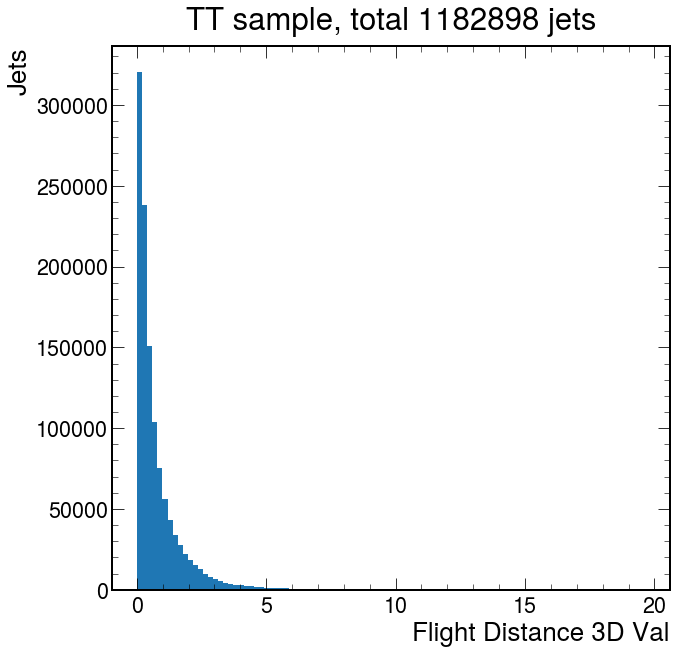

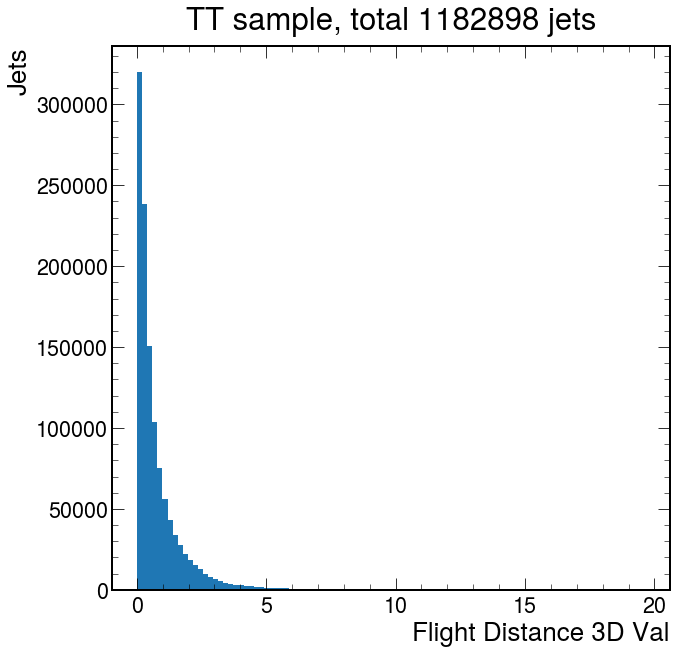

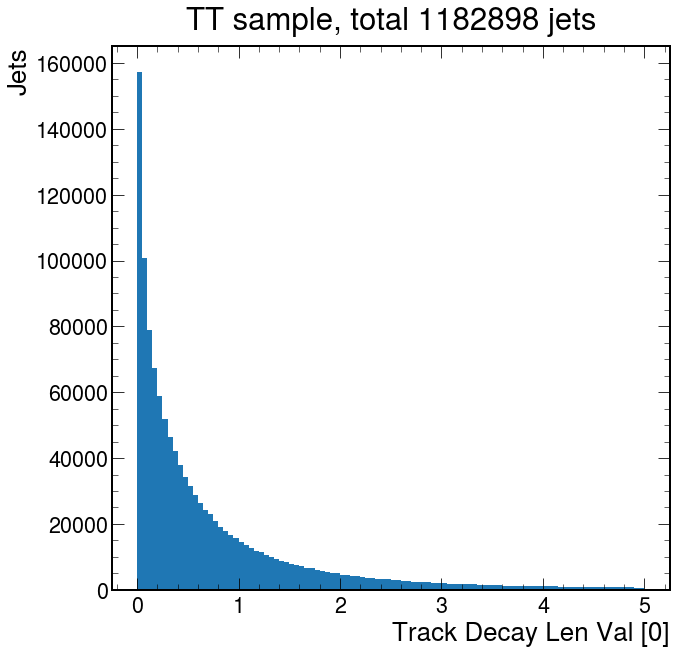

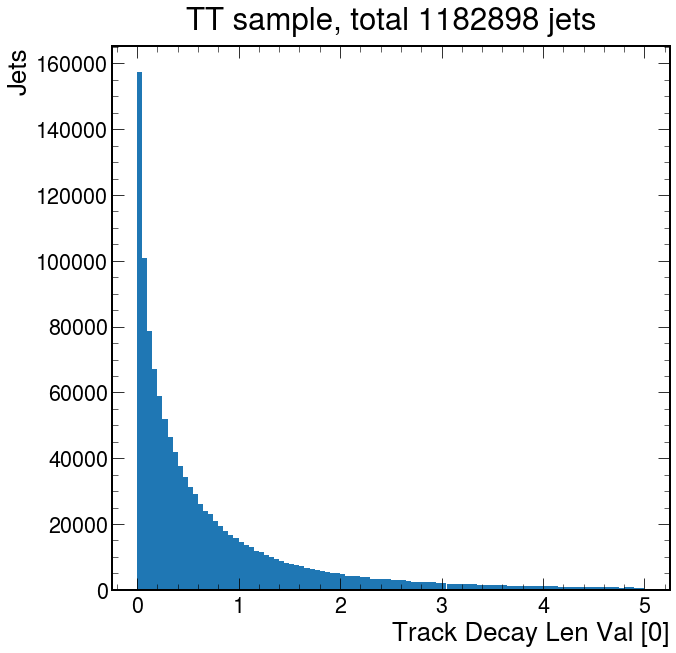

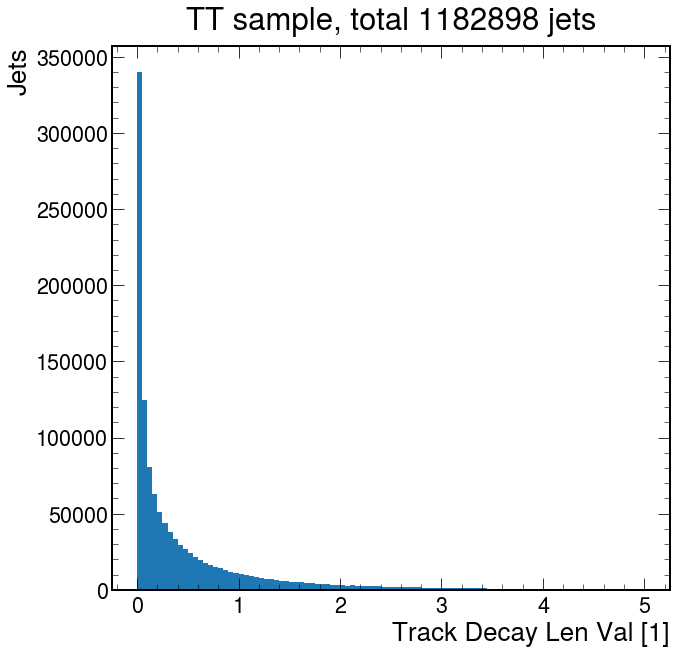

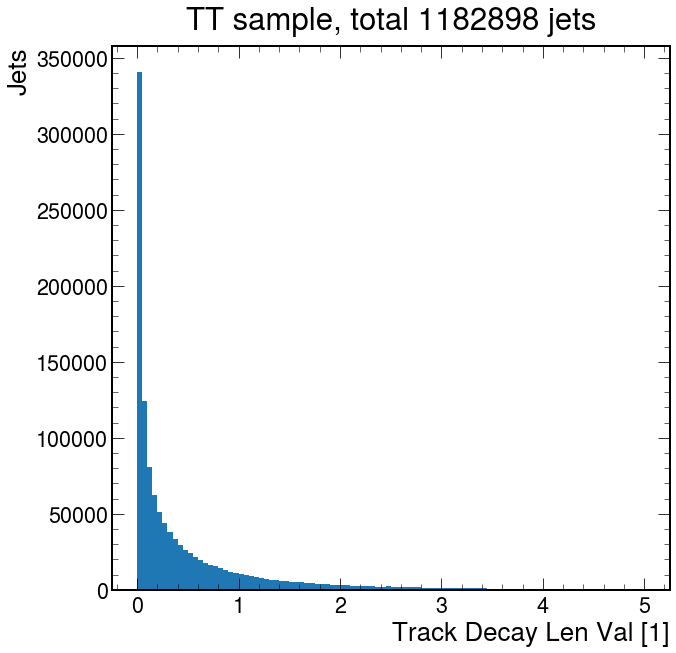

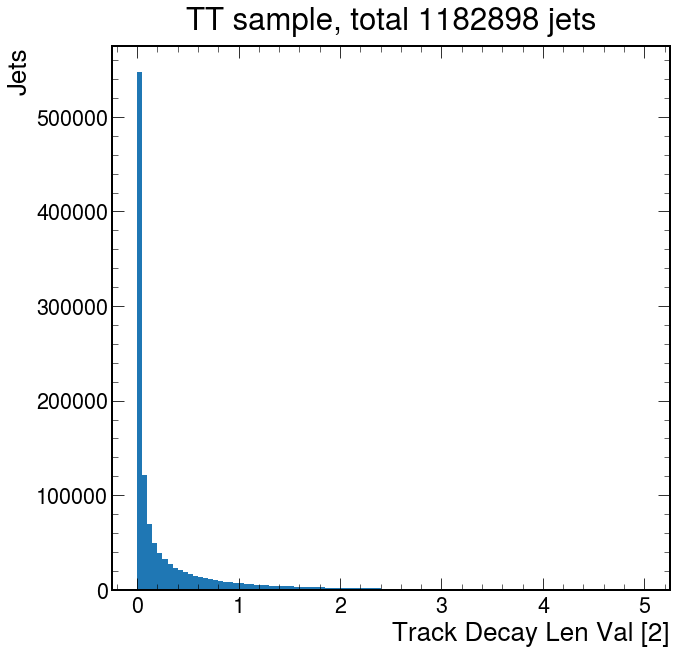

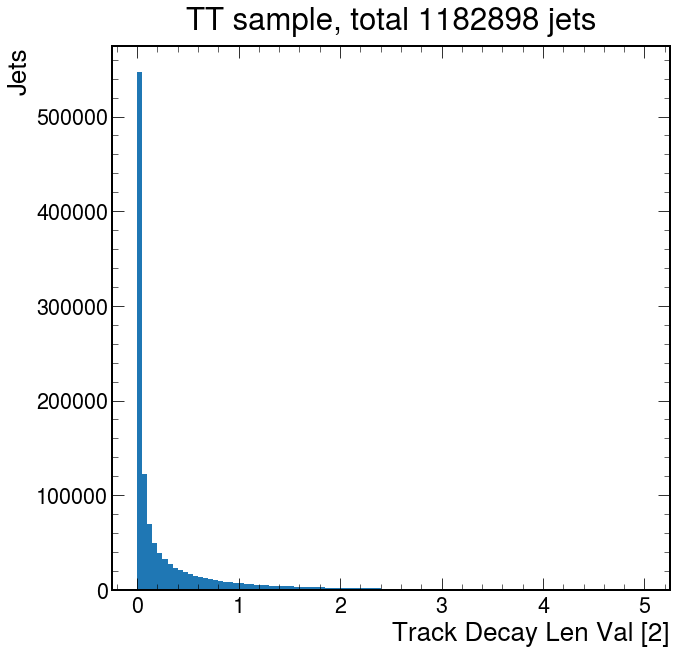

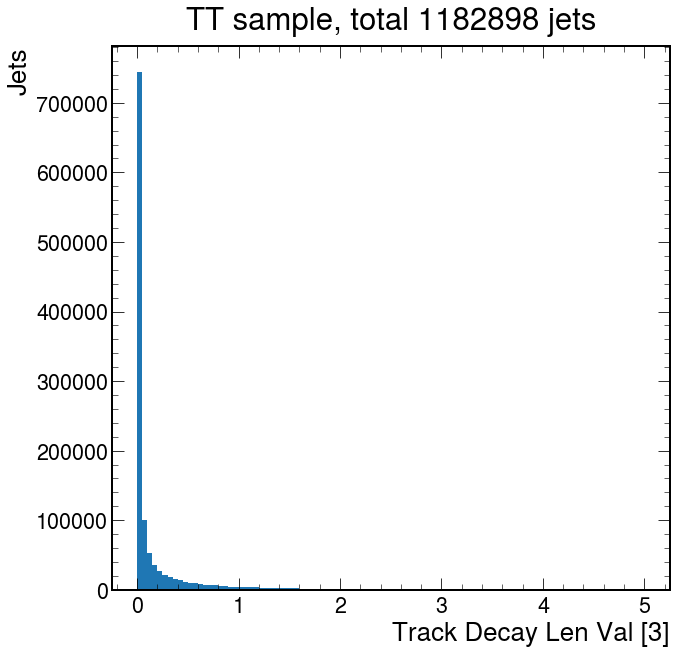

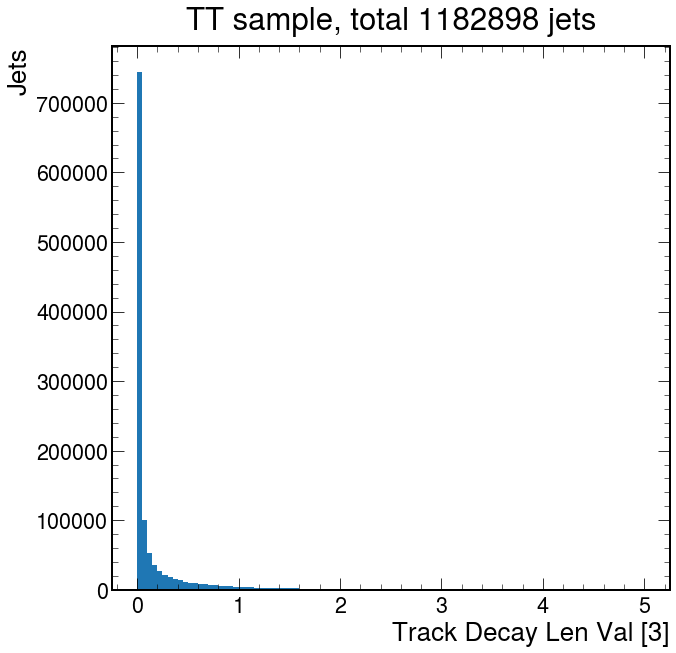

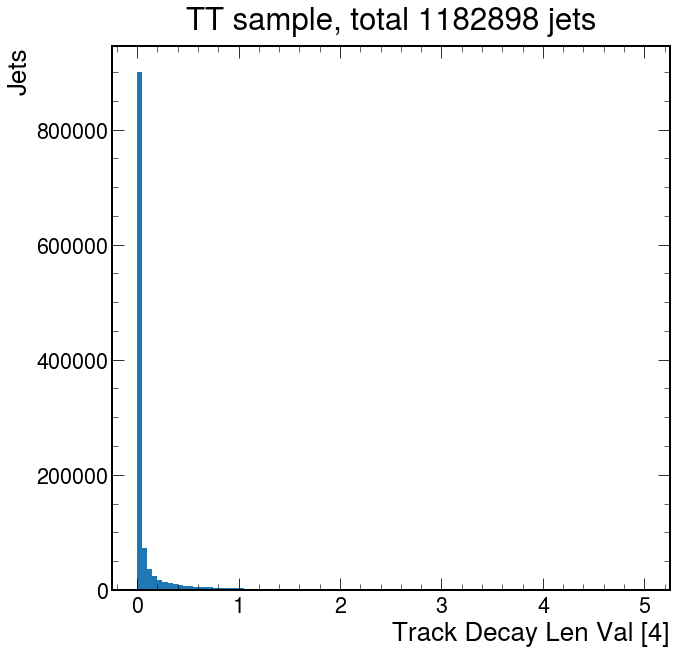

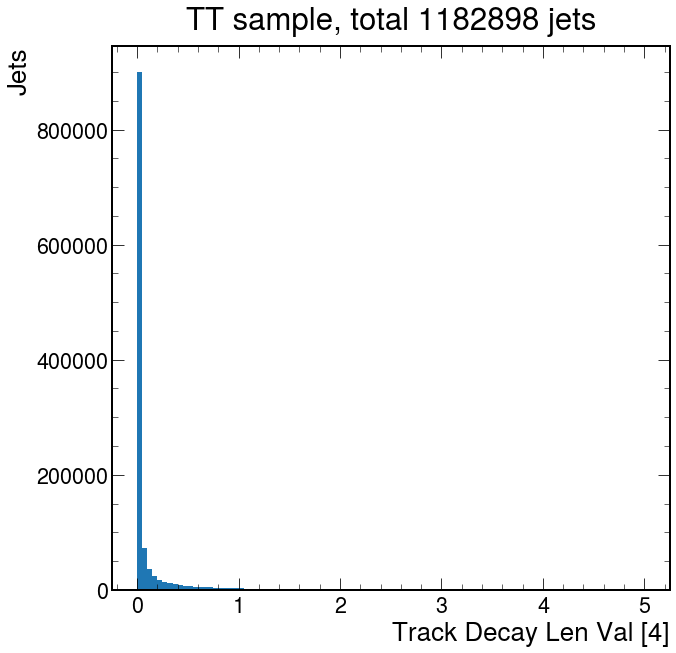

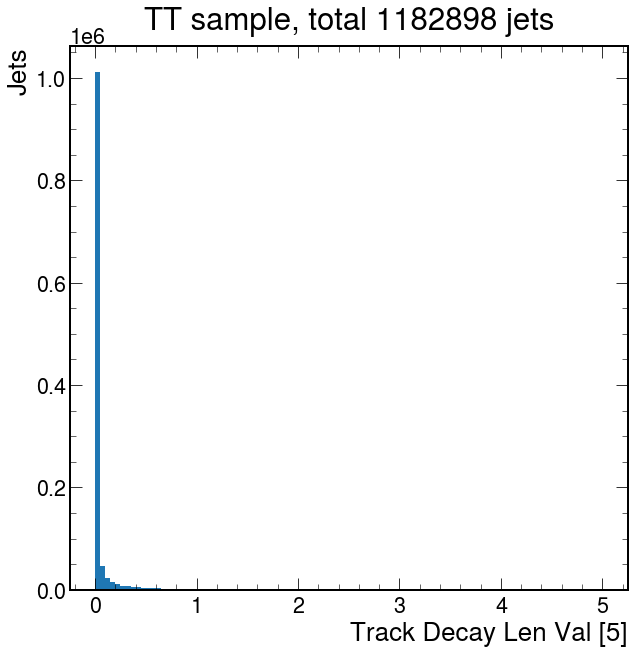

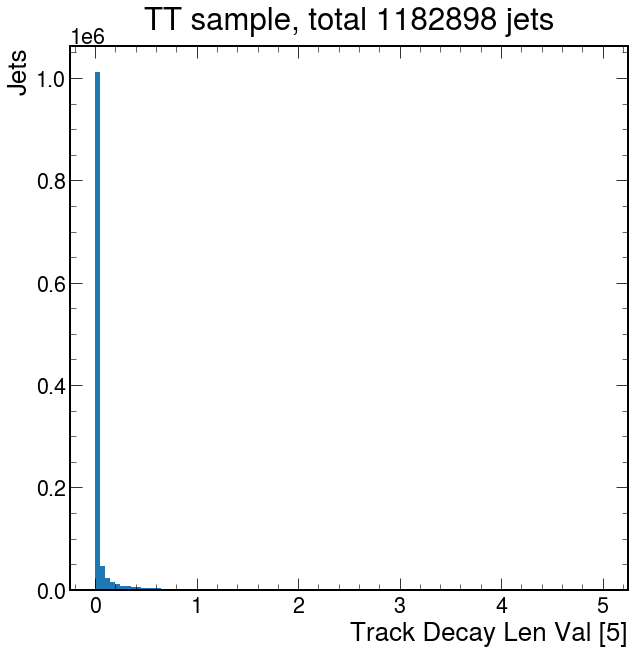

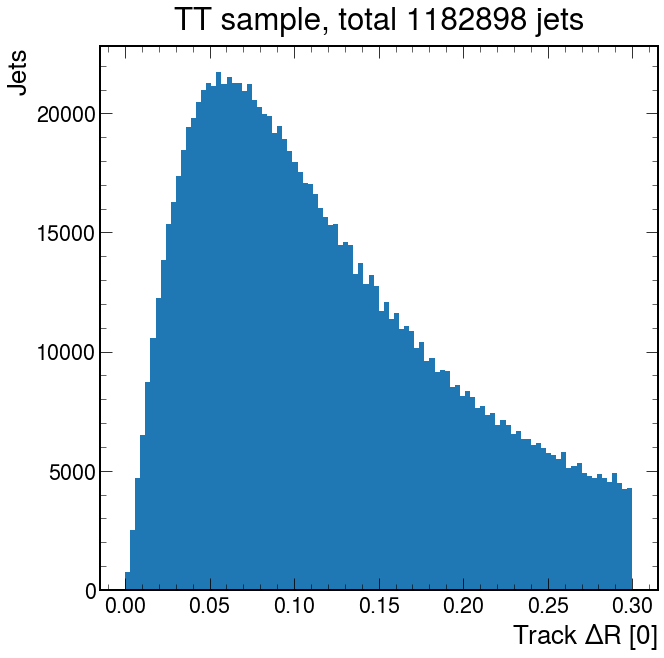

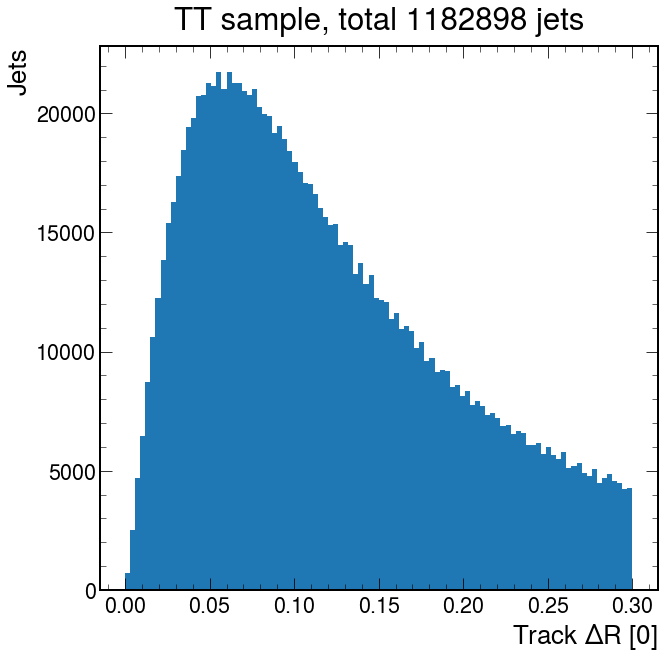

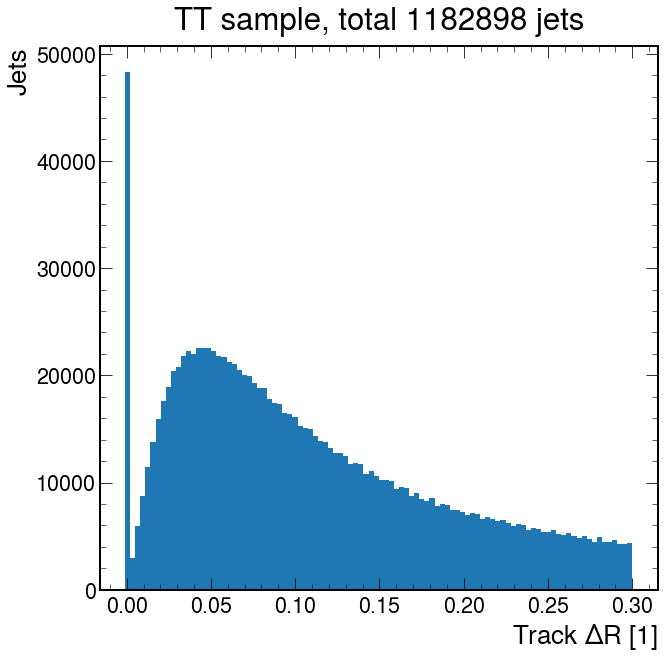

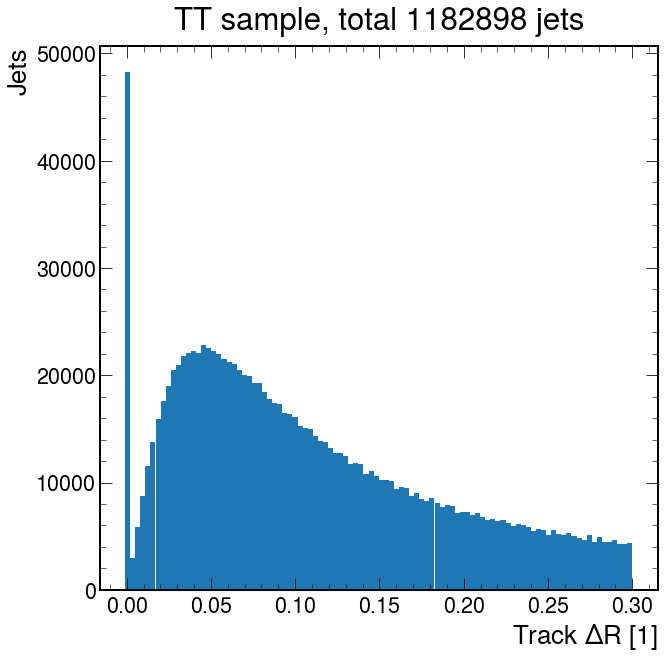

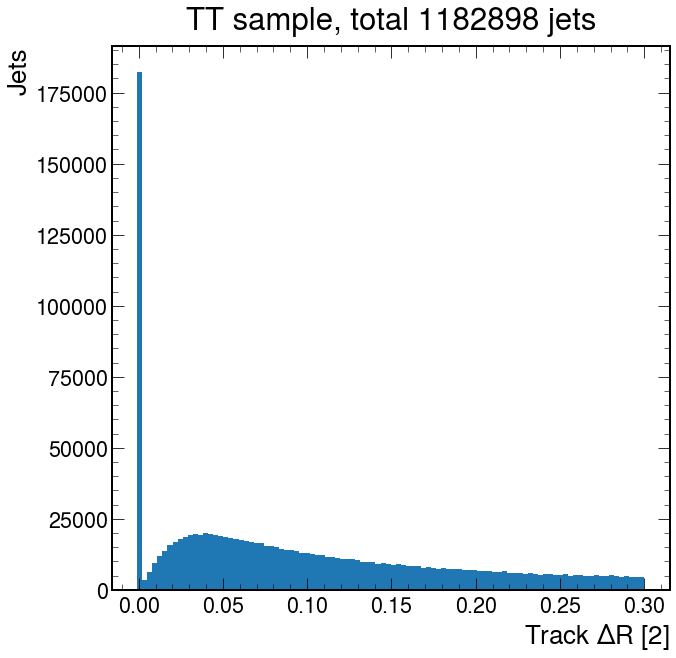

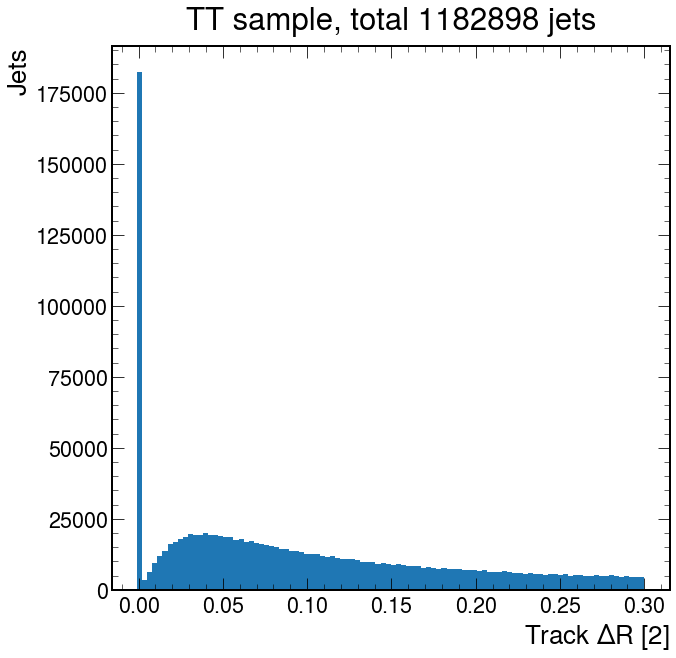

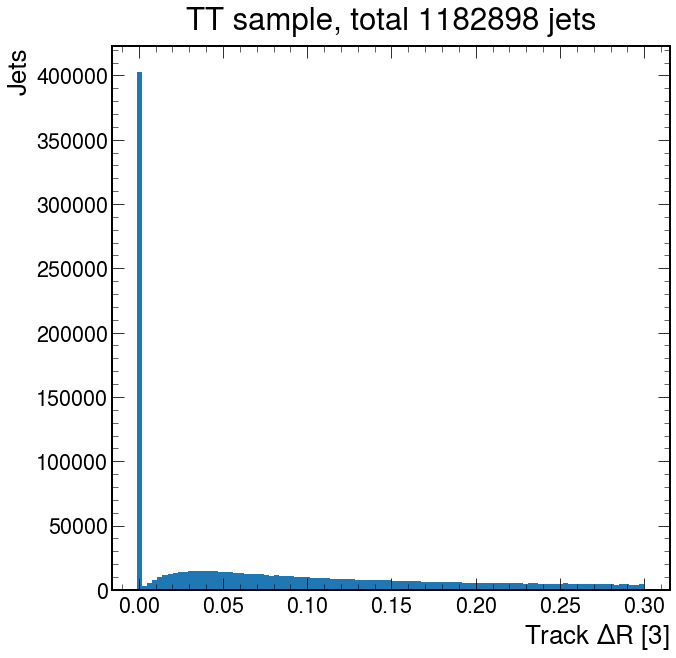

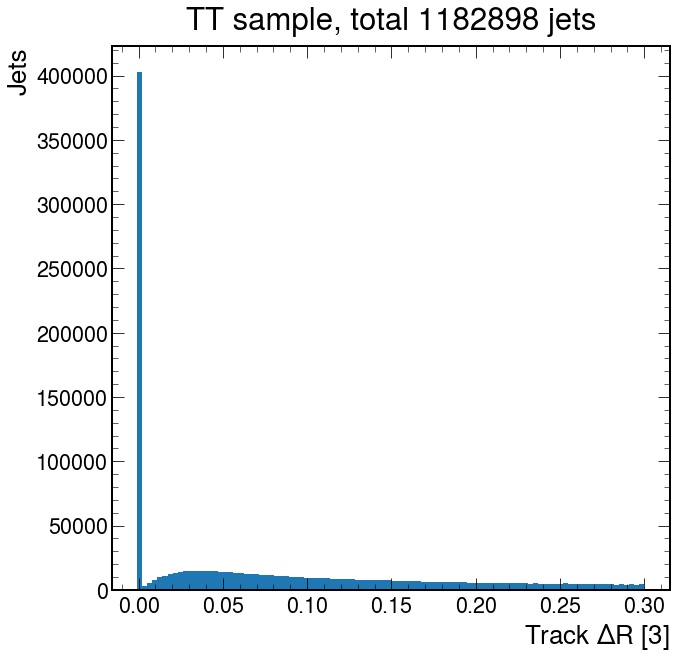

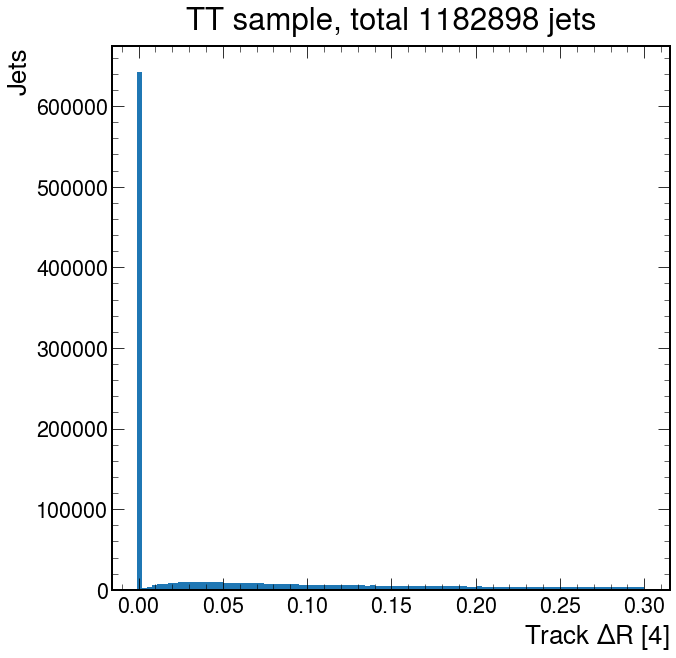

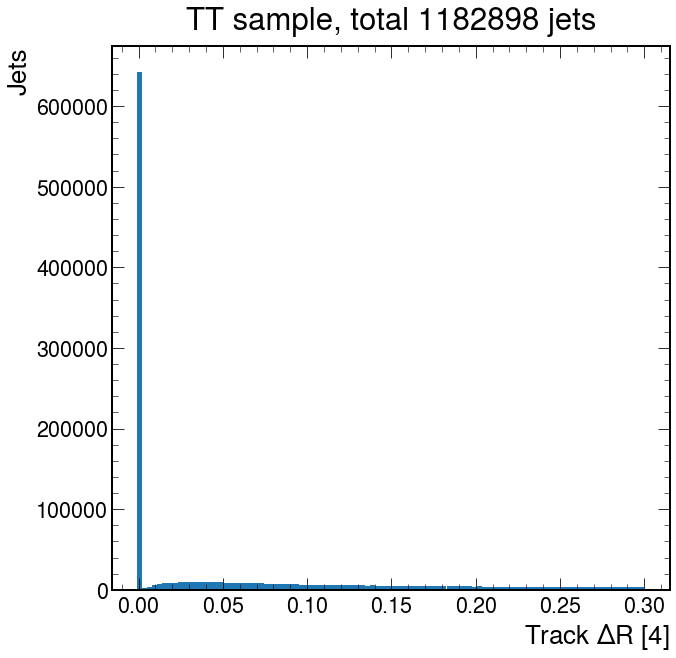

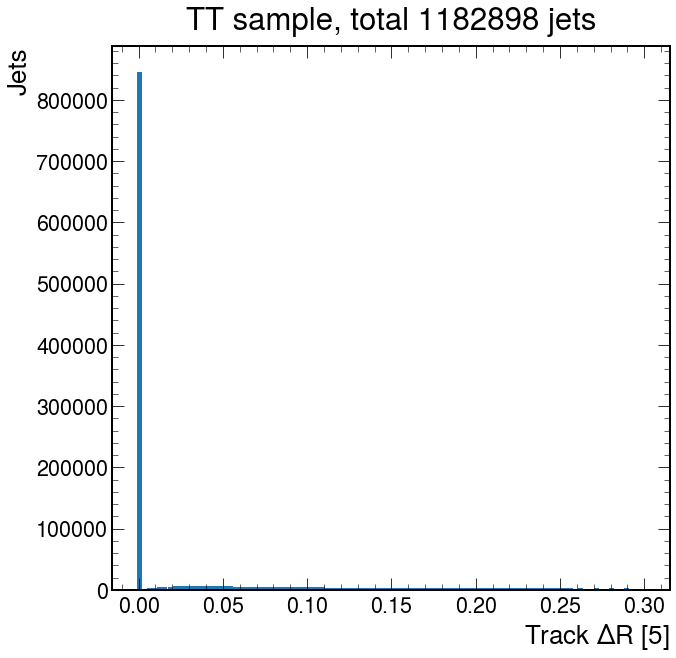

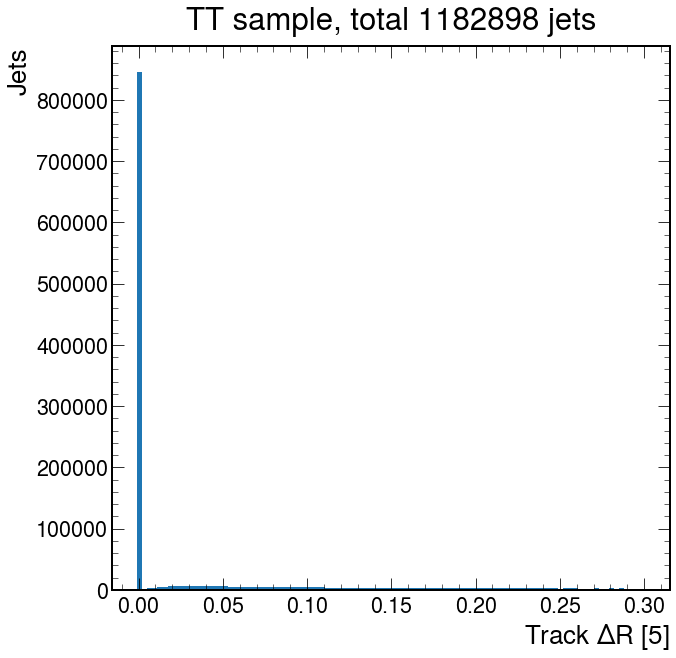

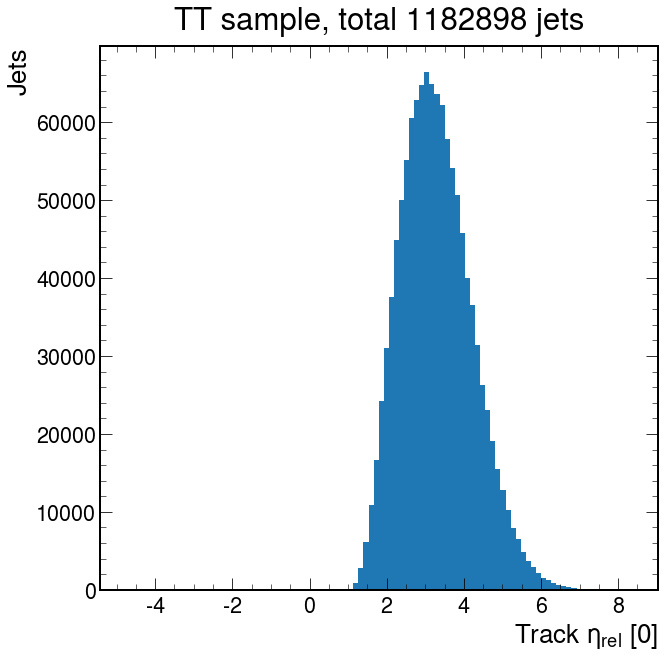

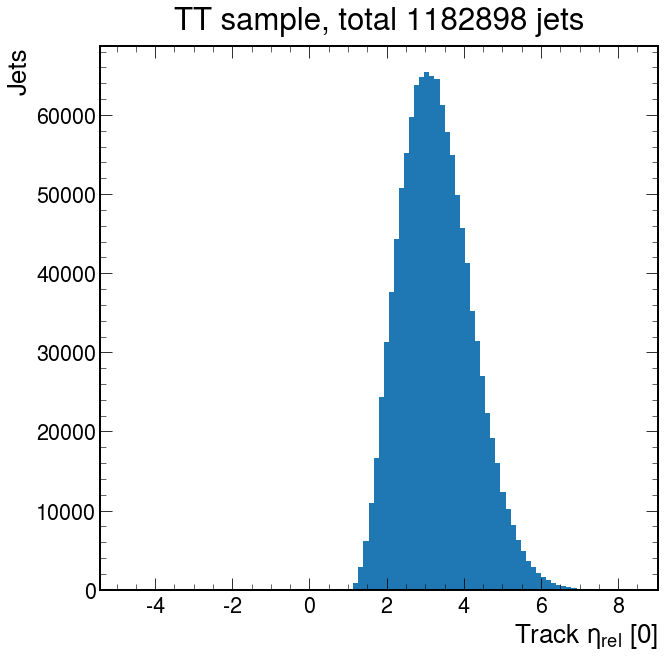

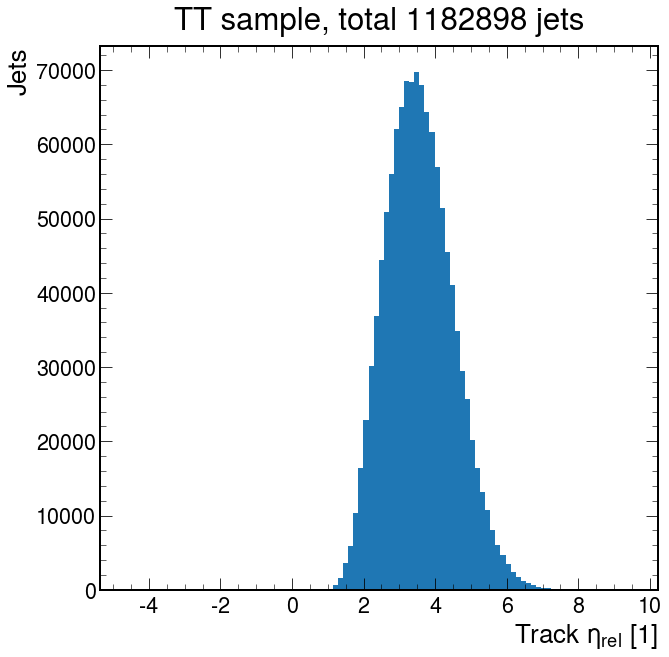

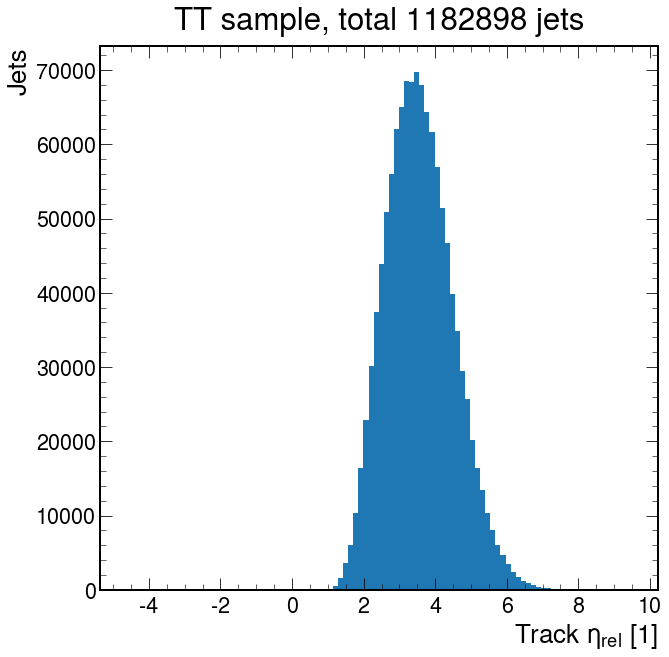

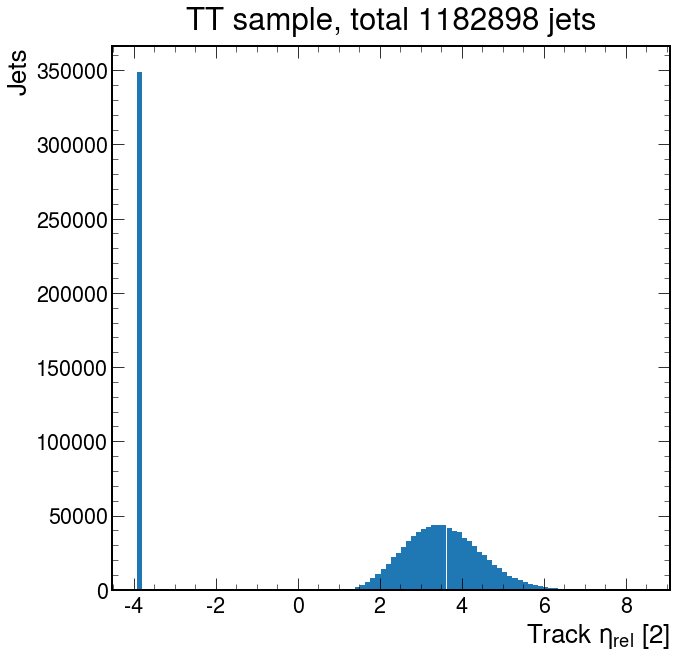

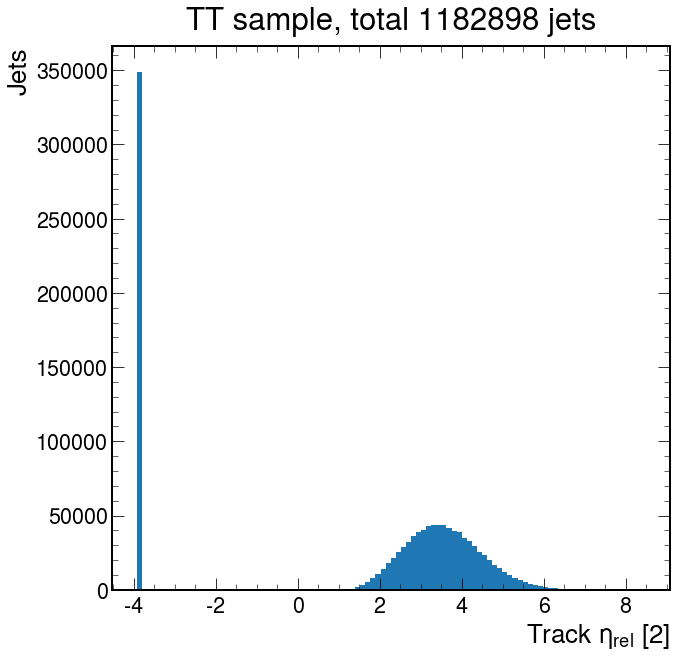

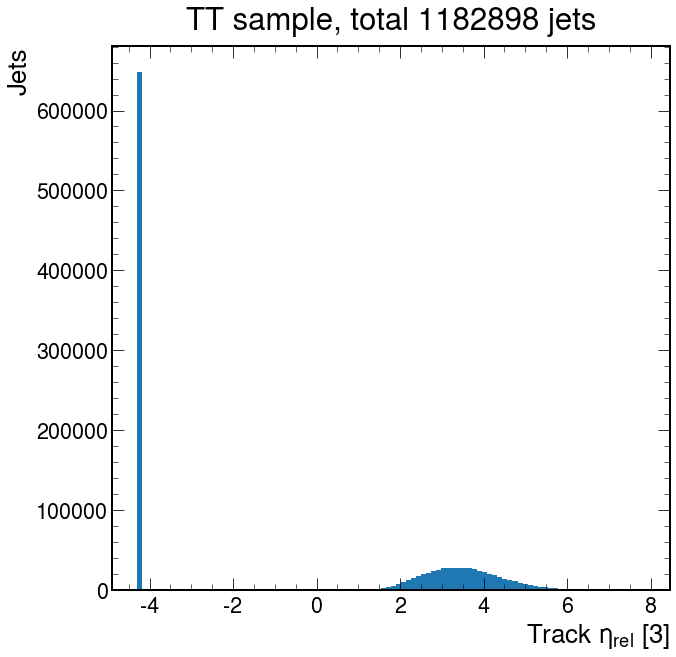

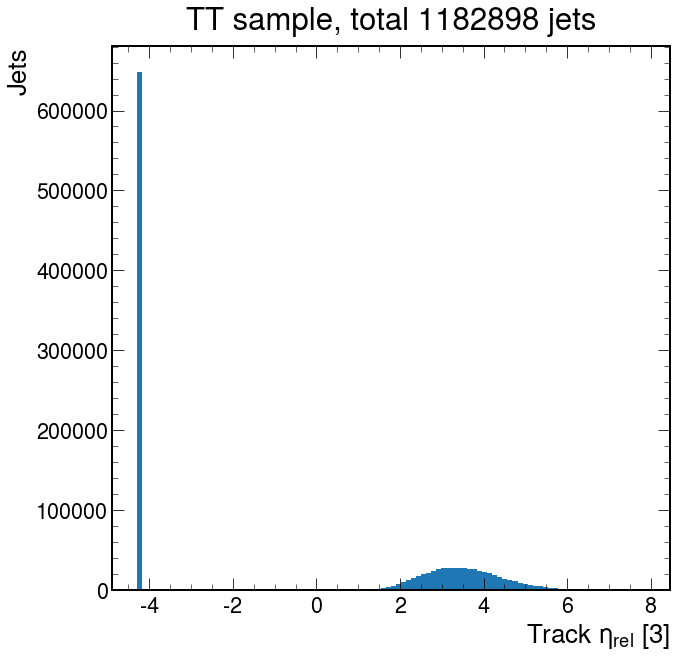

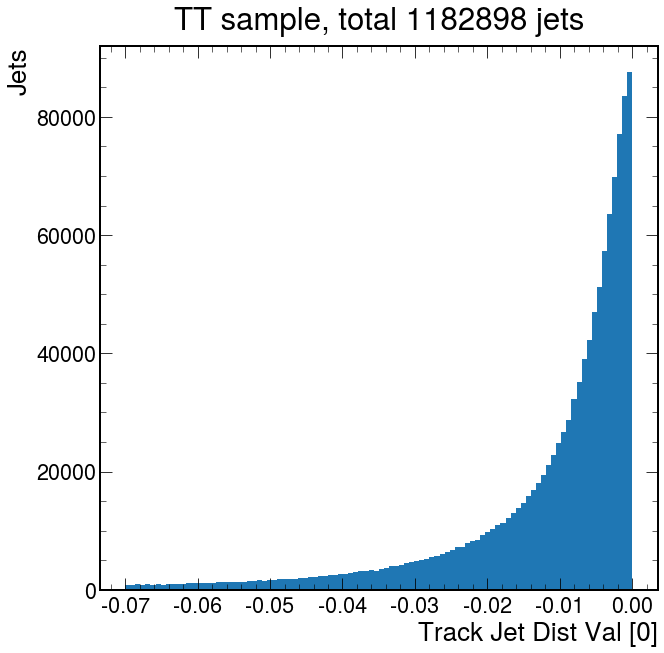

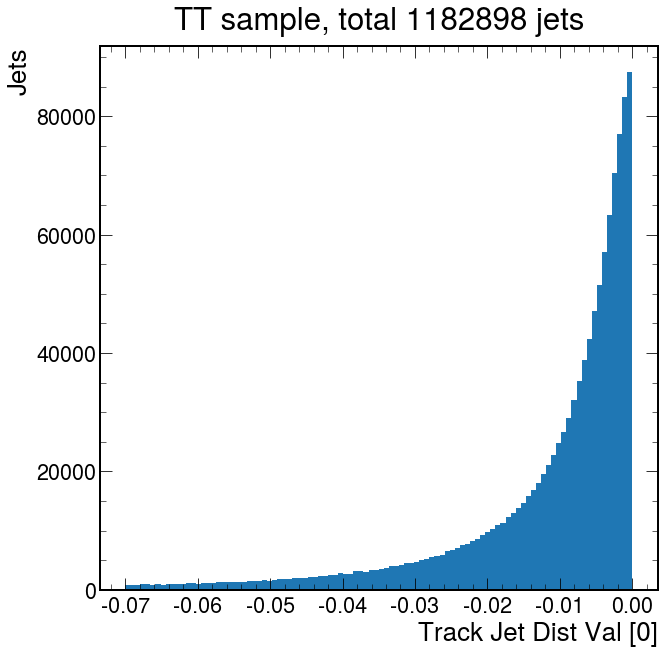

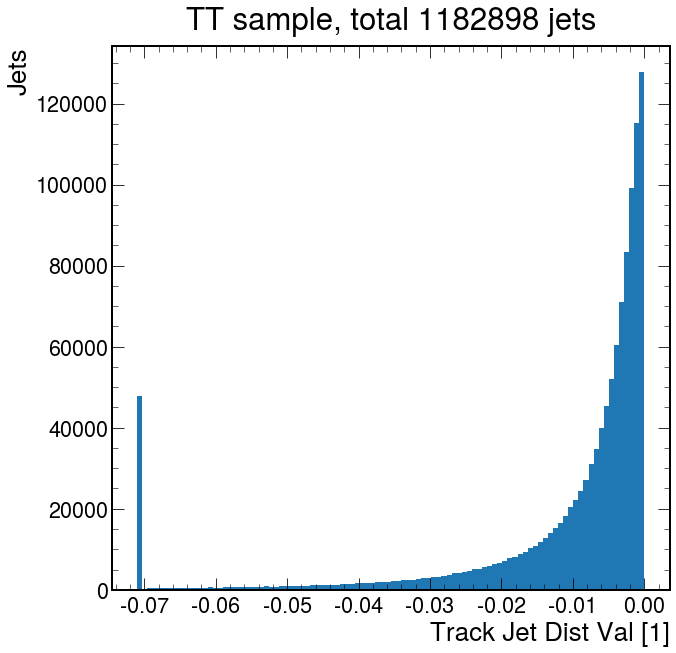

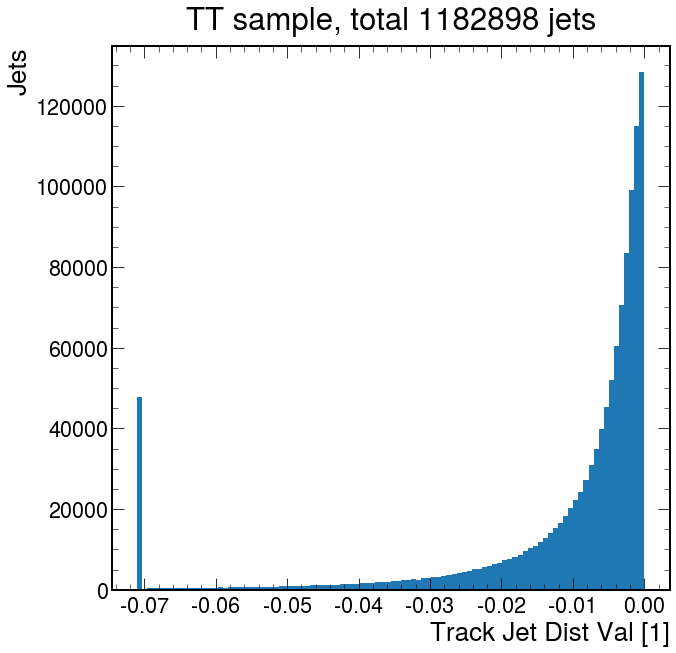

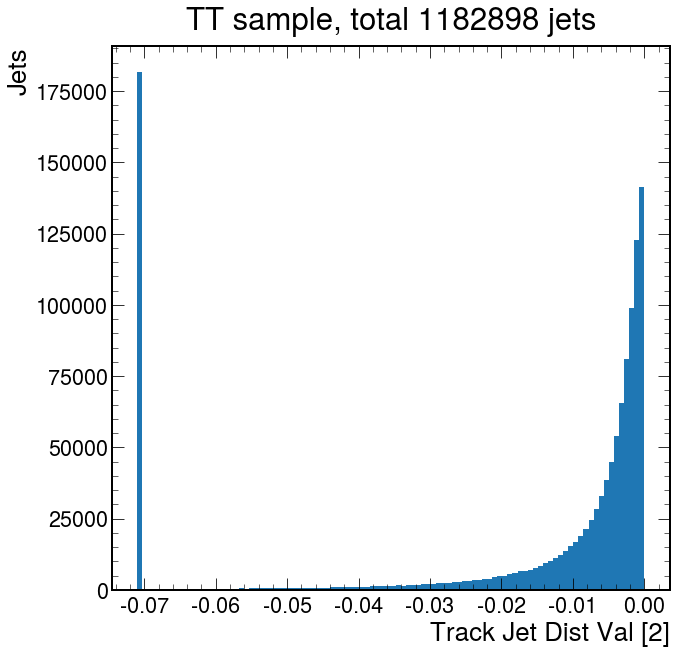

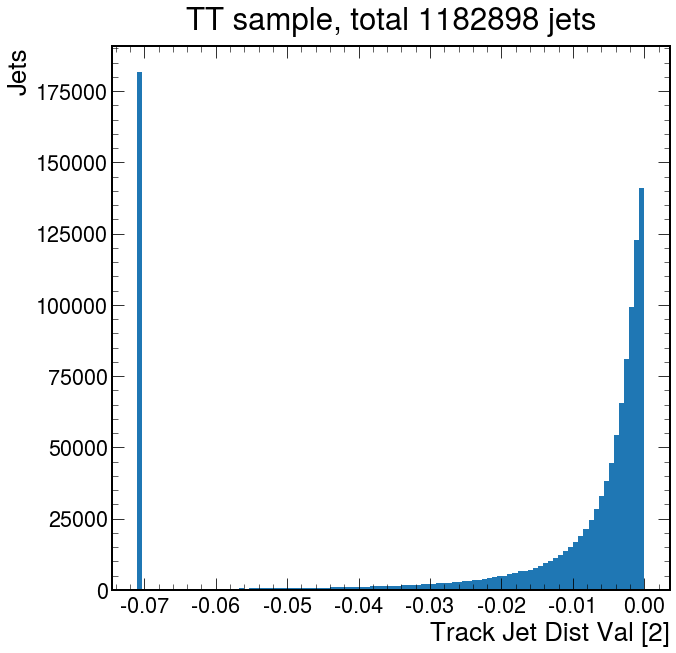

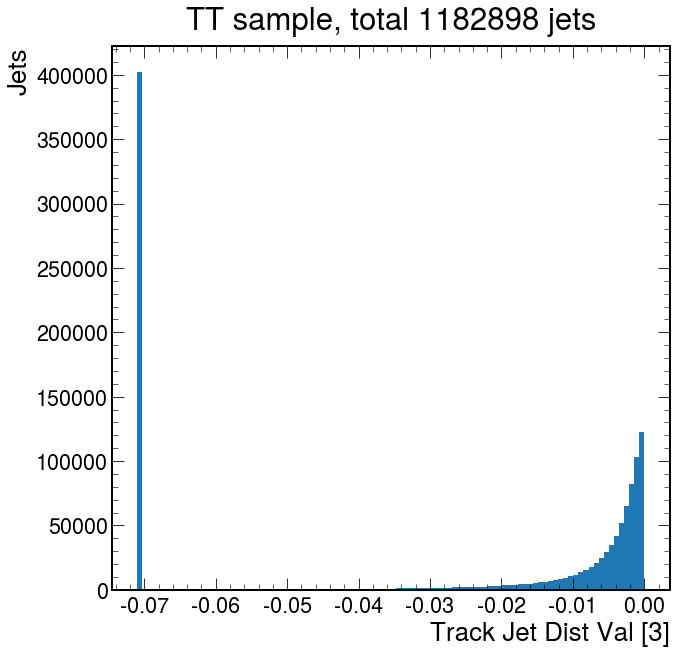

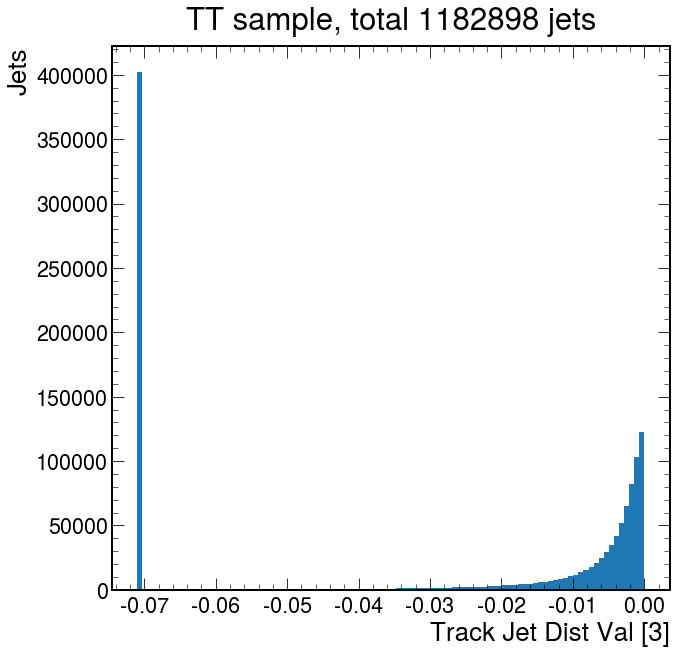

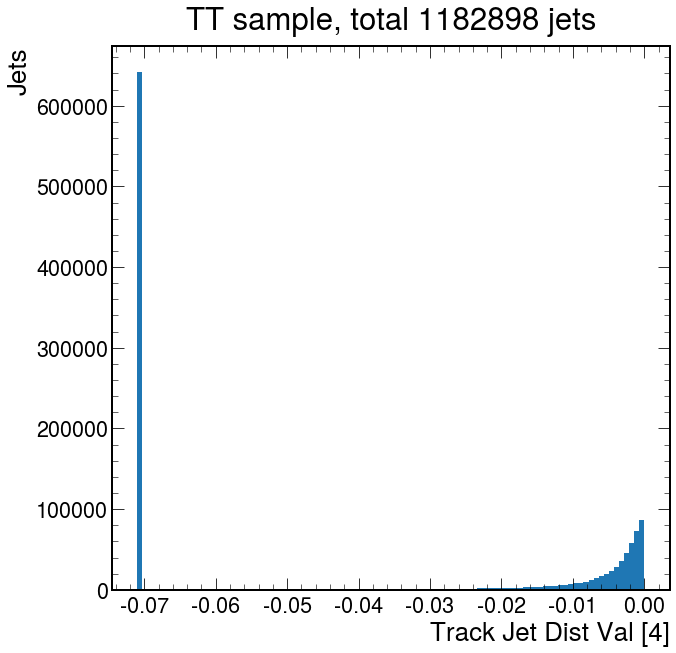

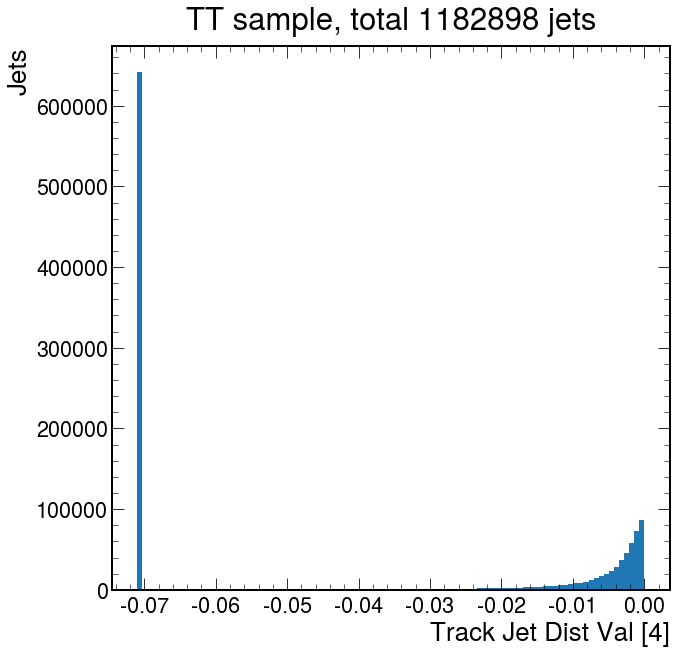

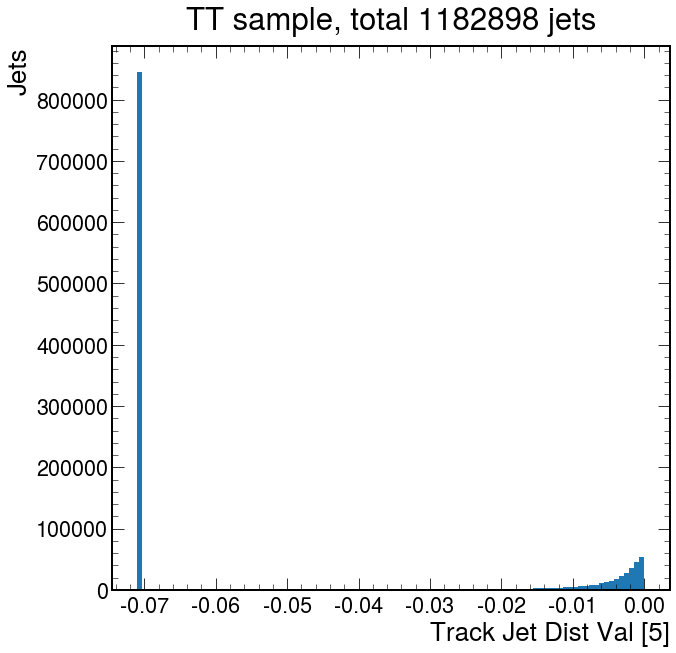

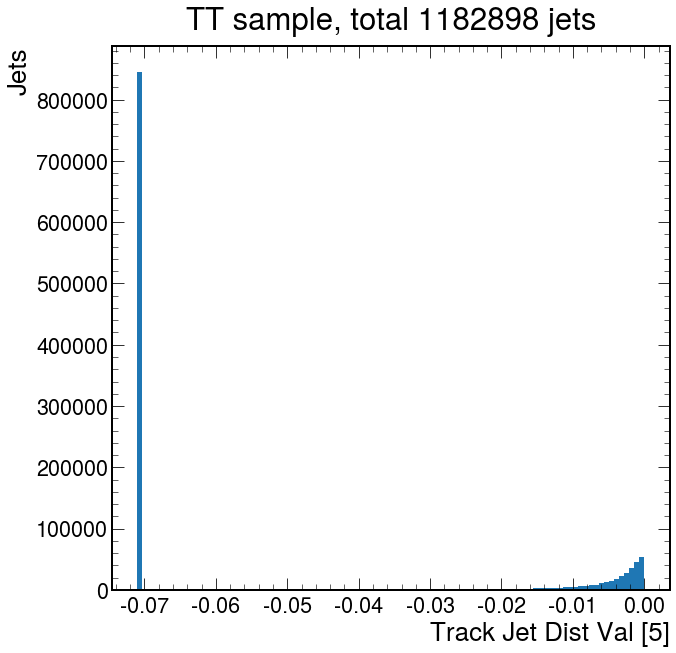

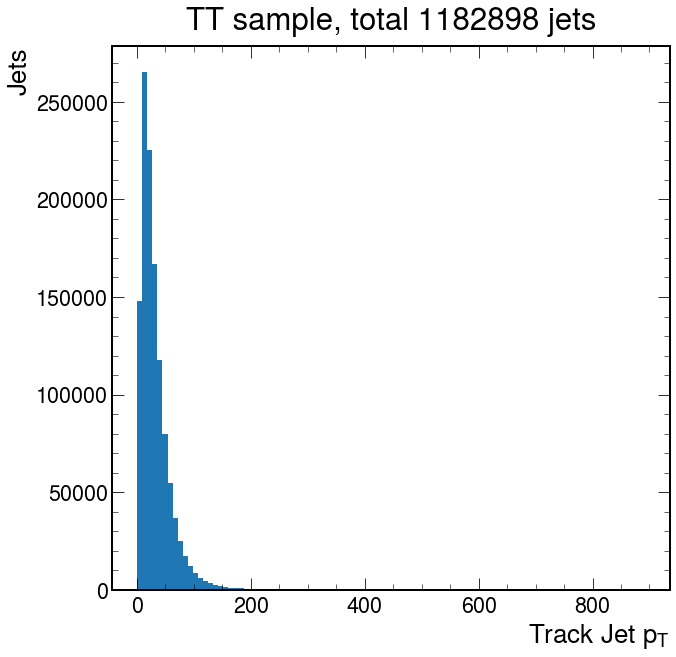

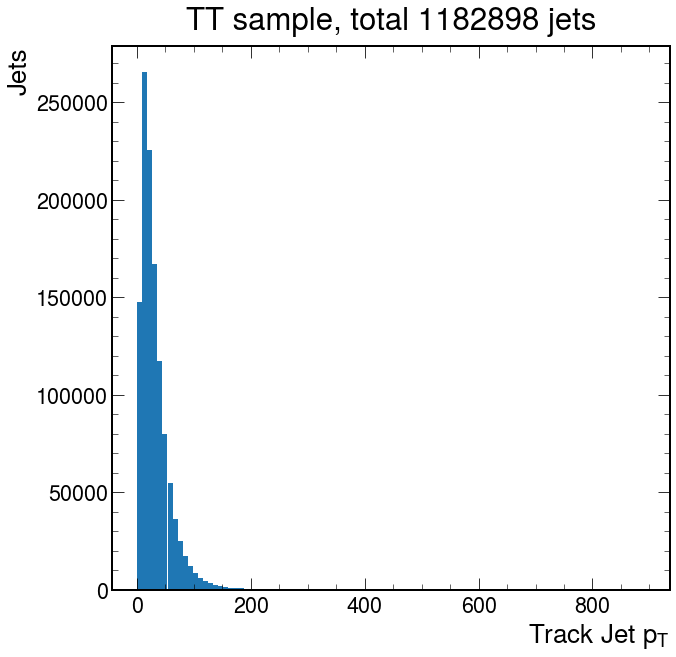

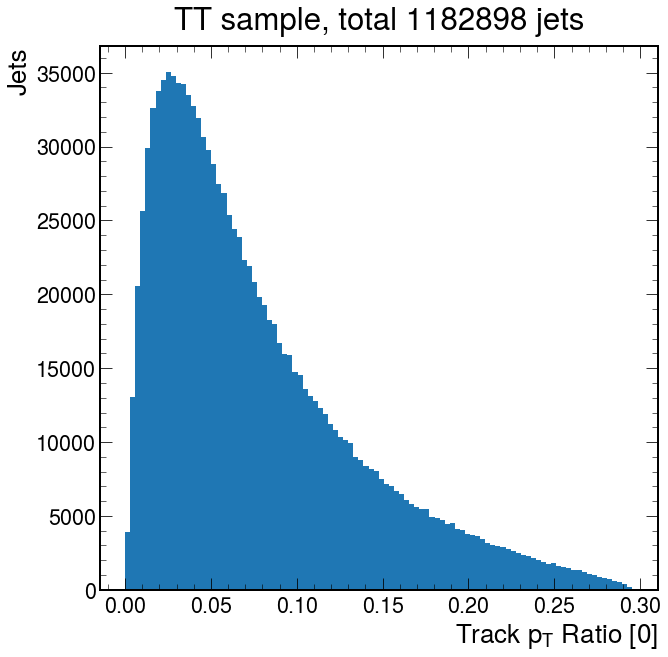

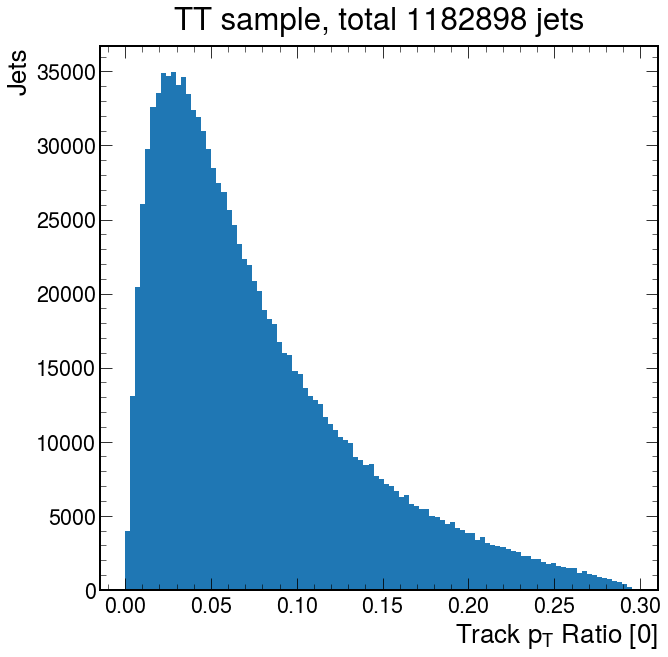

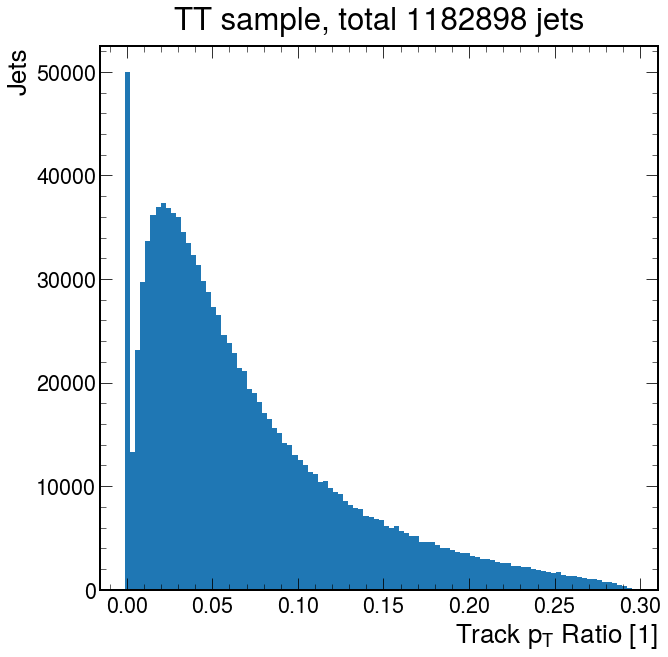

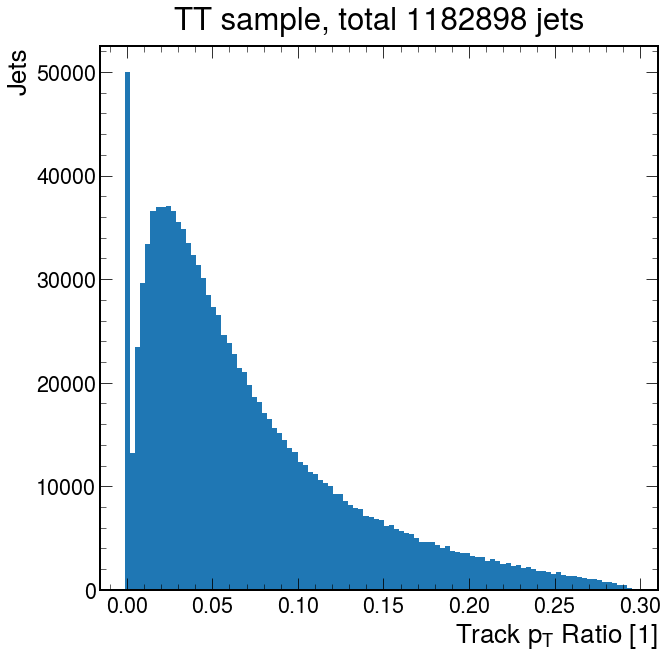

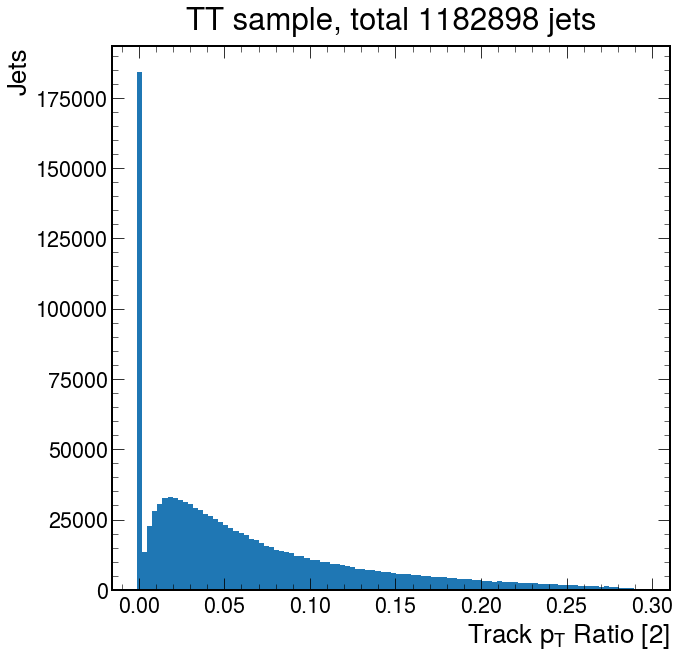

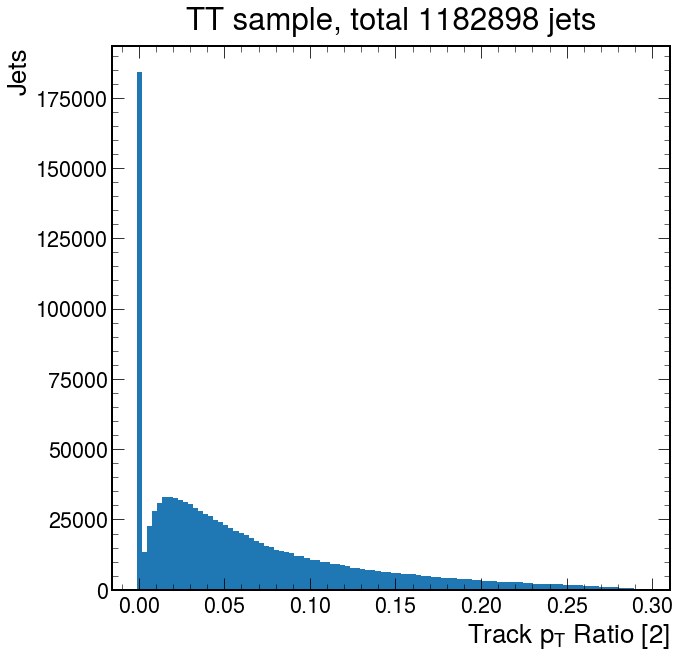

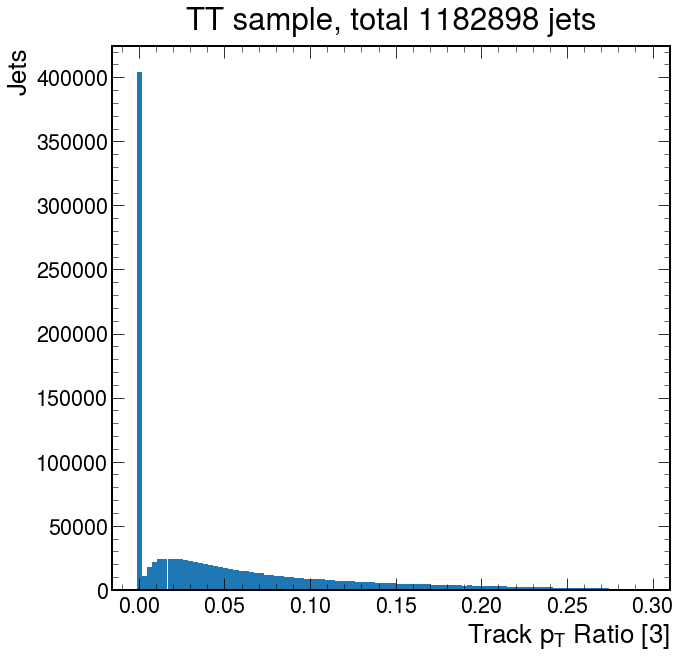

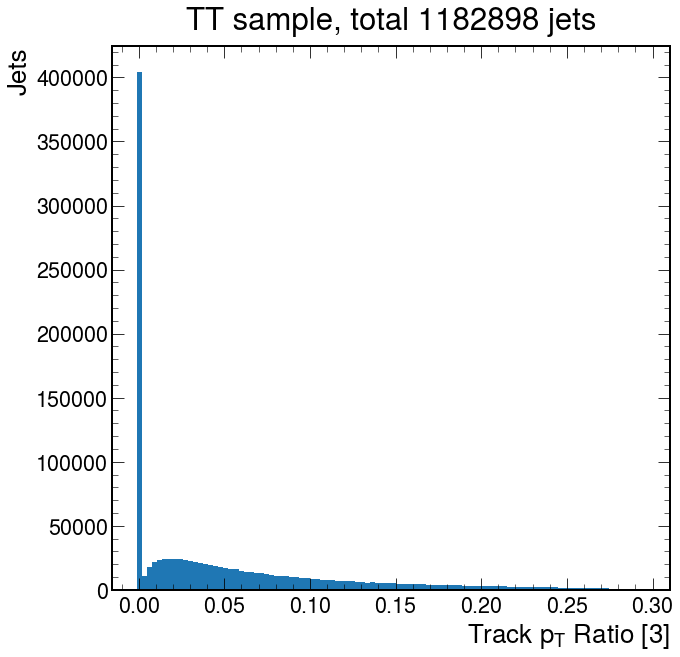

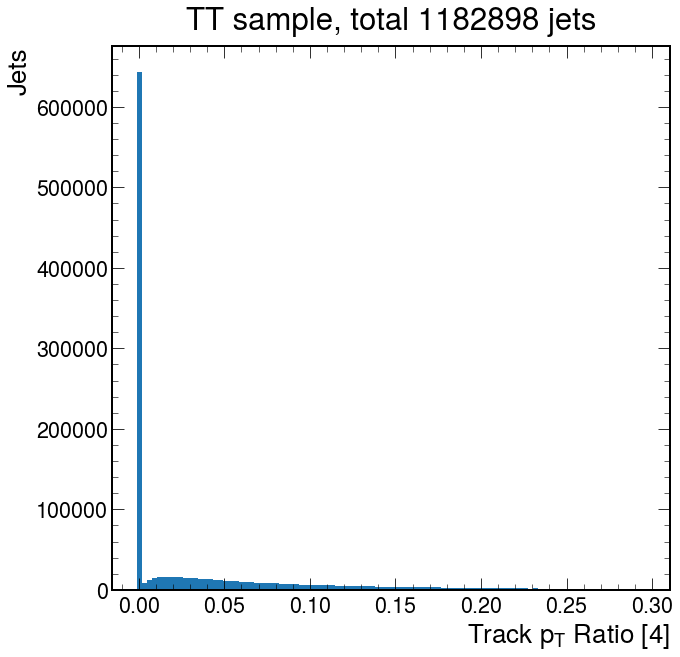

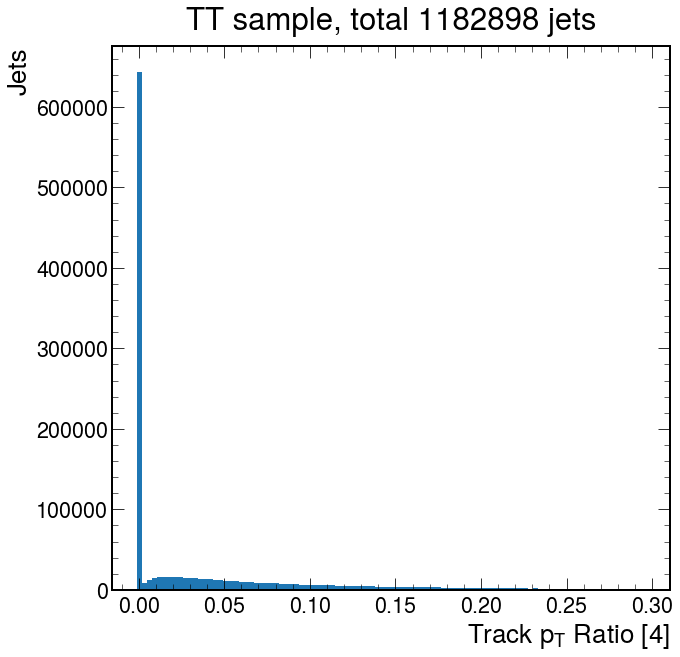

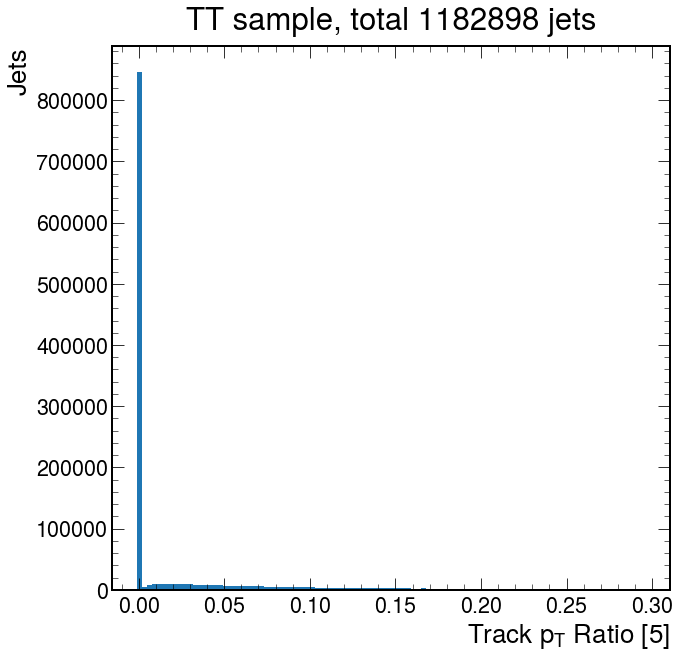

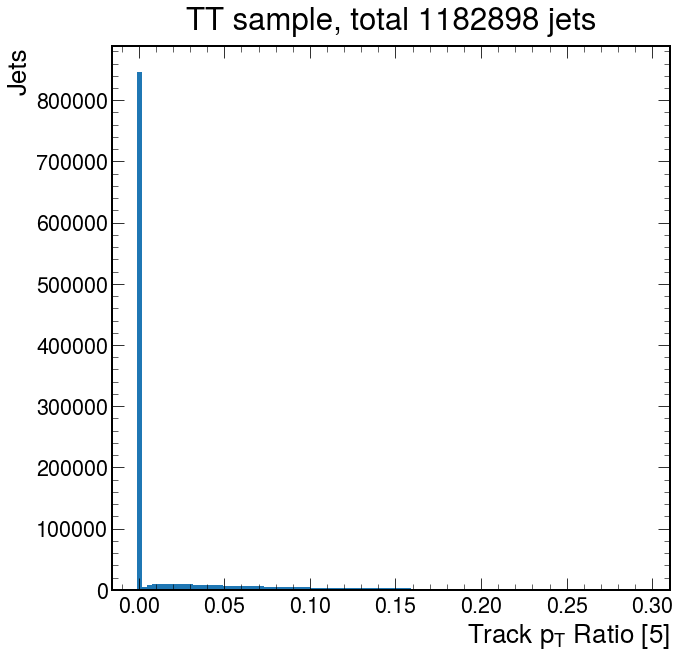

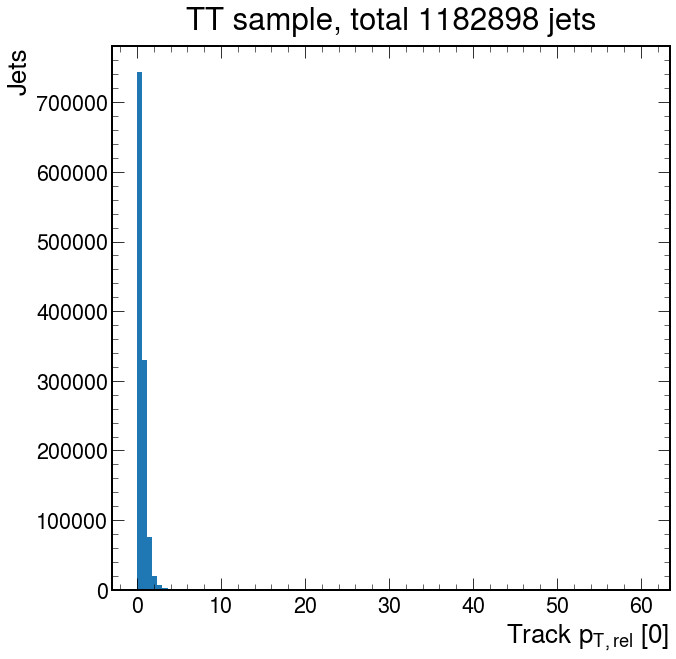

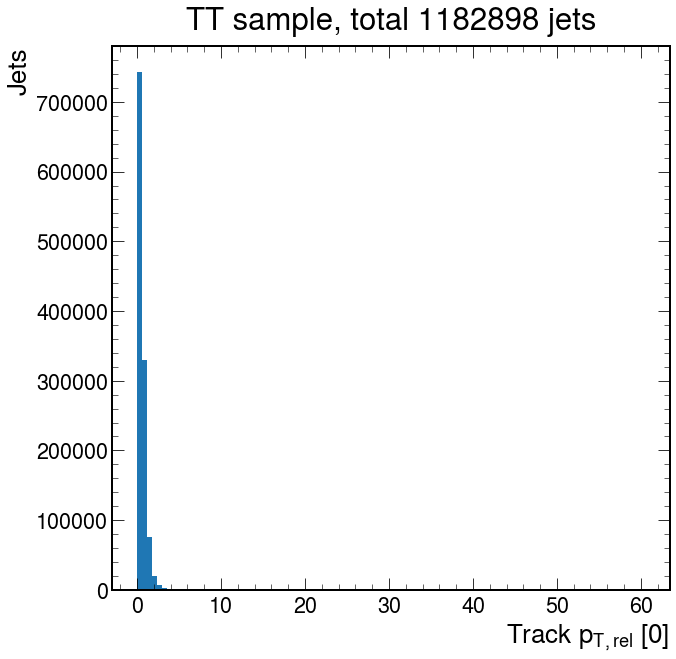

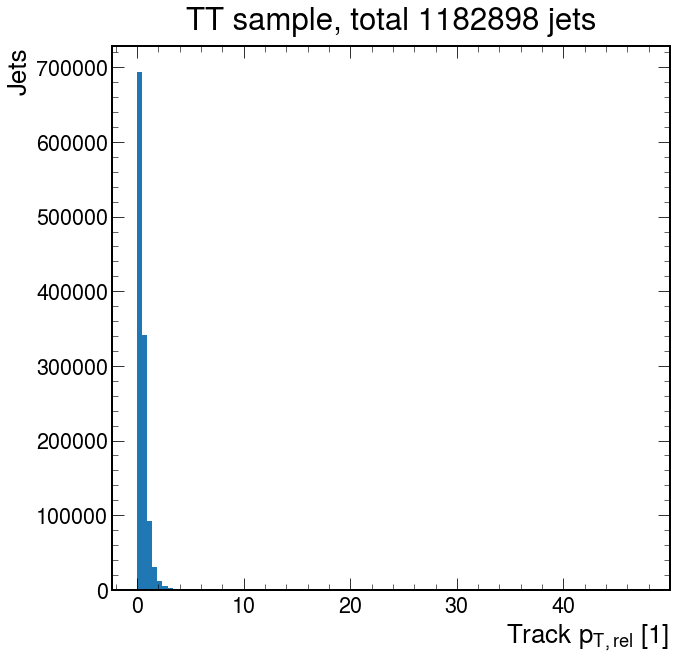

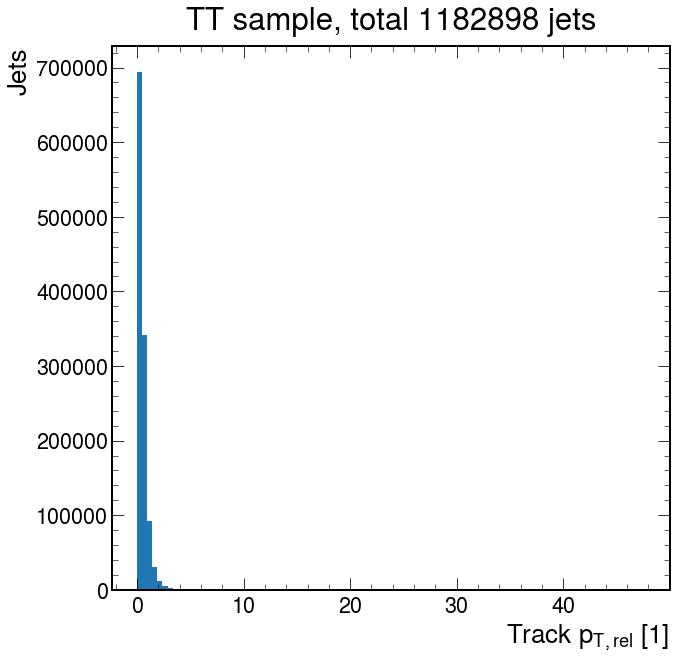

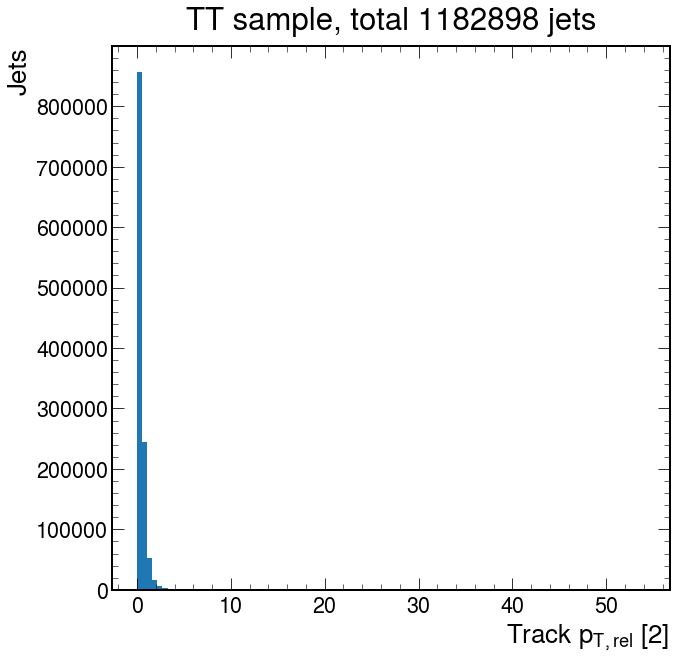

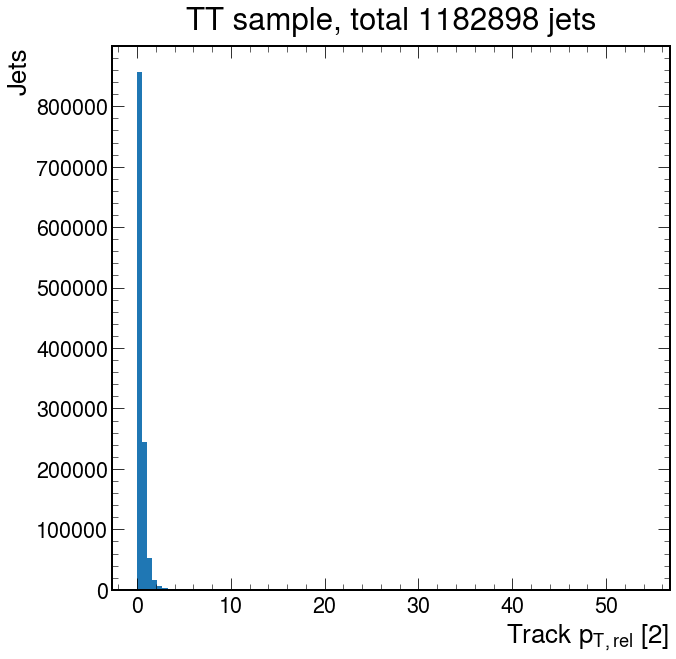

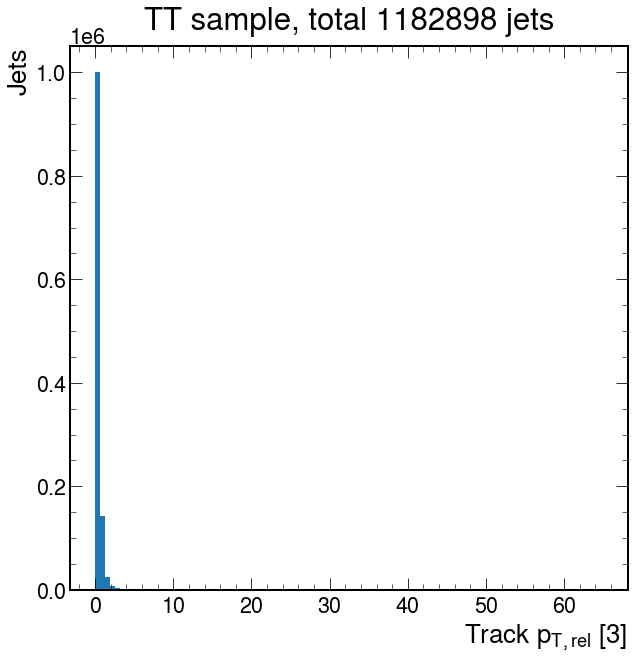

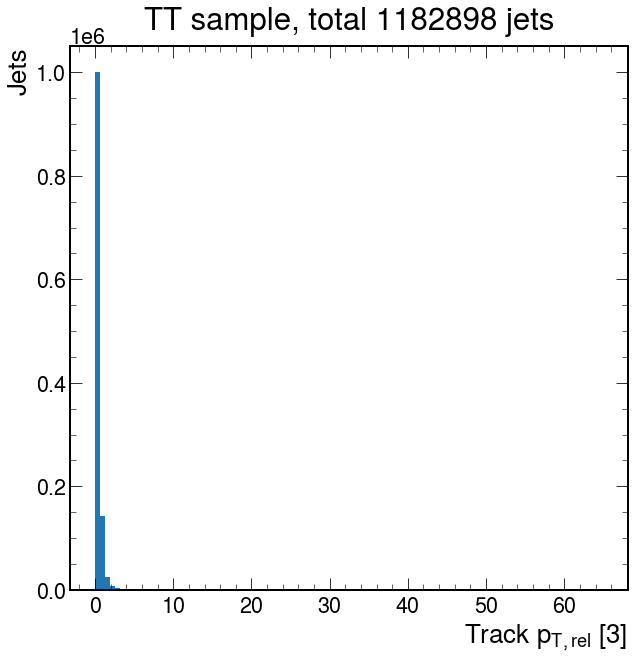

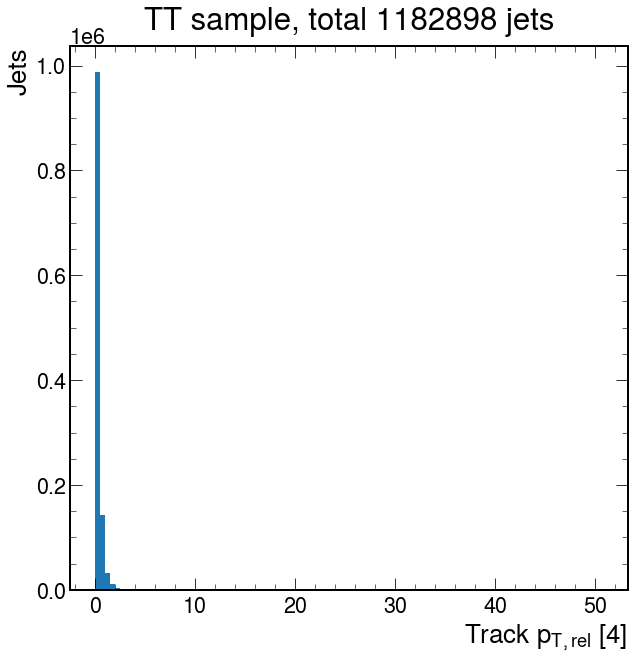

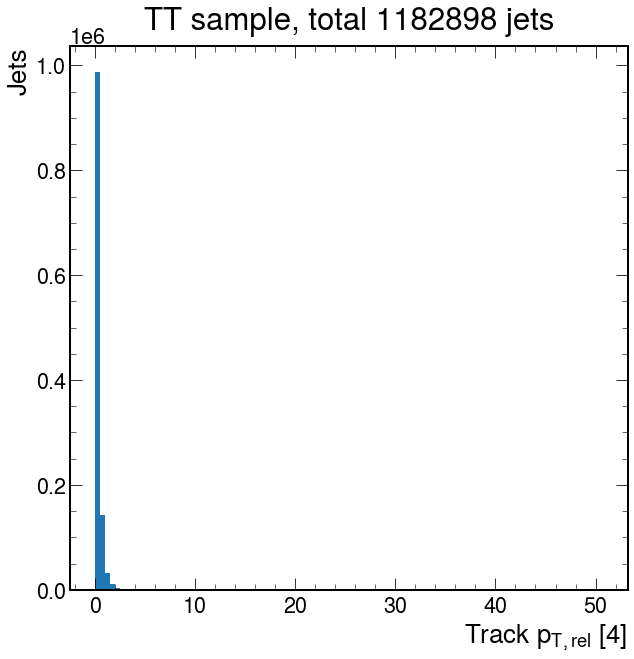

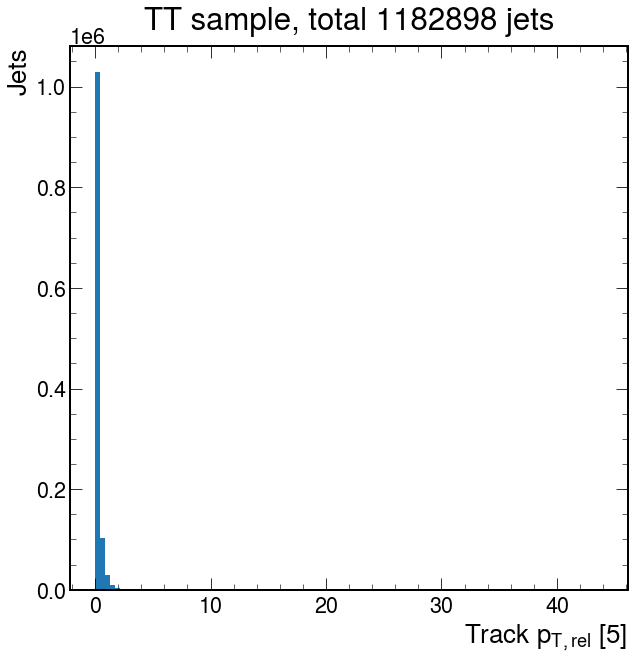

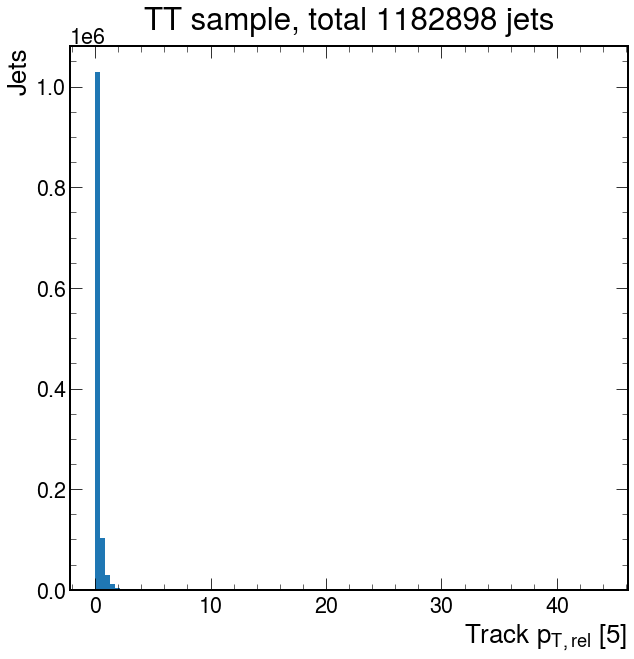

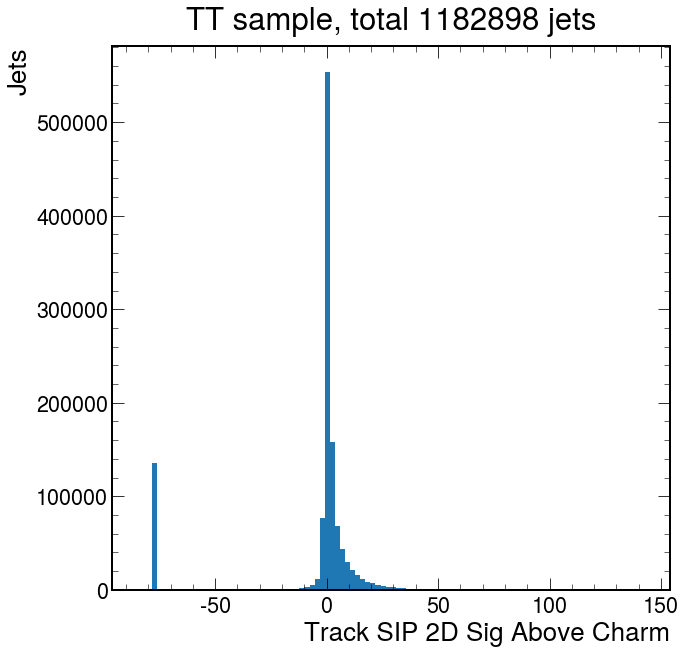

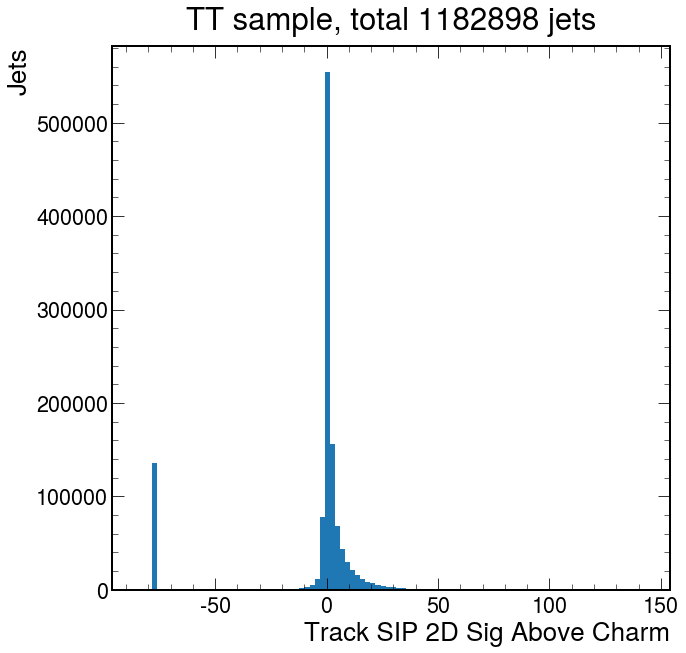

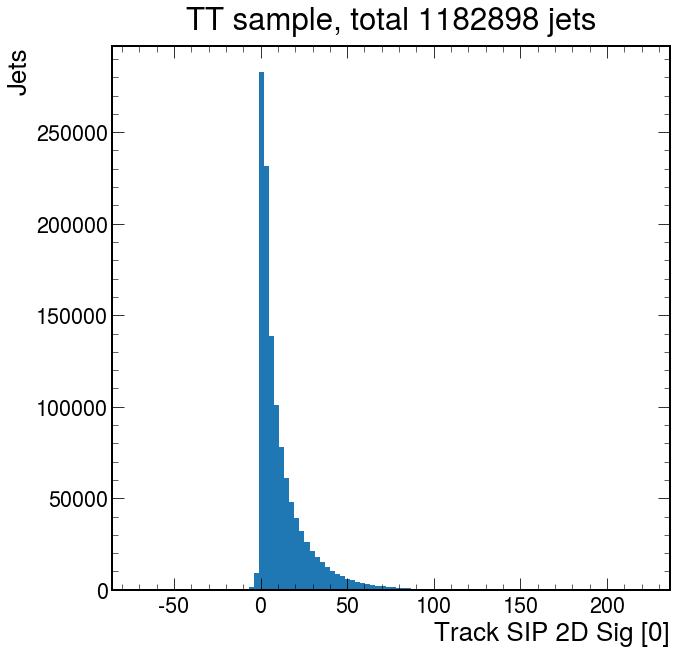

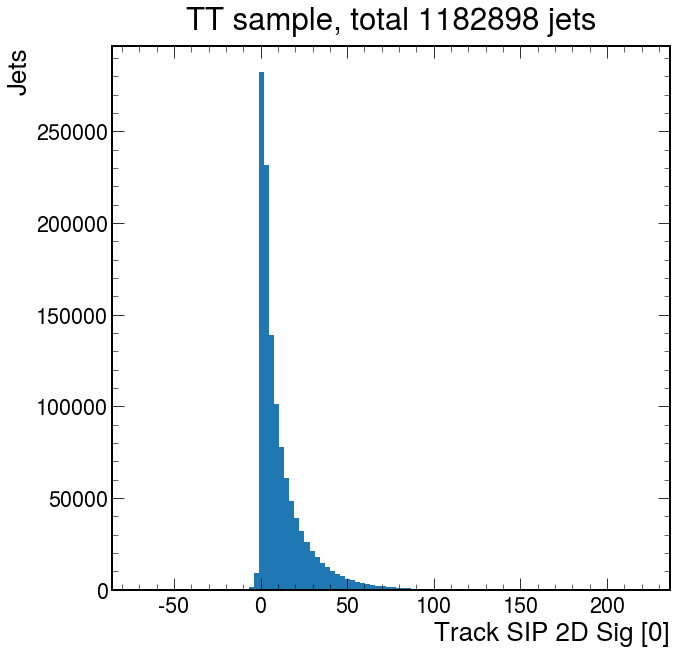

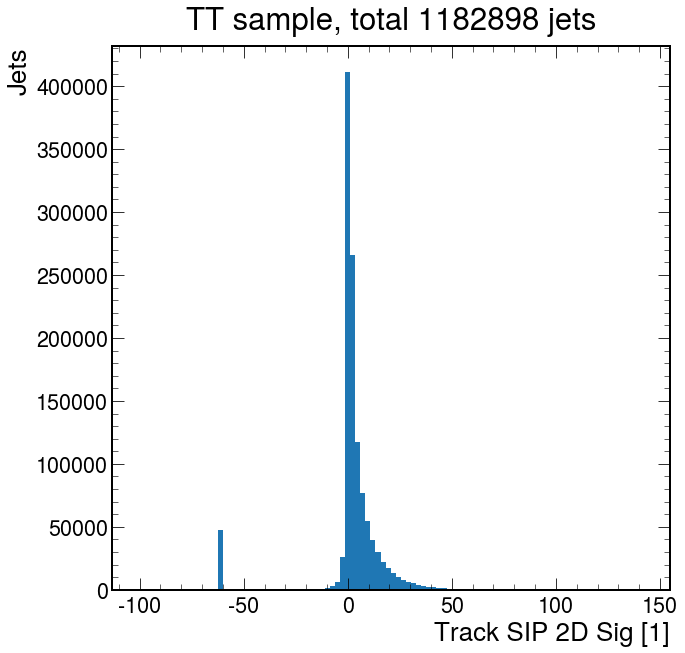

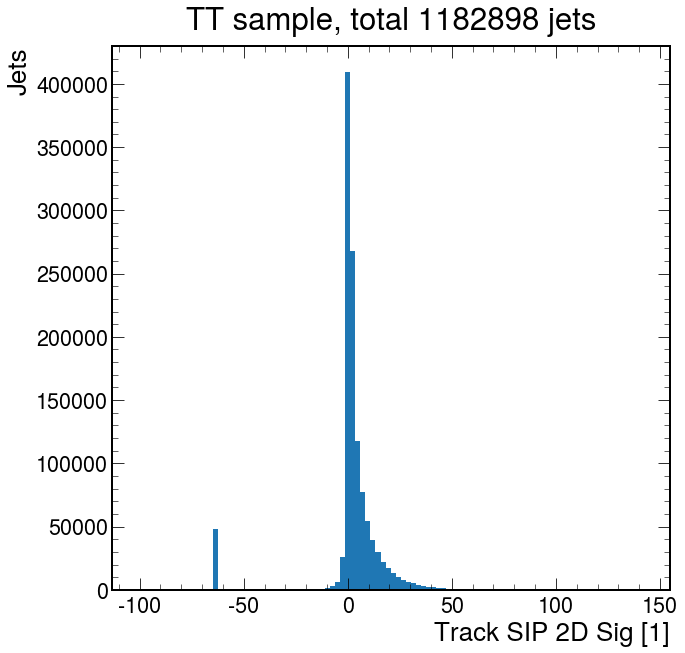

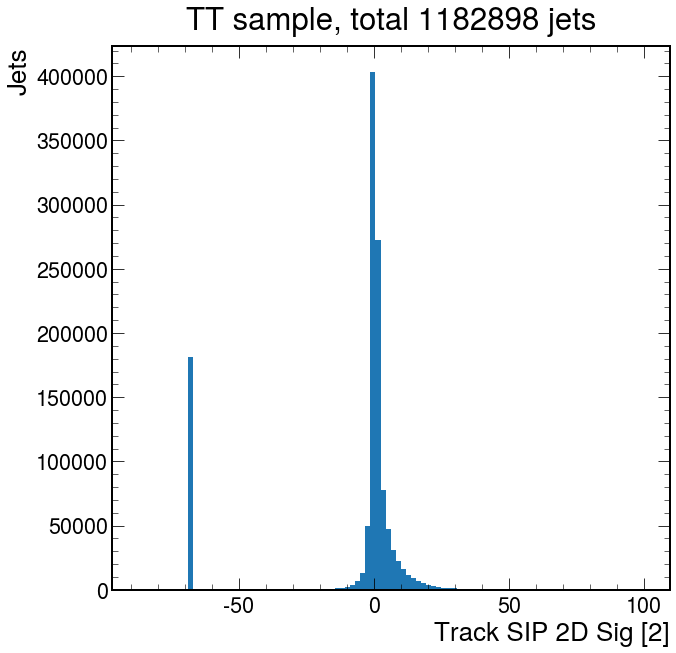

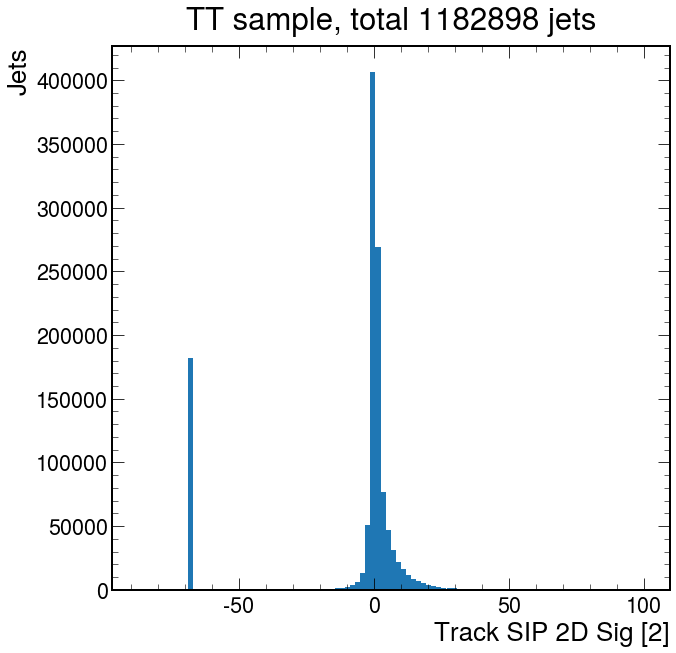

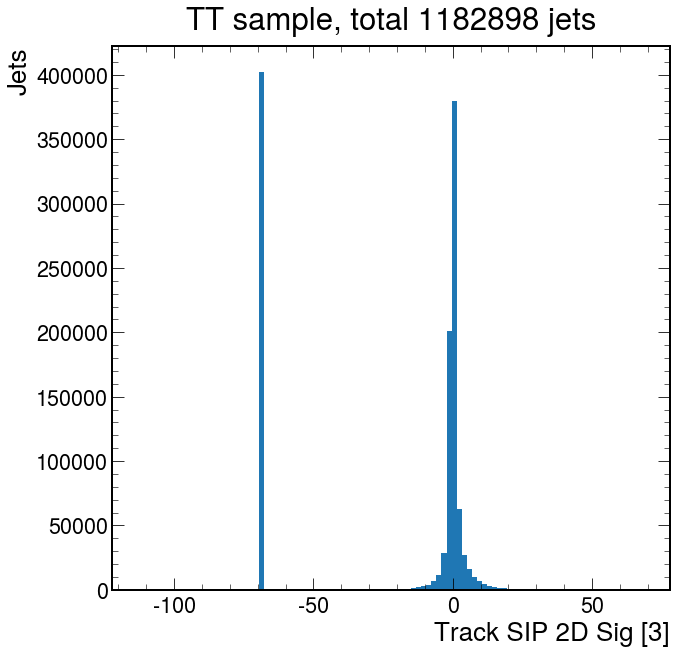

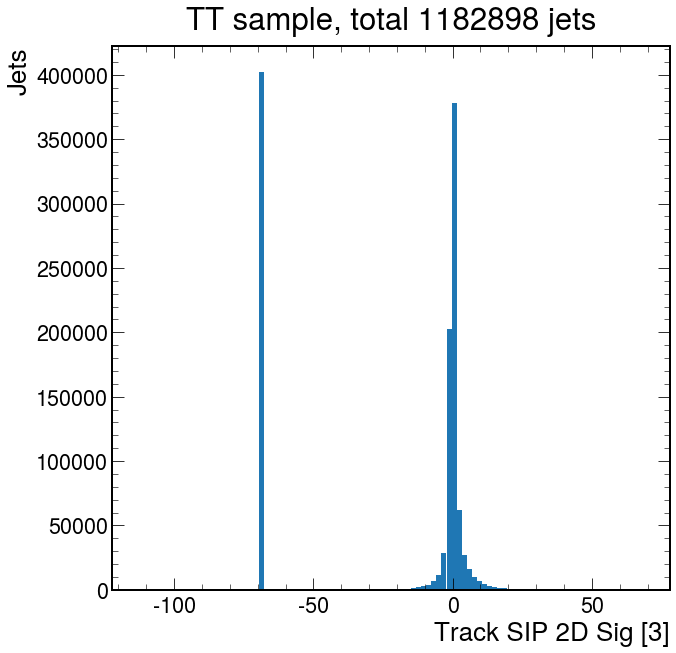

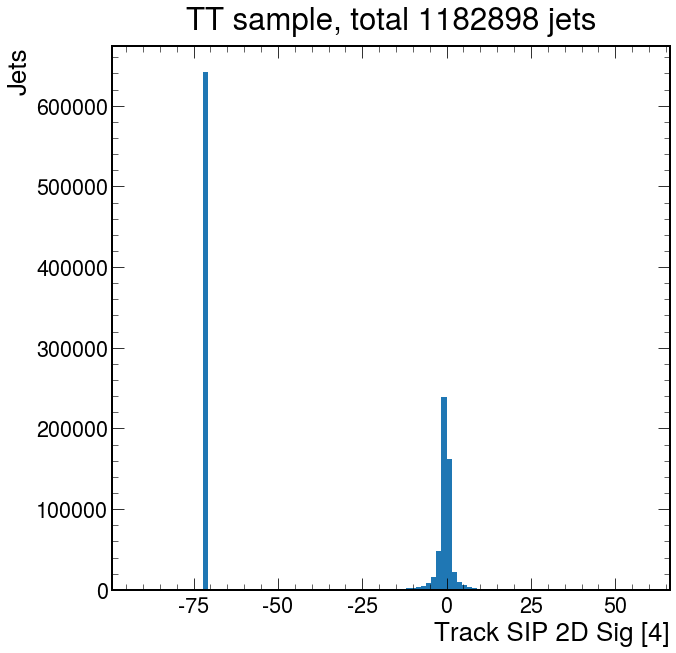

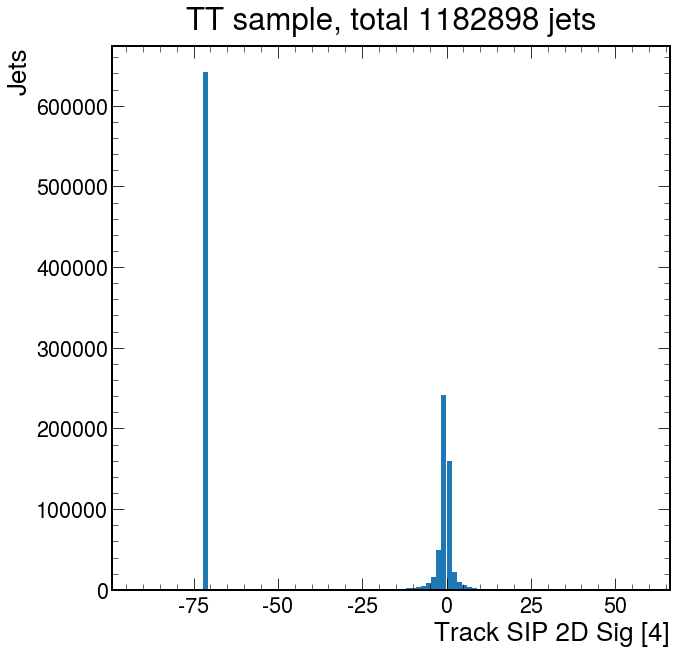

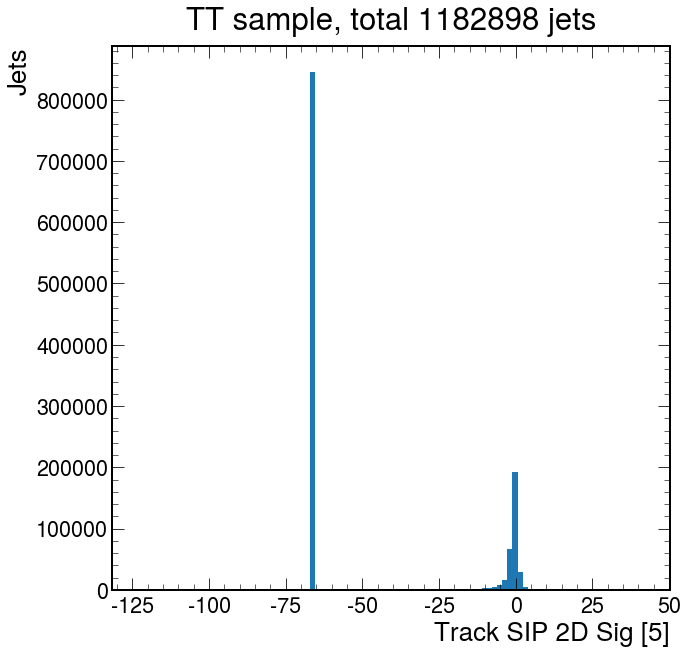

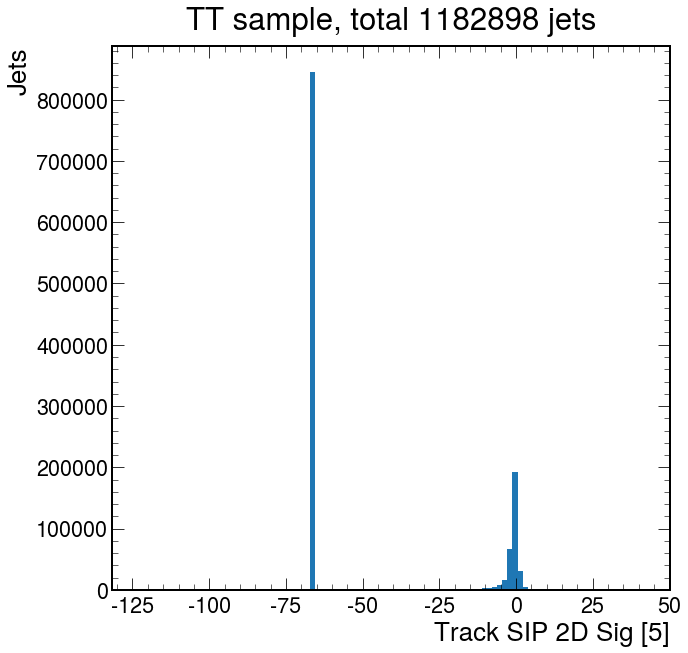

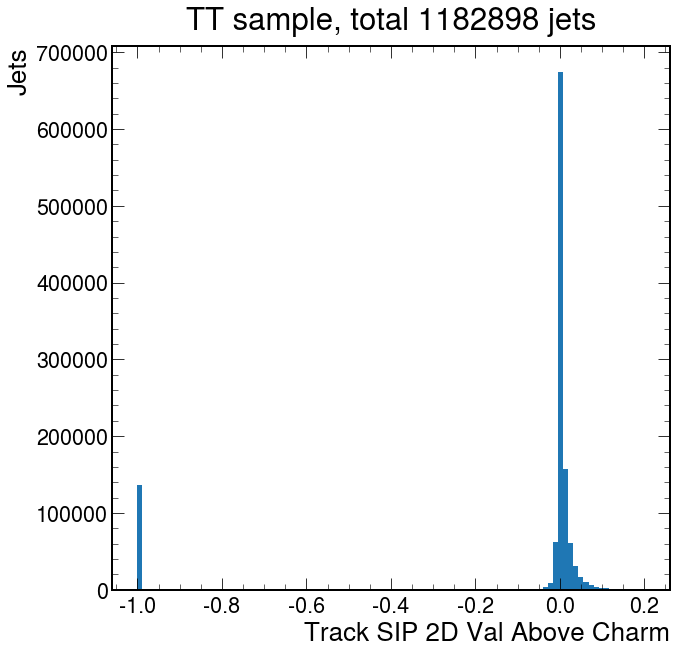

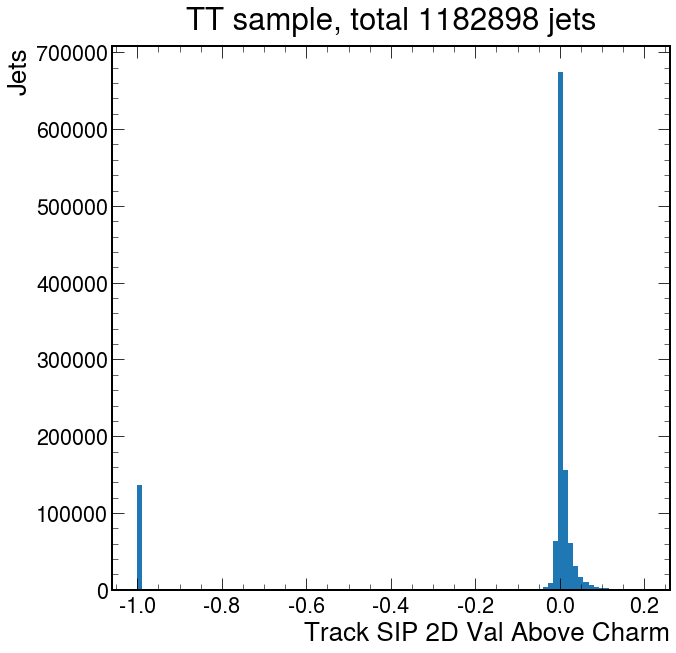

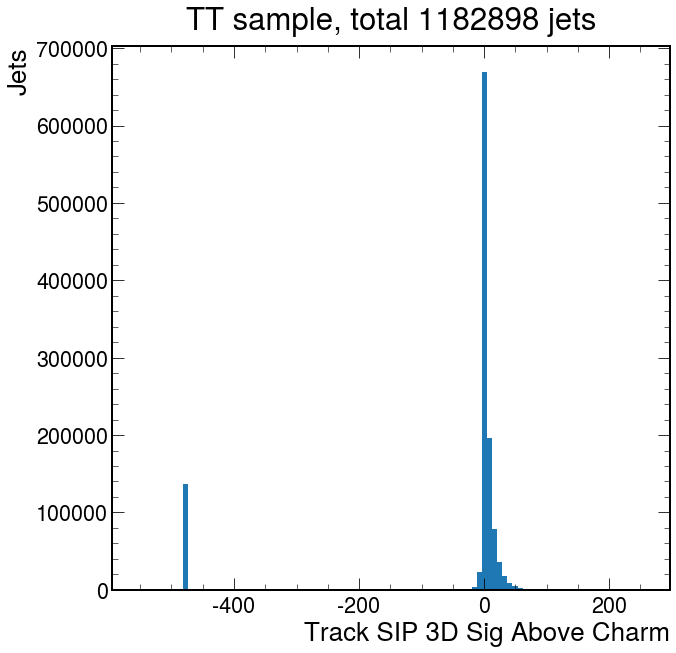

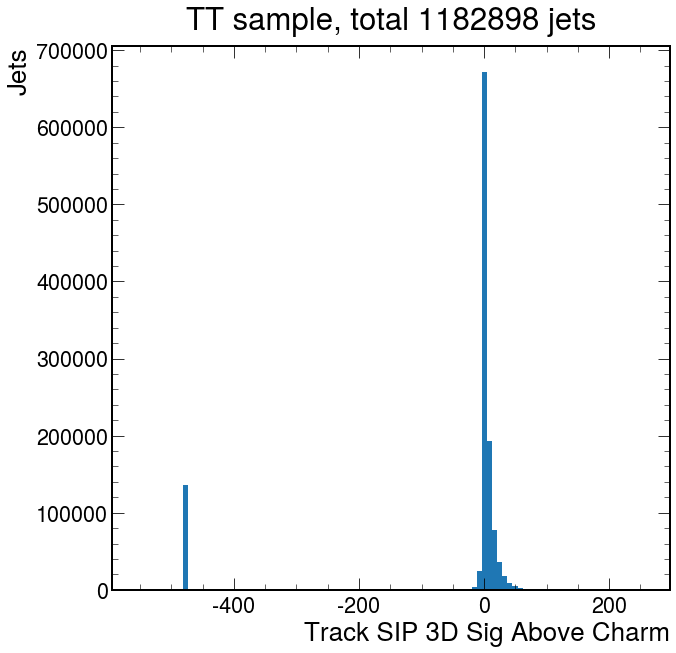

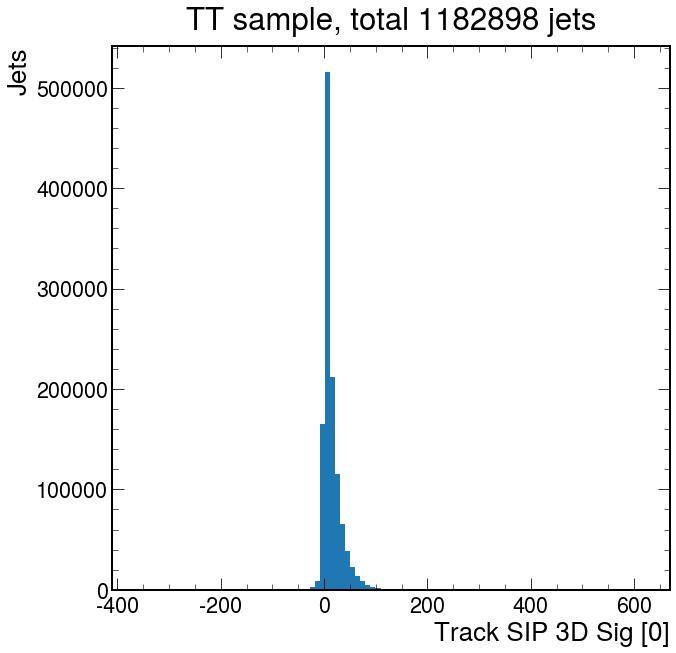

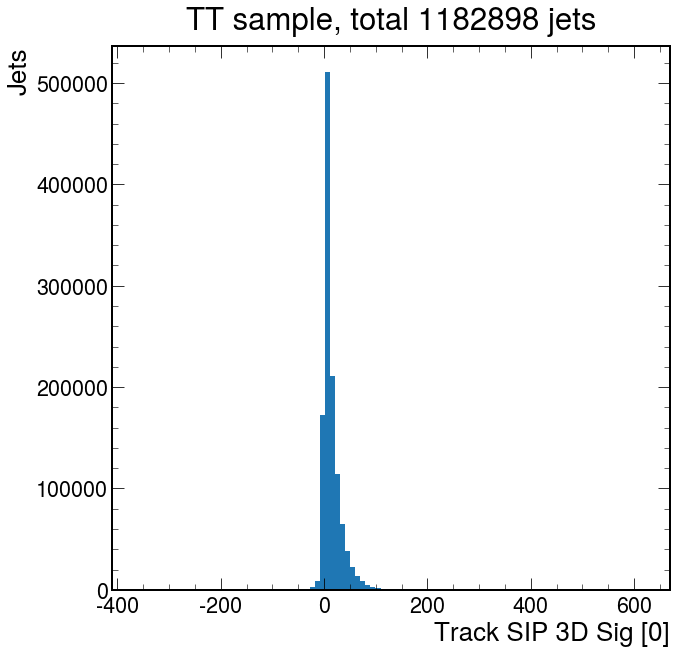

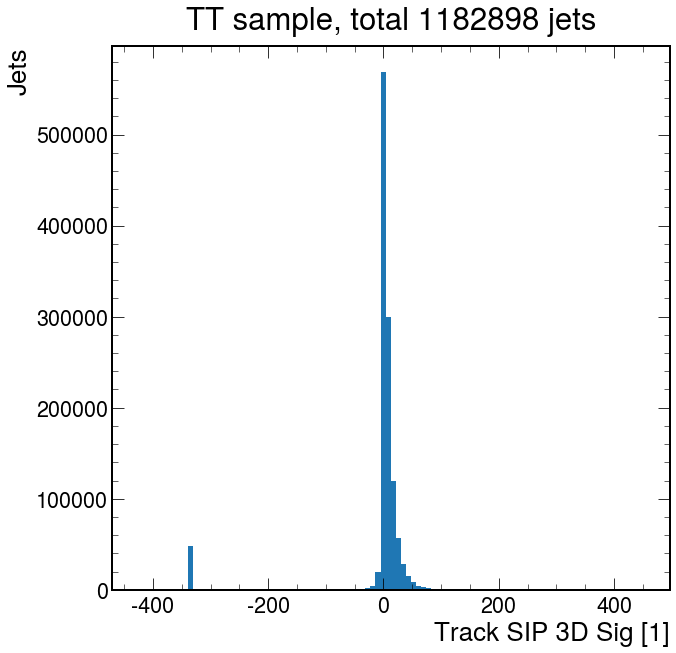

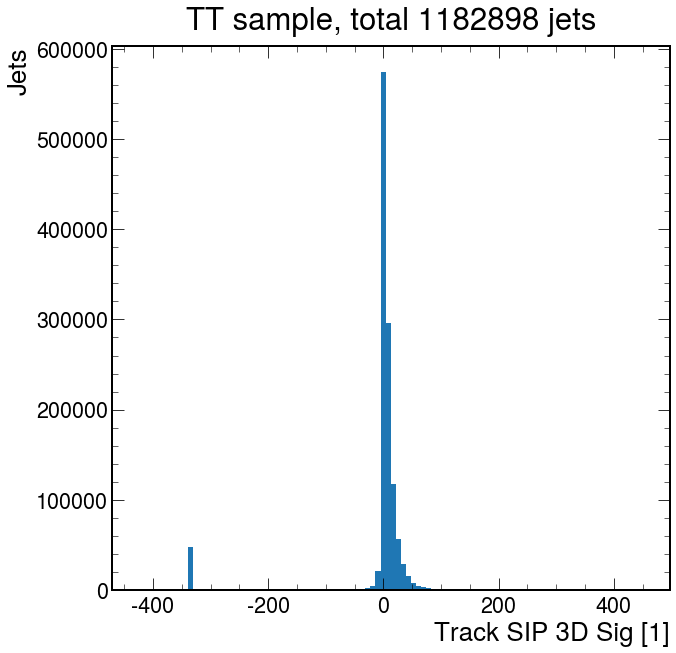

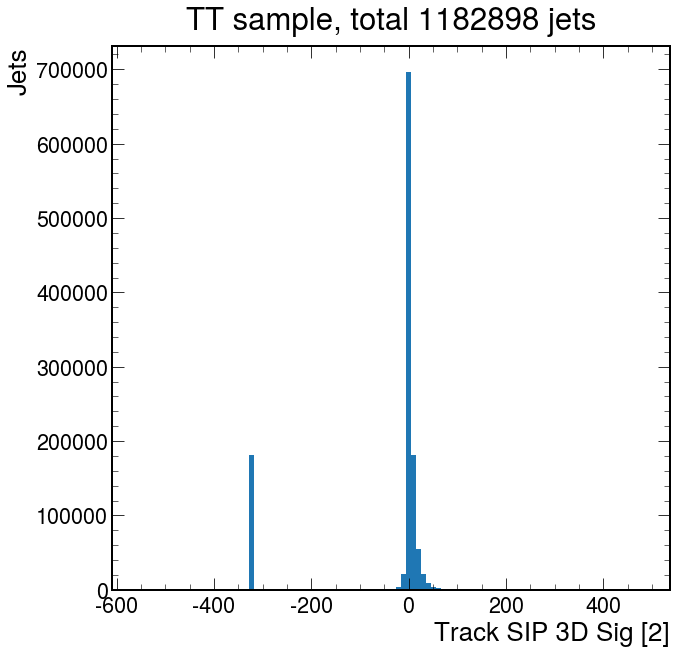

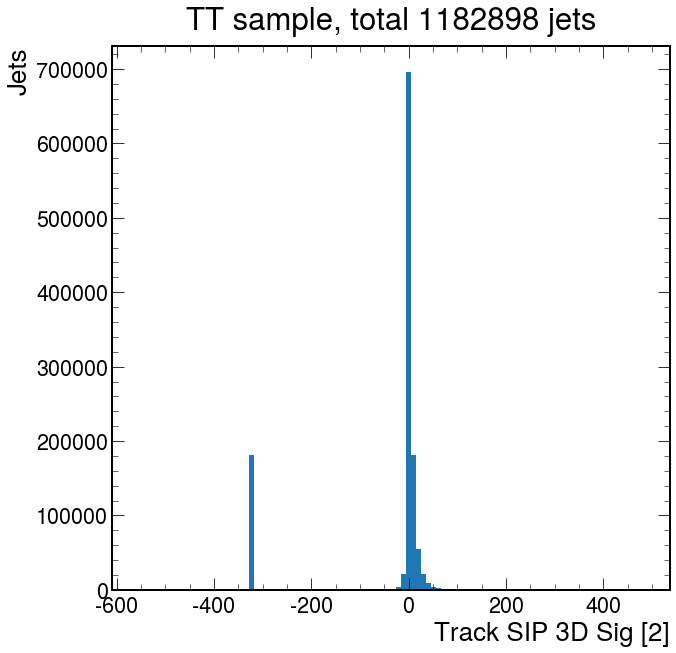

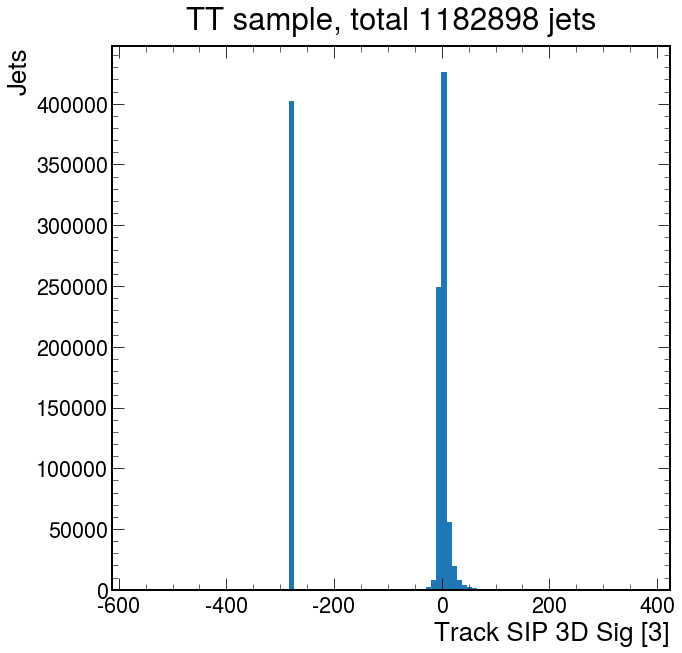

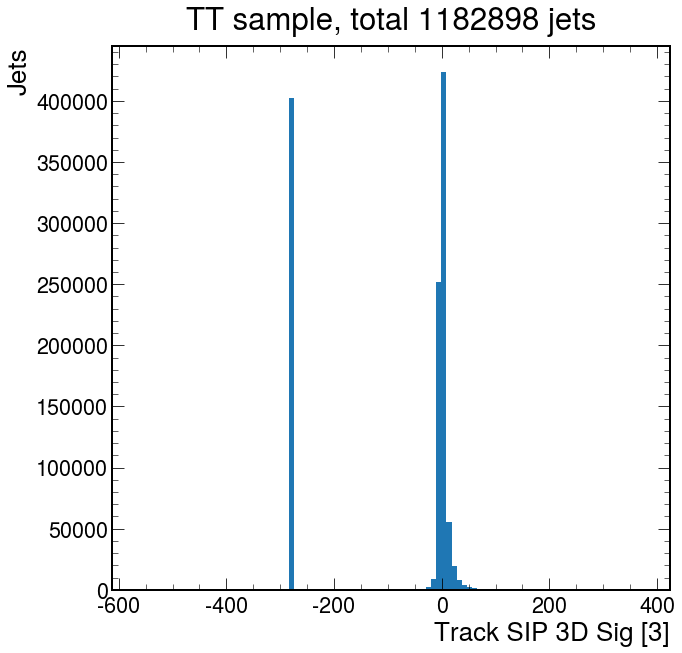

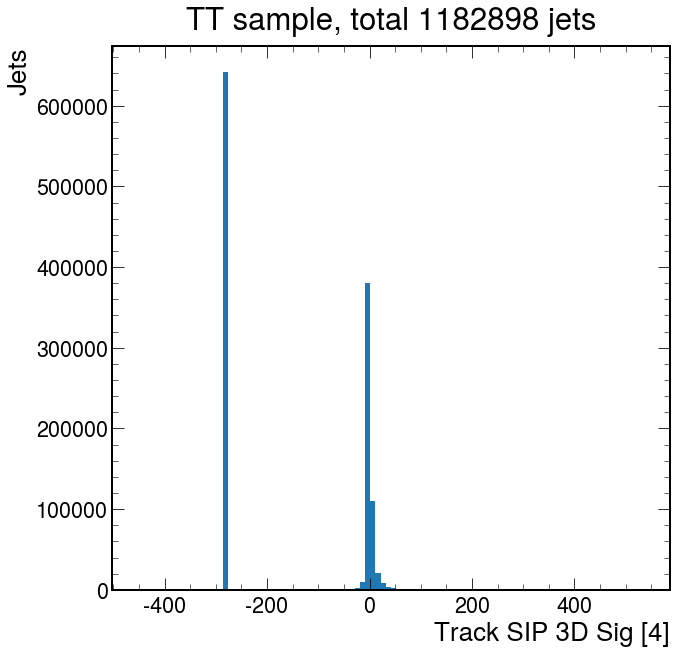

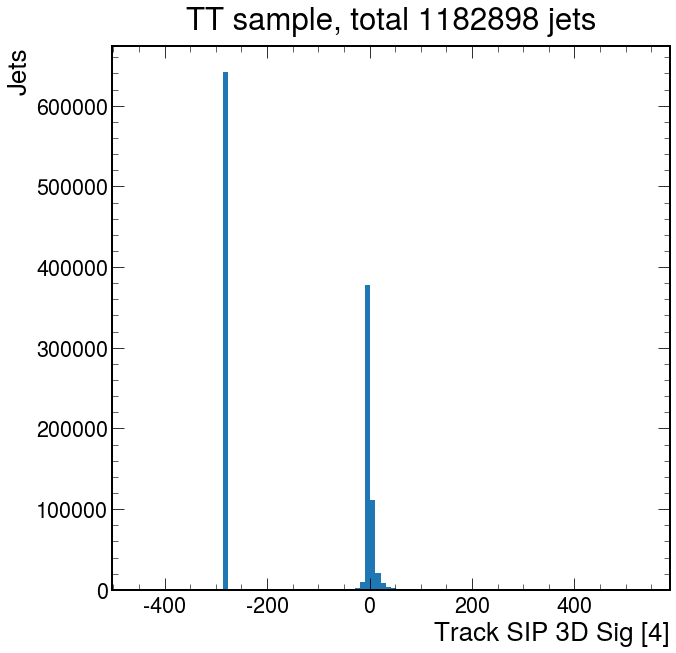

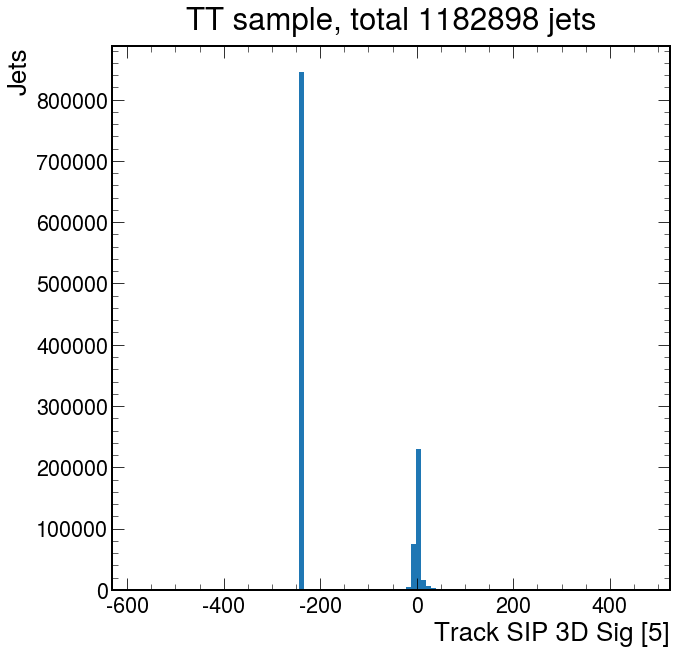

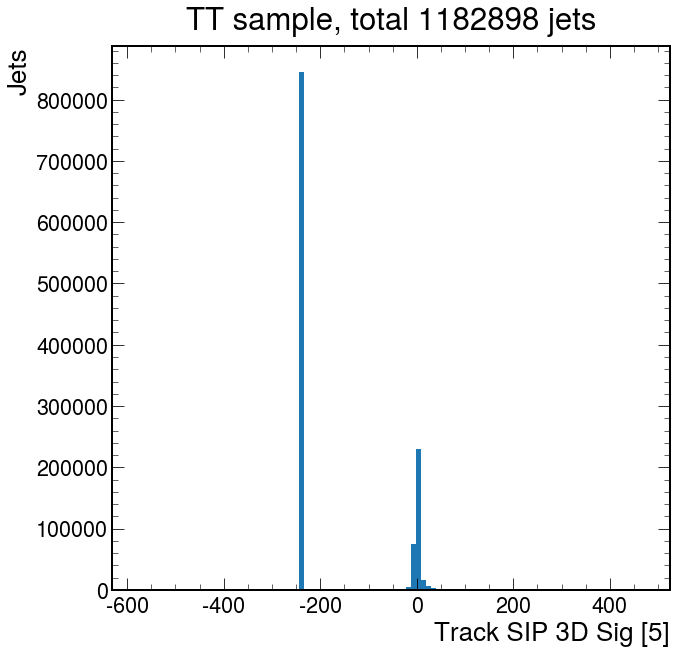

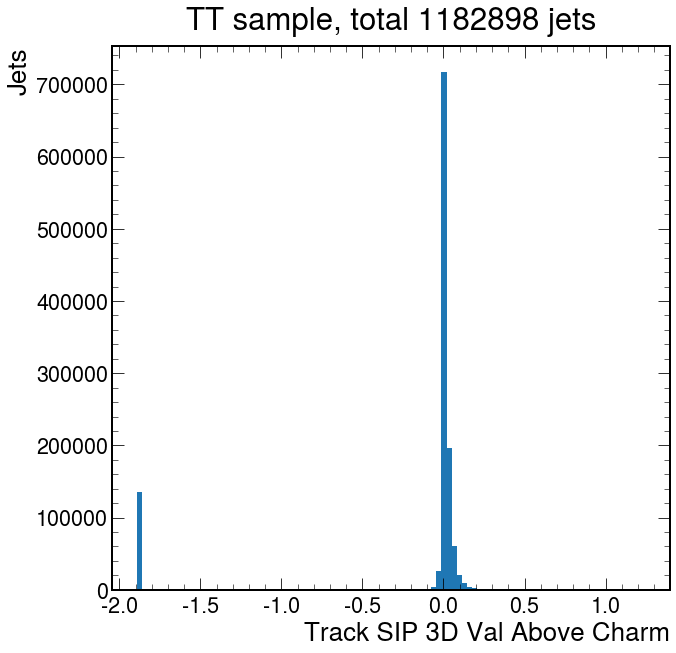

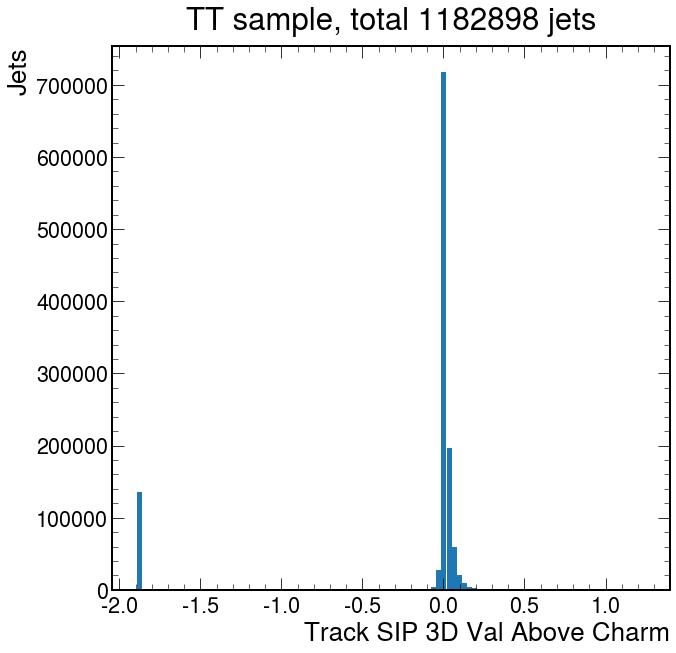

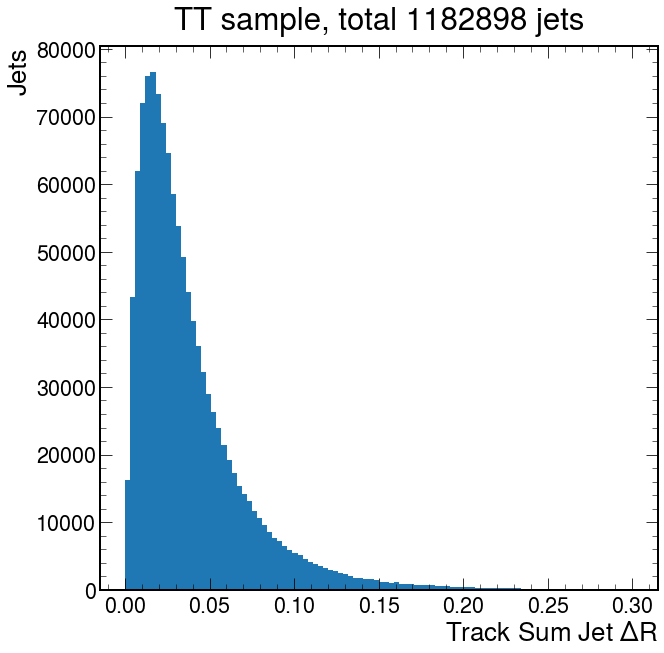

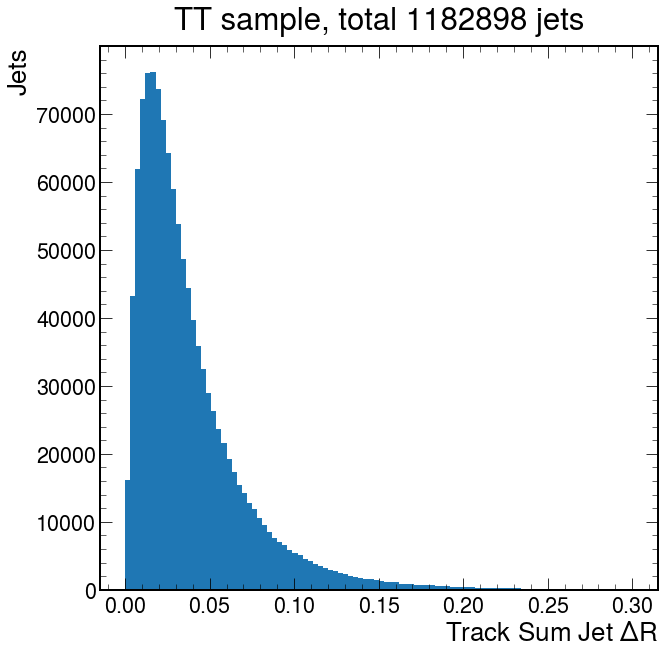

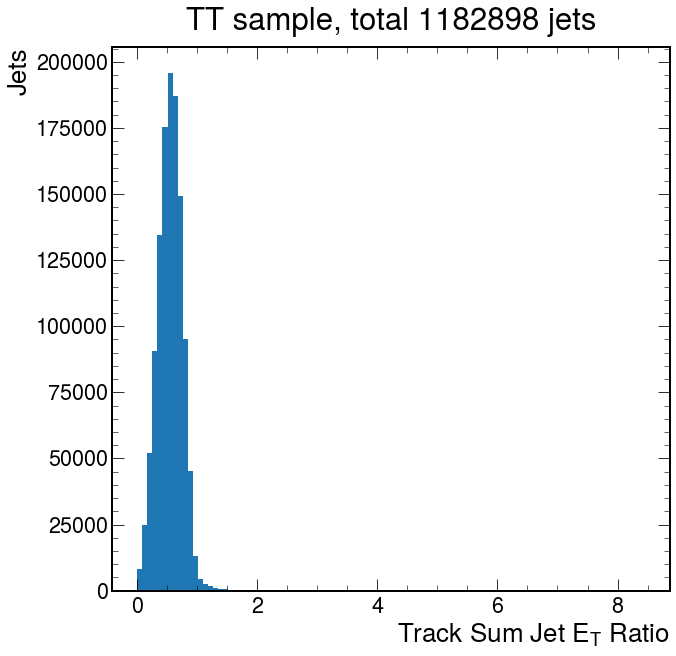

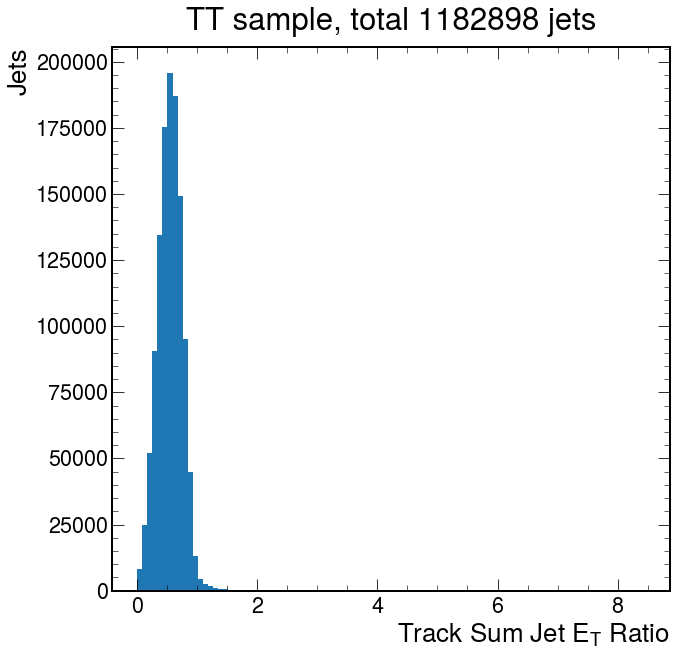

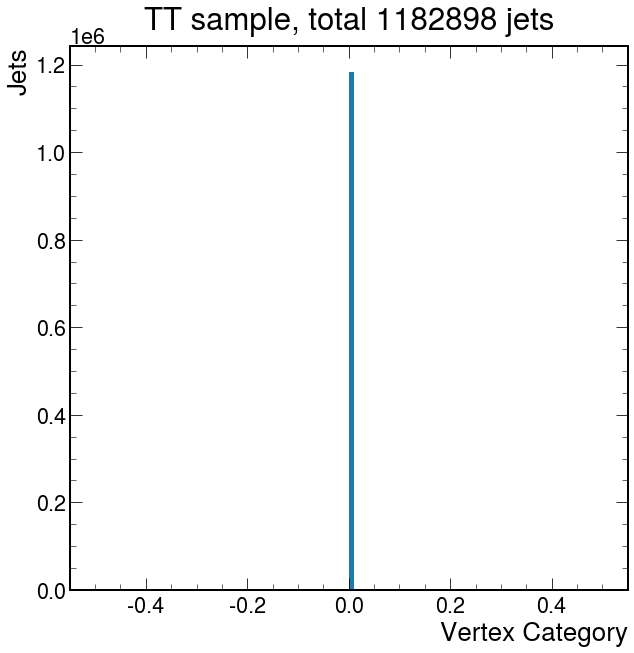

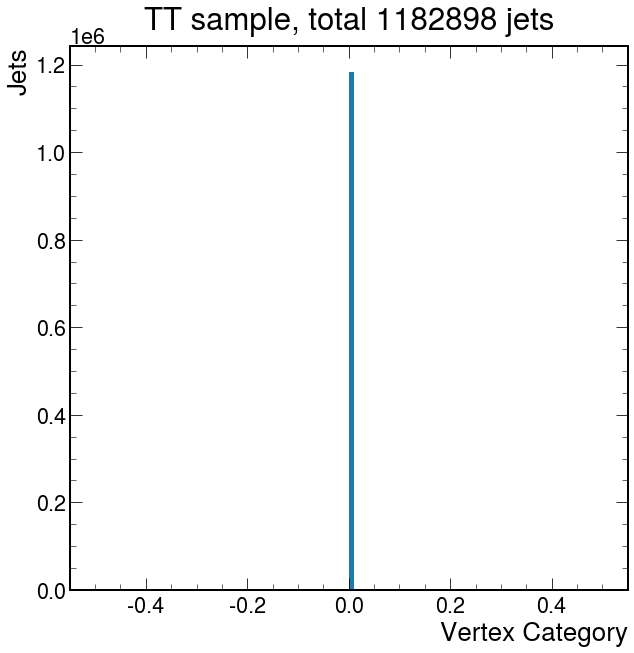

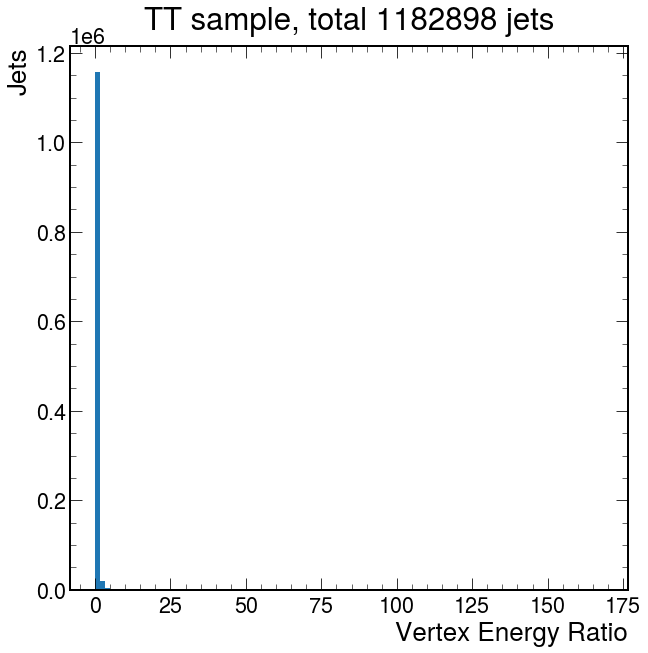

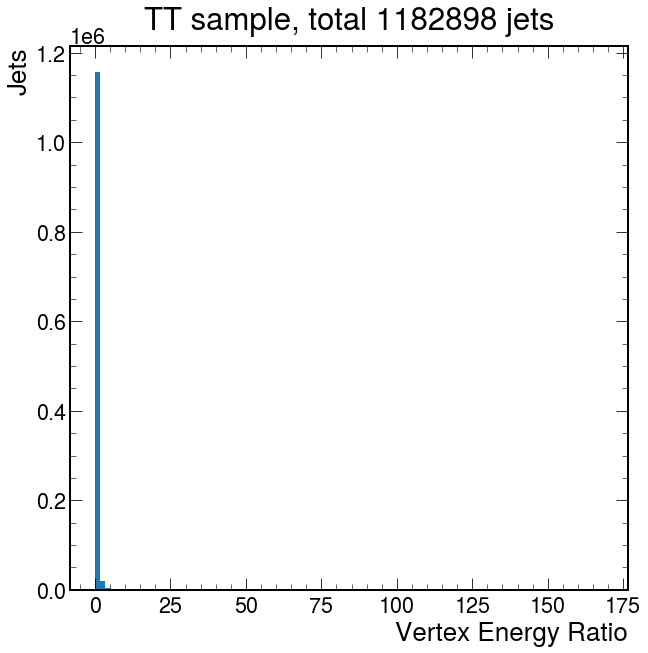

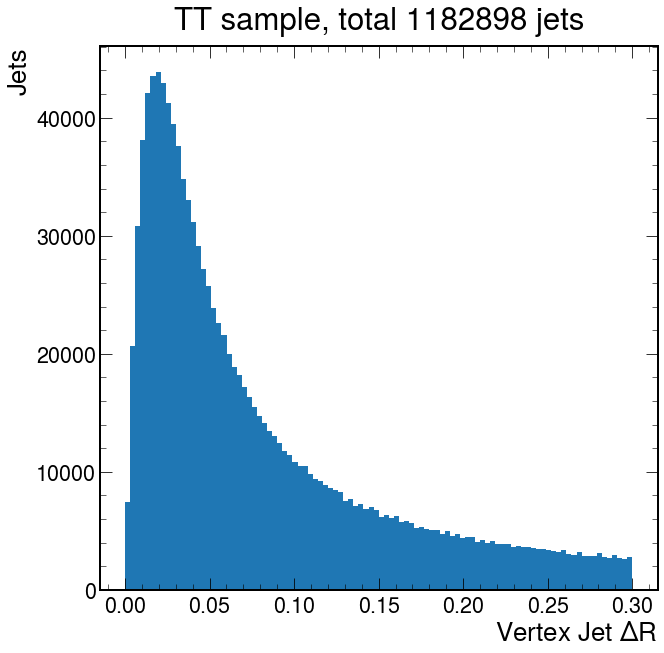

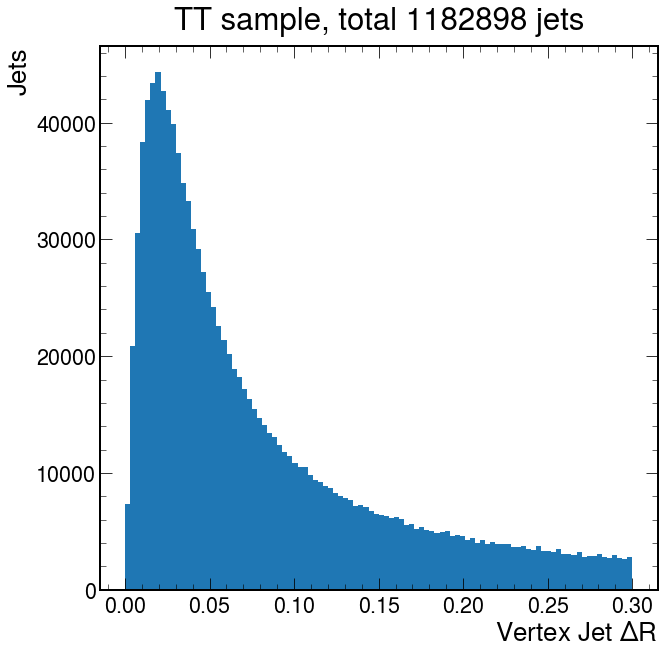

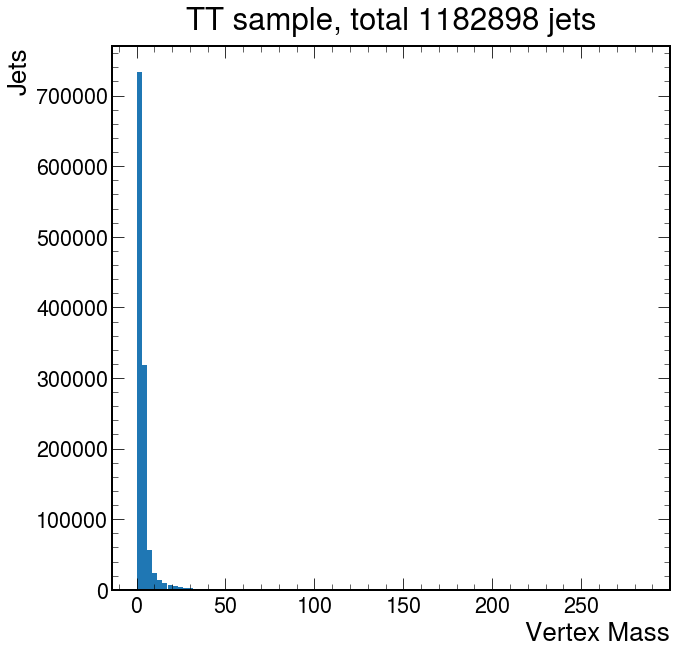

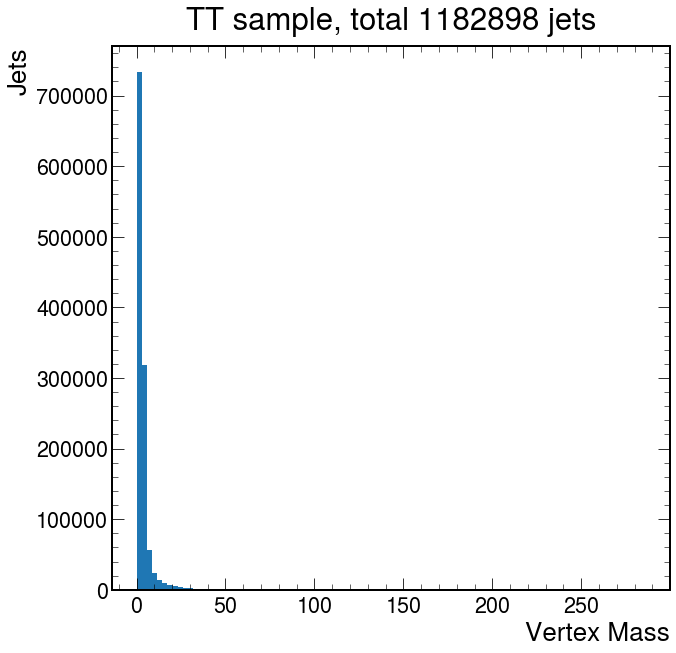

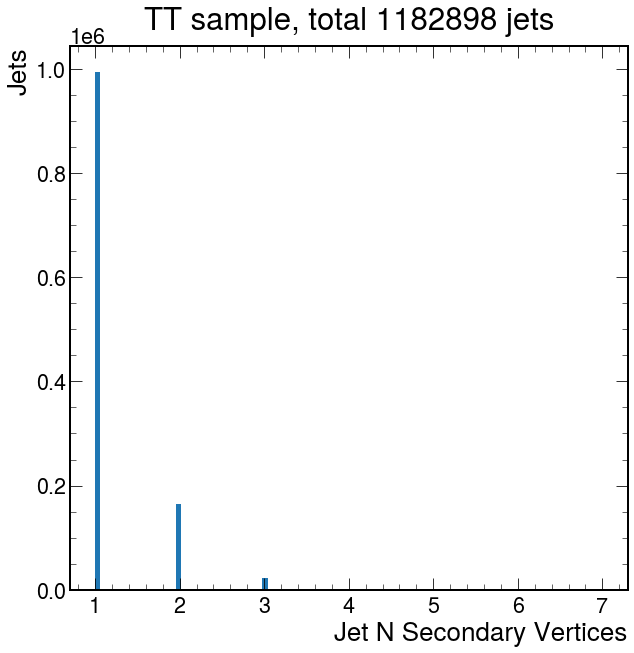

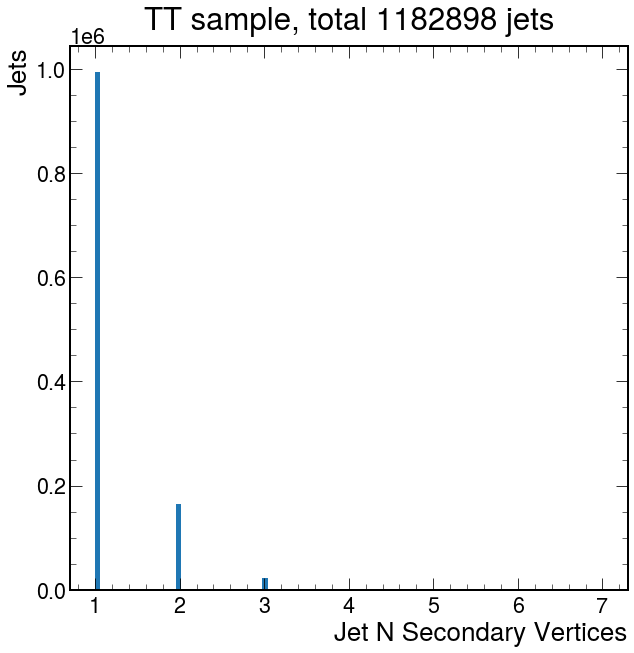

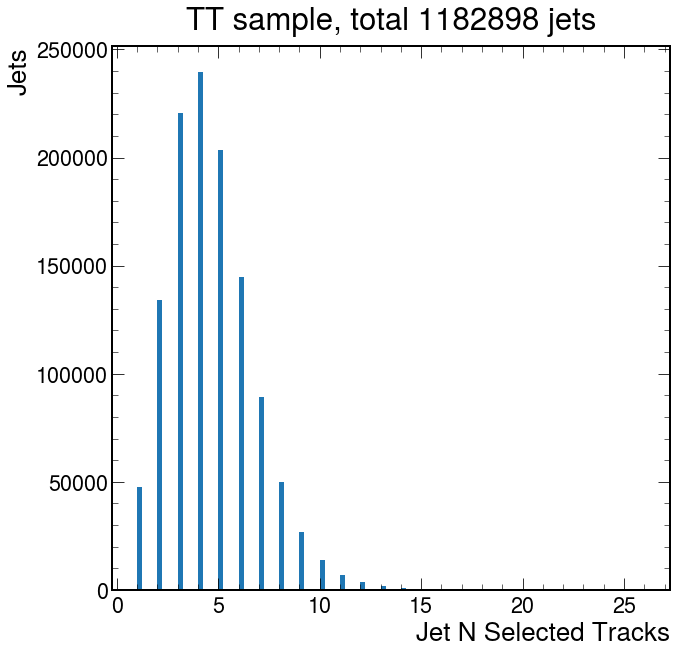

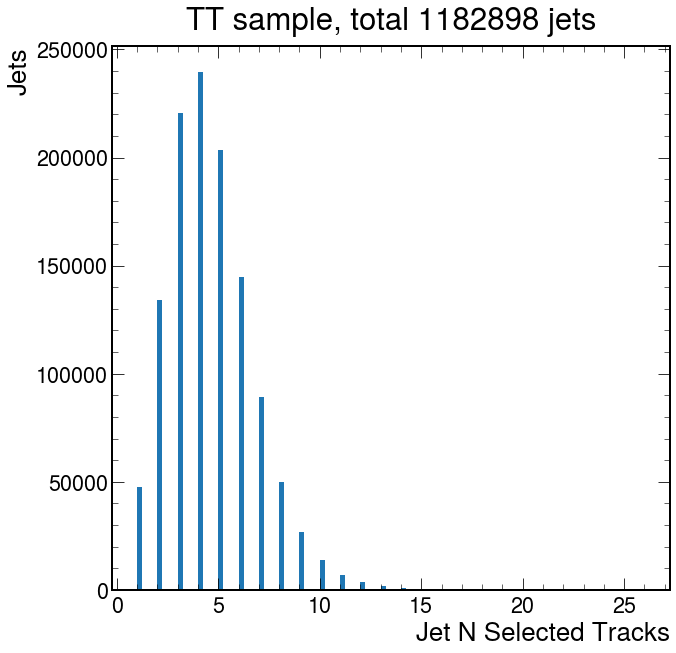

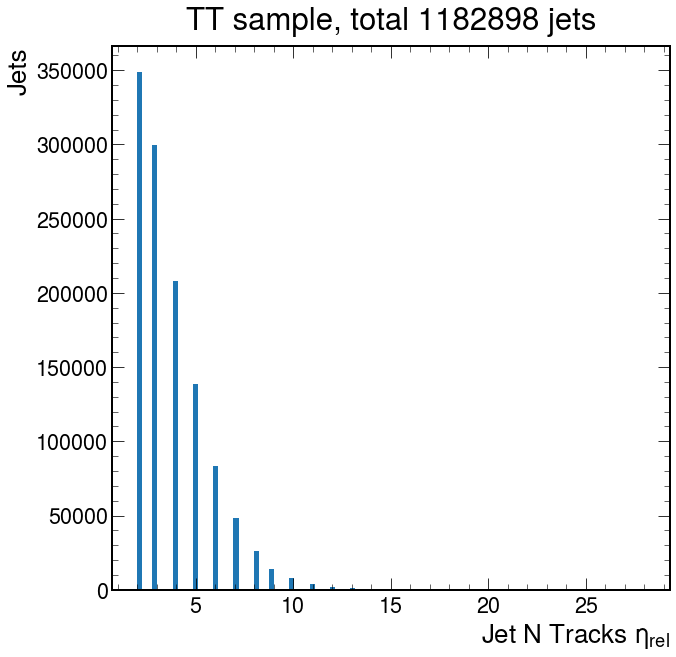

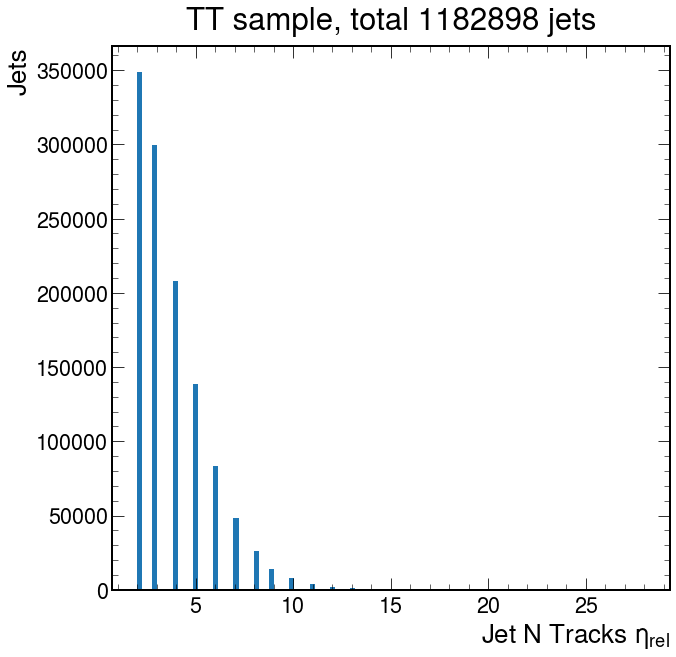

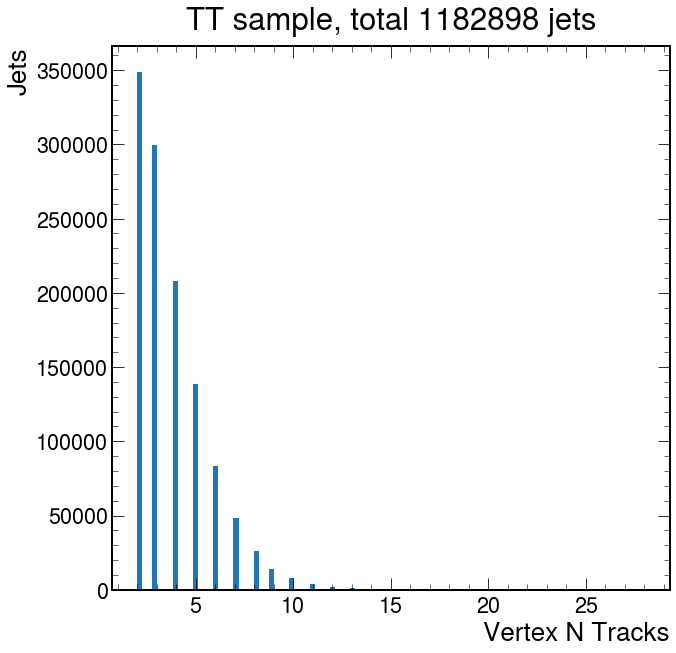

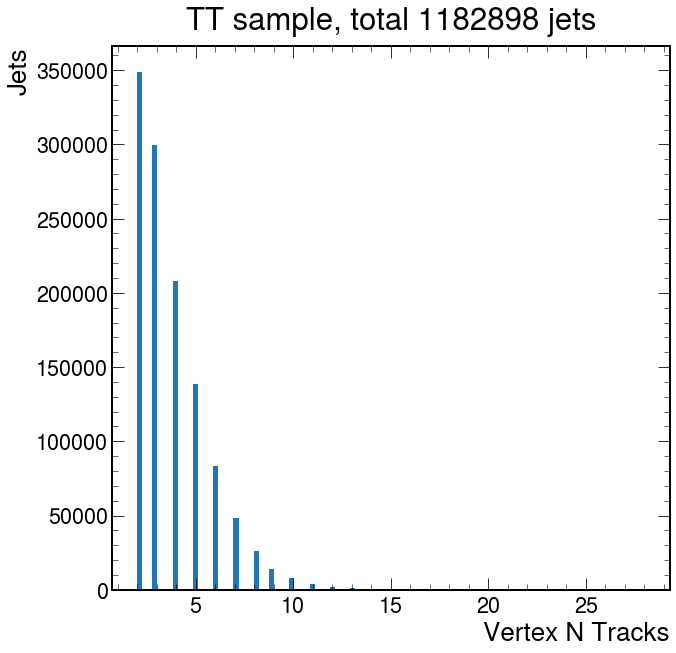

In [31]:
for k in range(67):
    plot_in_prescale(k, singleDataset, f'TT sample, total {n_total} jets',log=False)
    plot_in(k, singleScaledDataset, singleScalers, f'TT sample, total {n_total} jets',log=False)

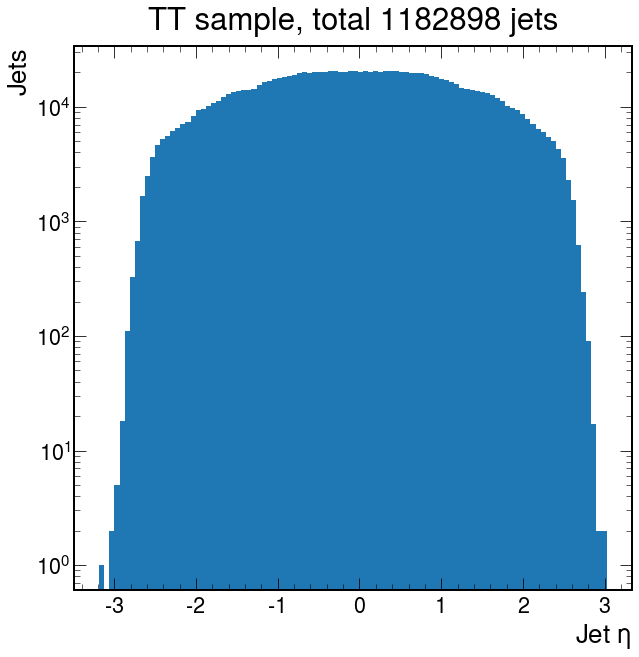

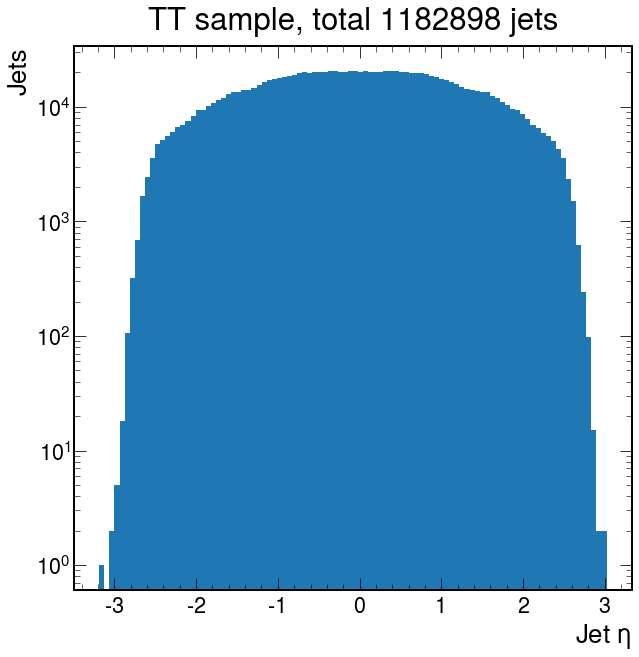

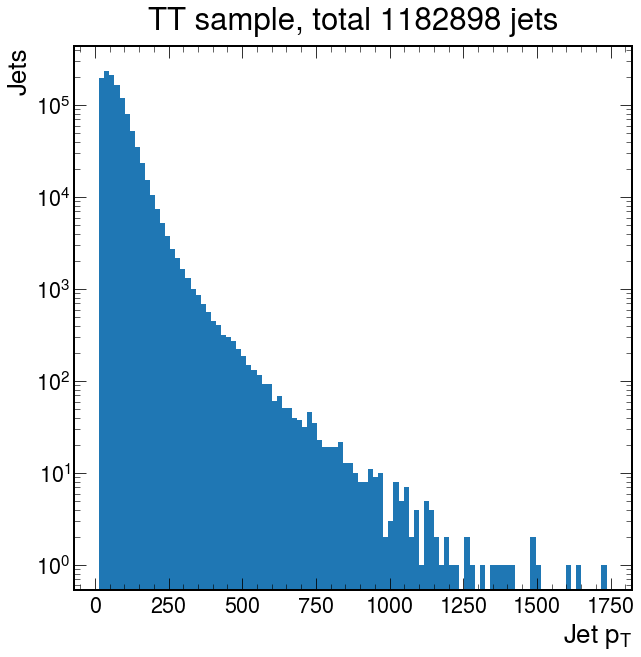

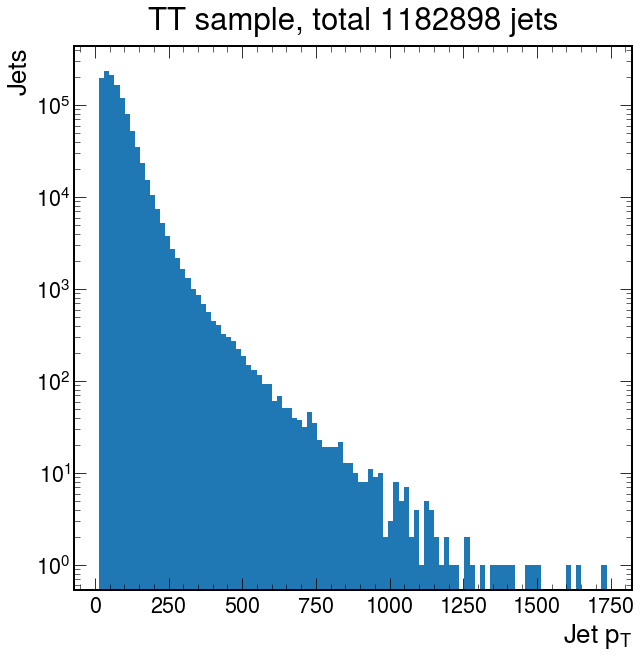

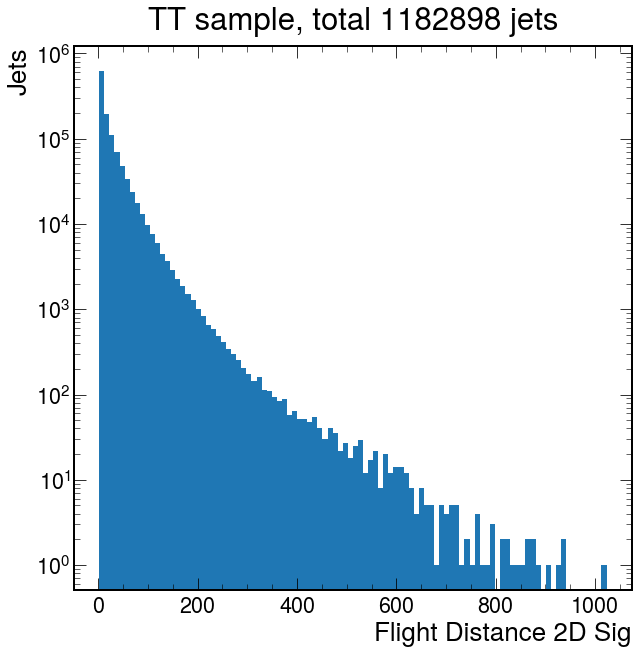

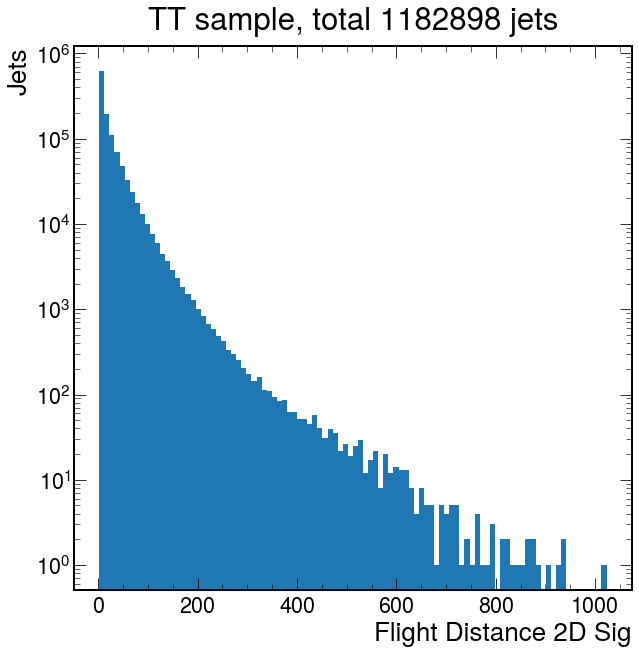

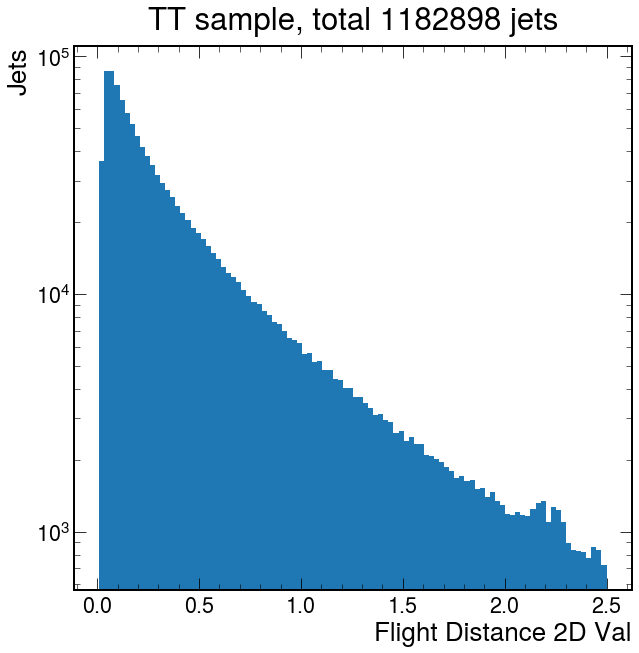

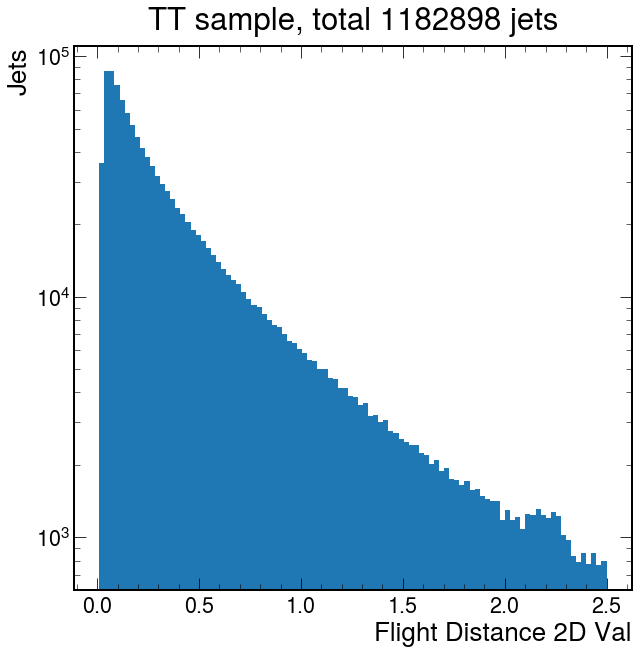

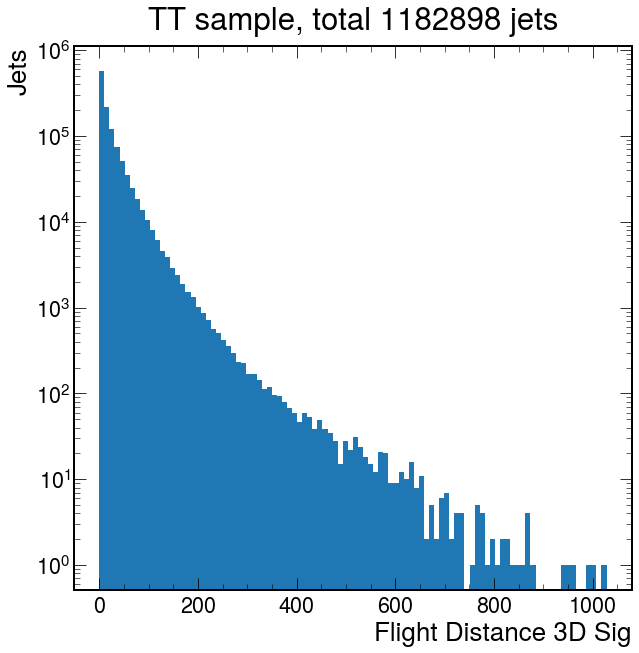

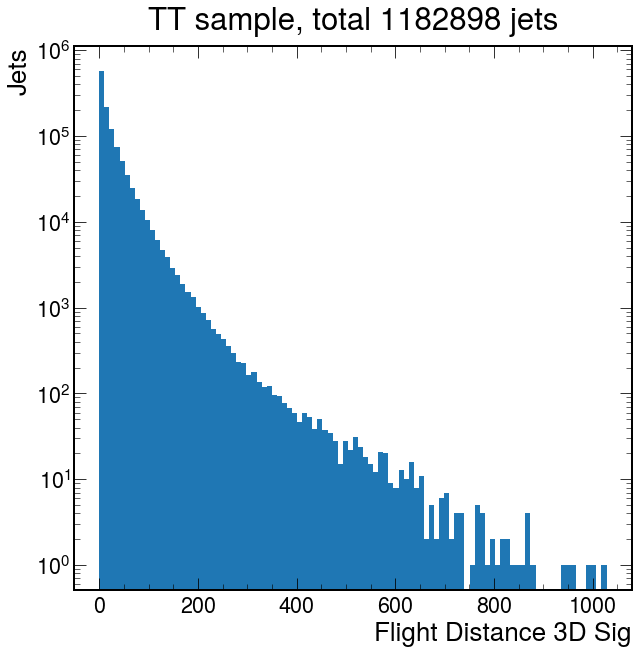

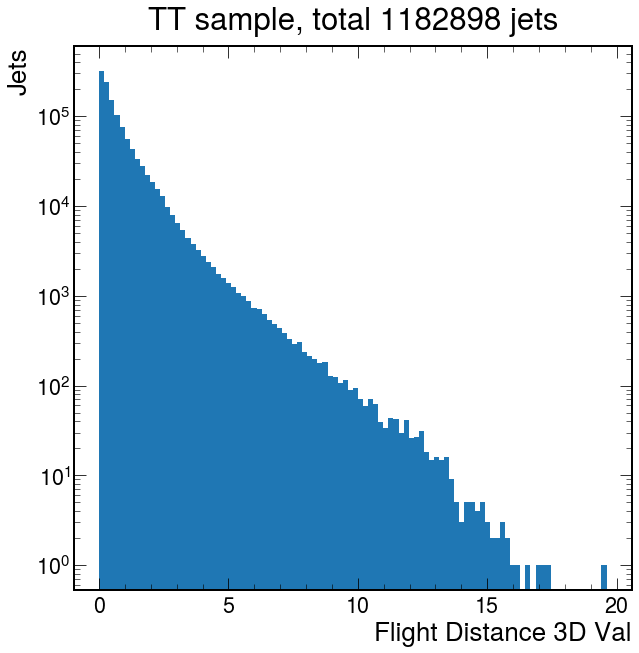

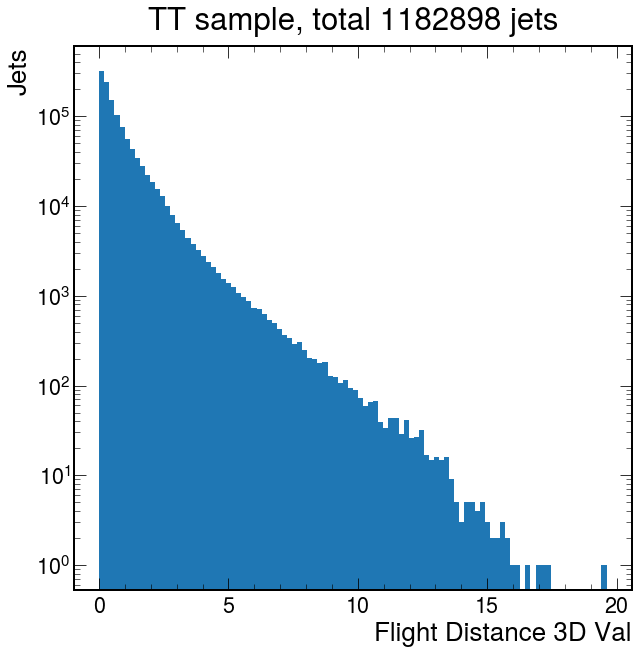

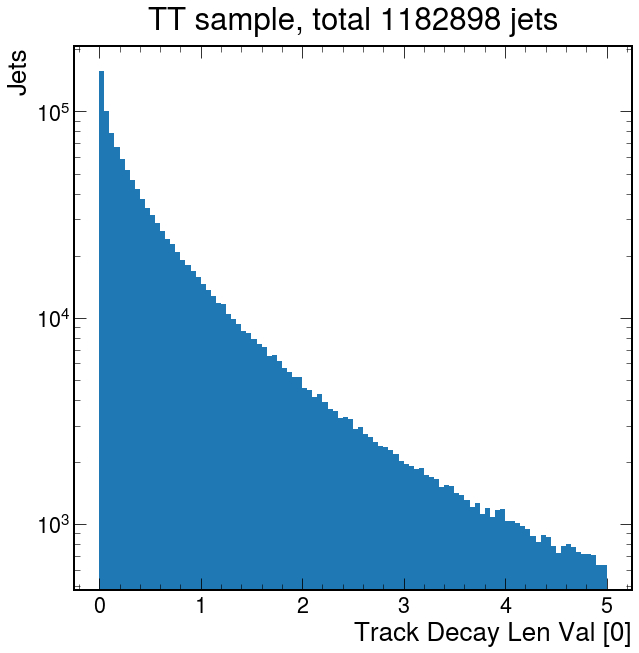

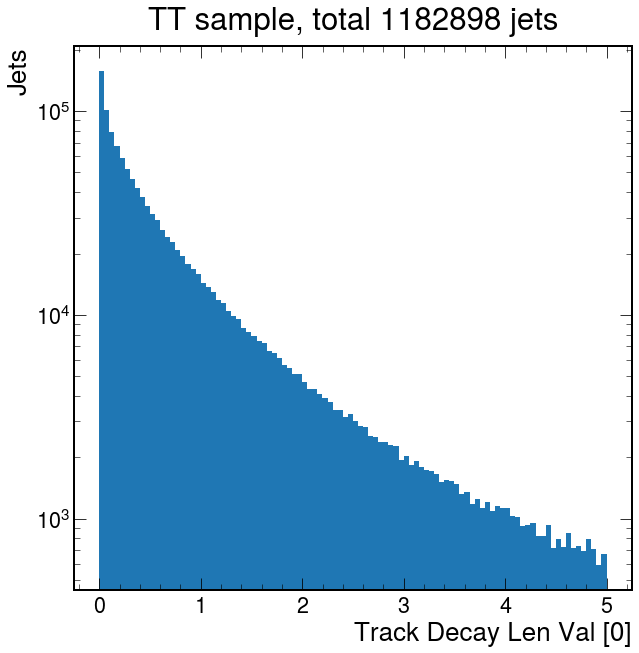

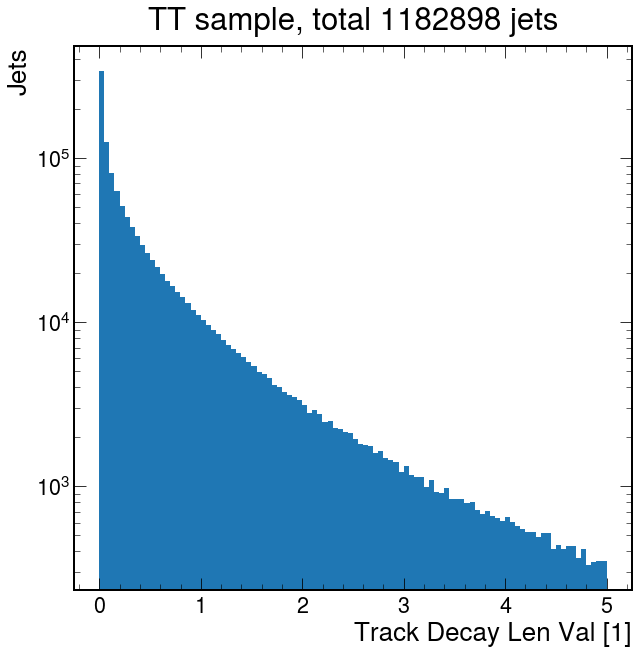

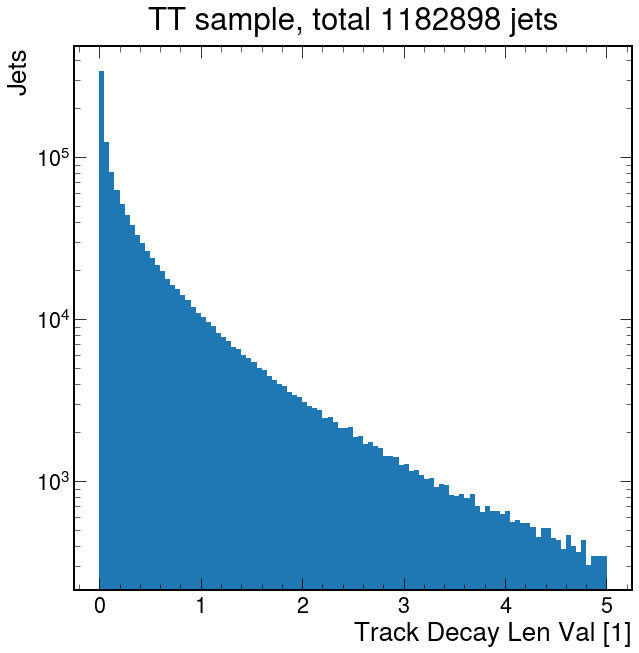

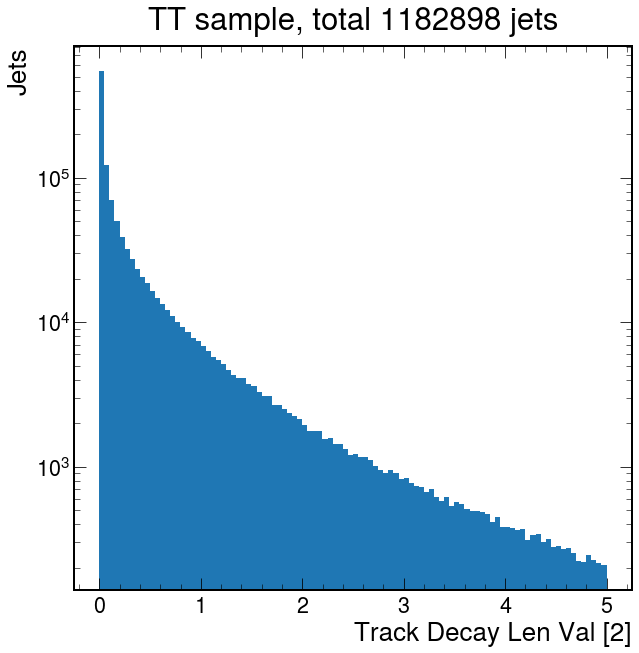

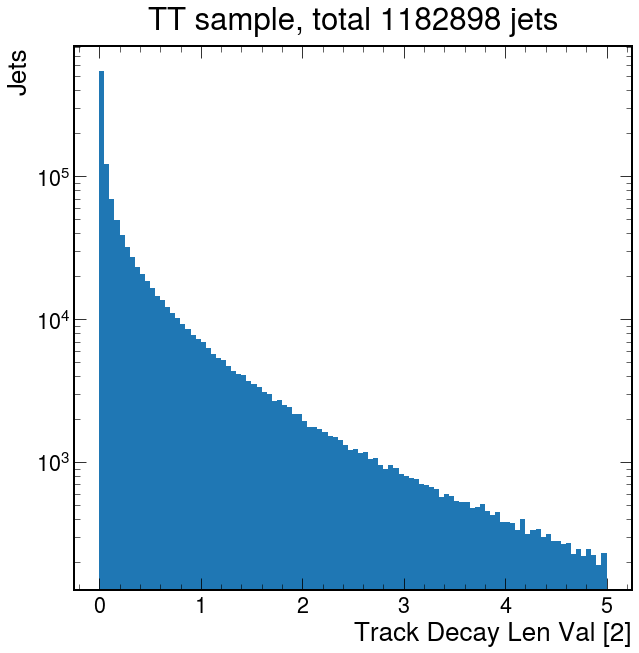

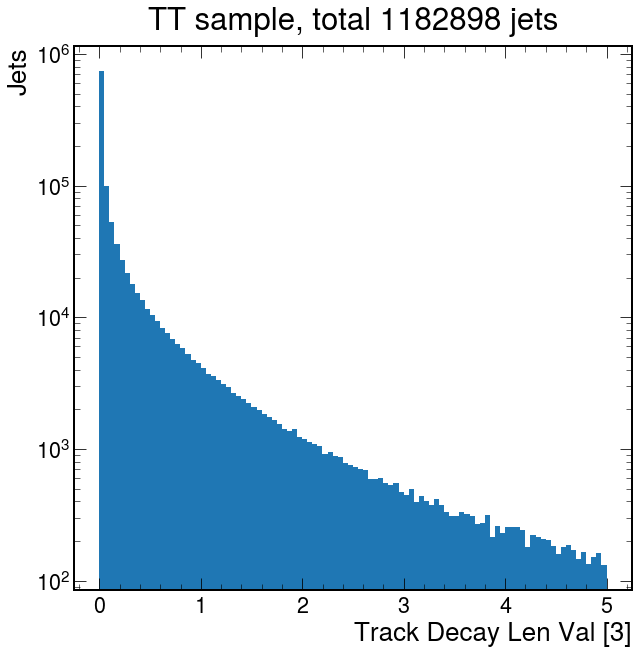

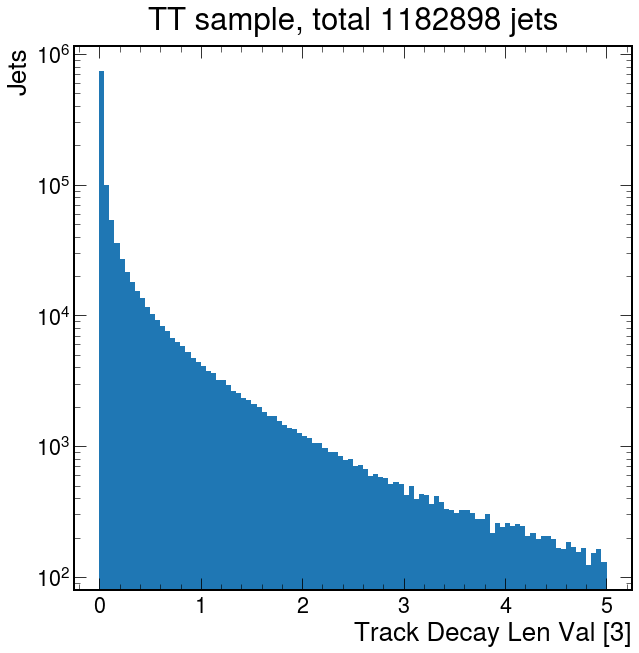

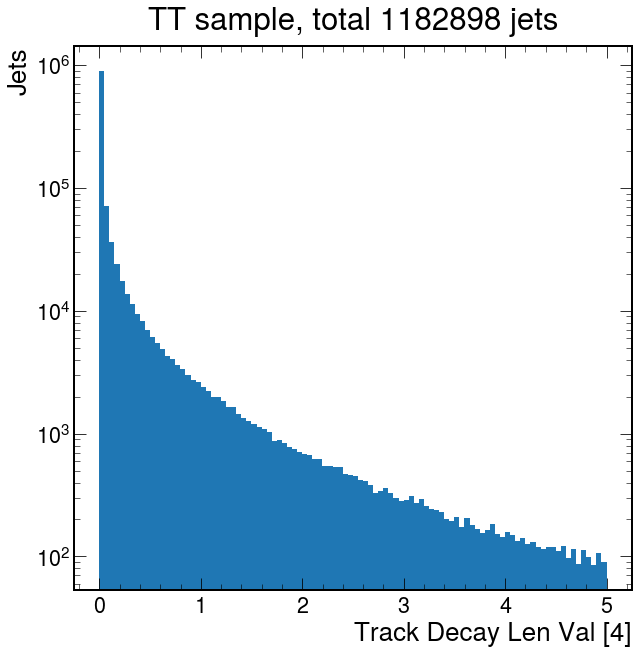

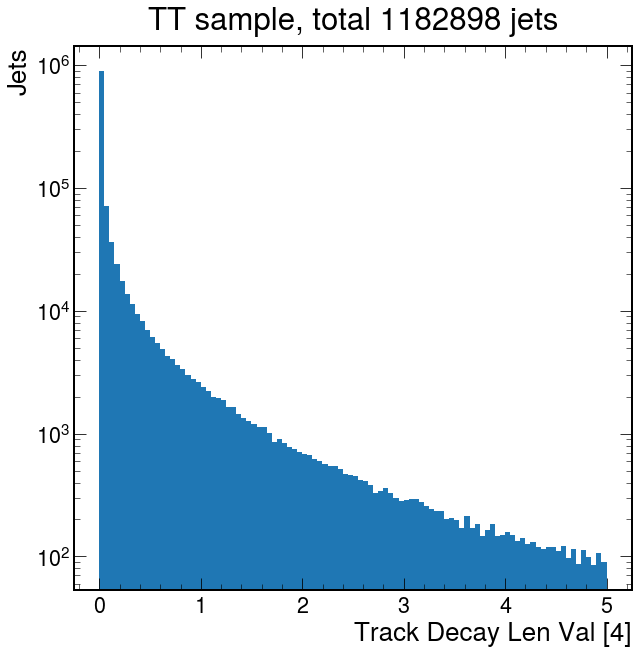

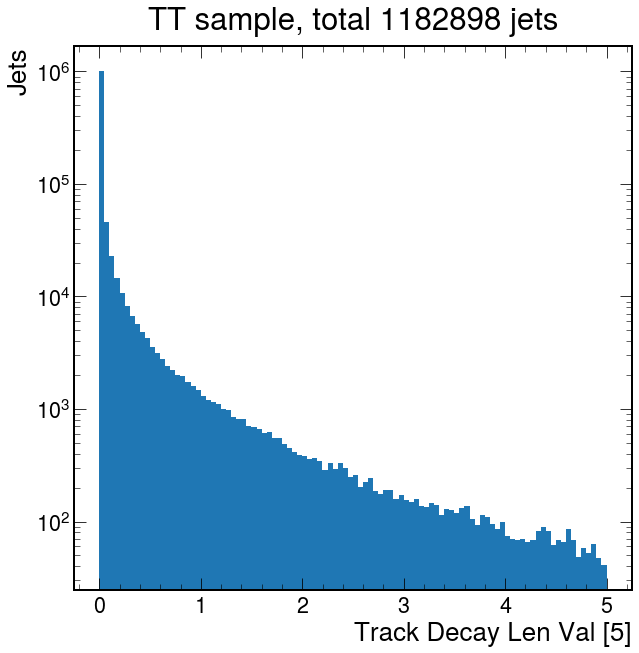

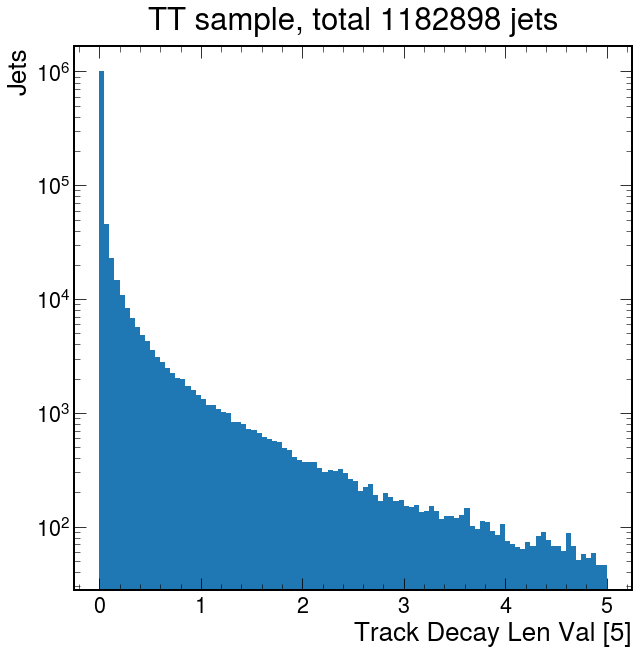

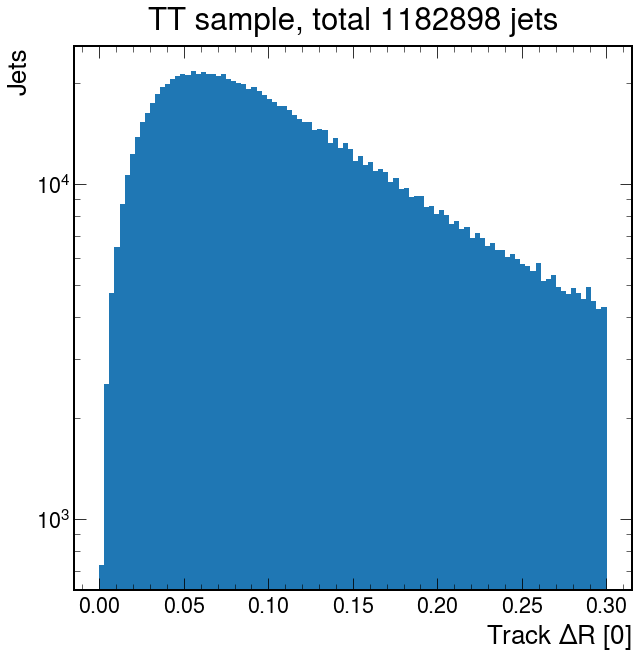

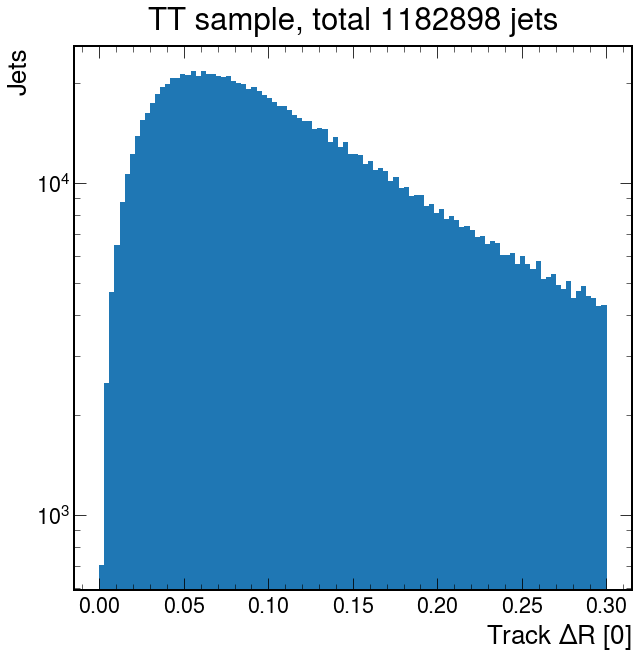

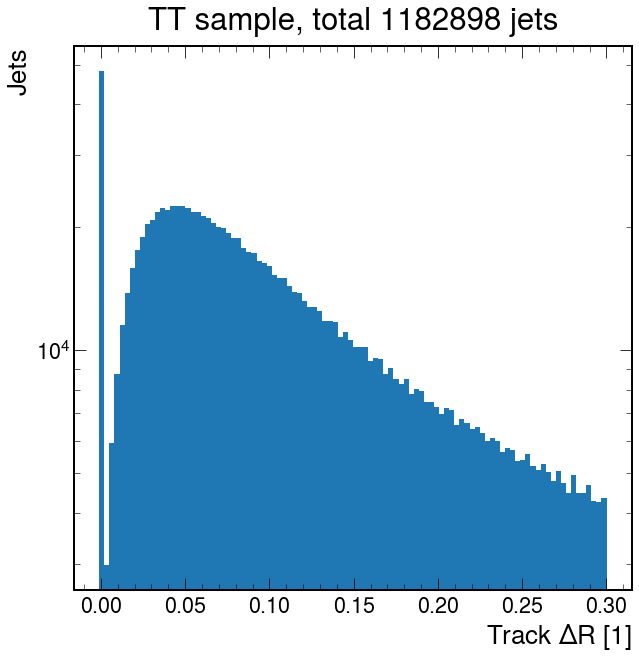

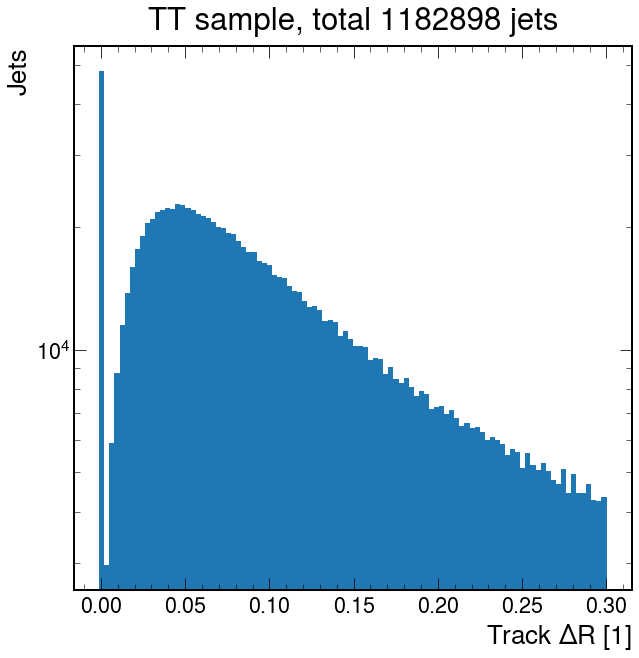

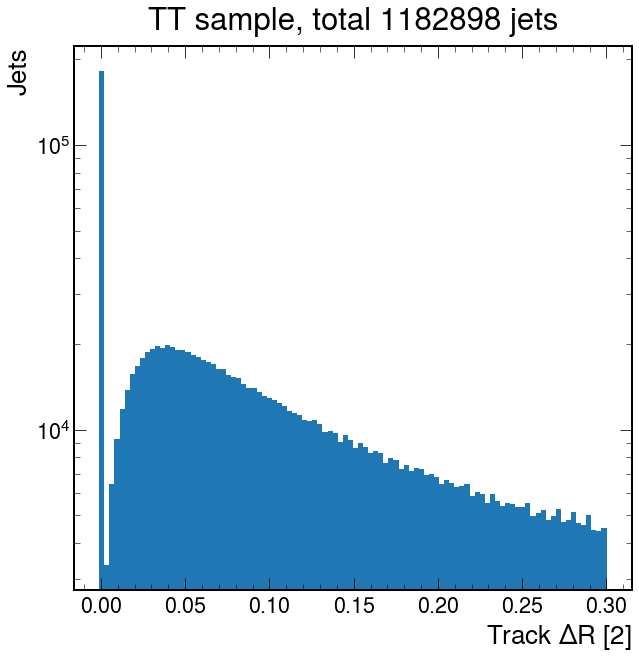

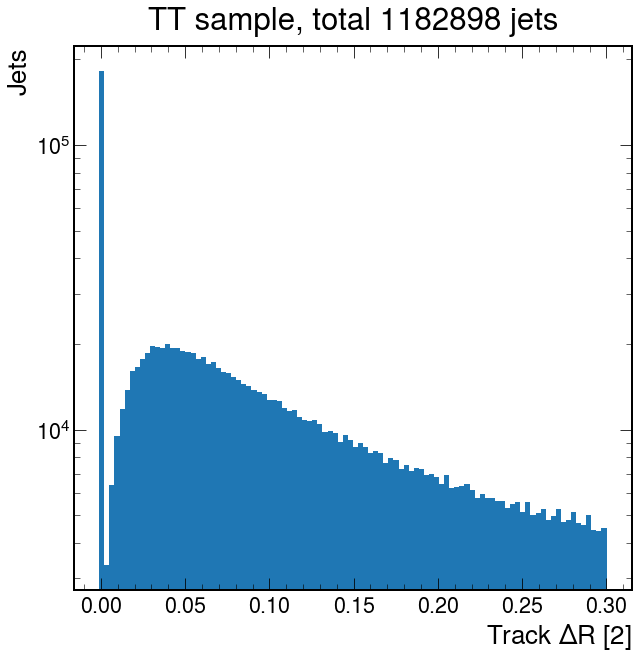

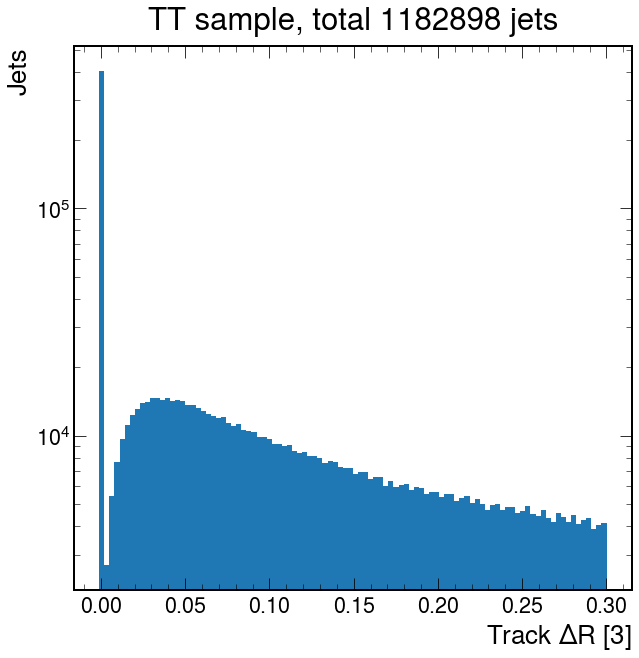

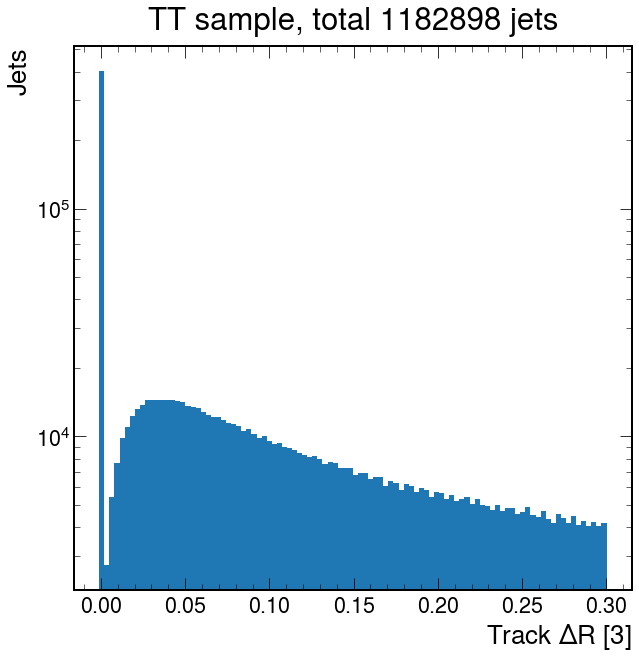

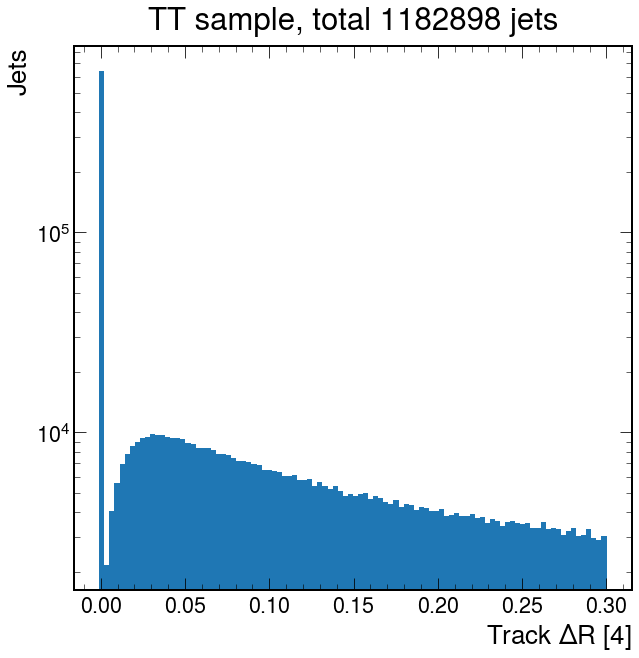

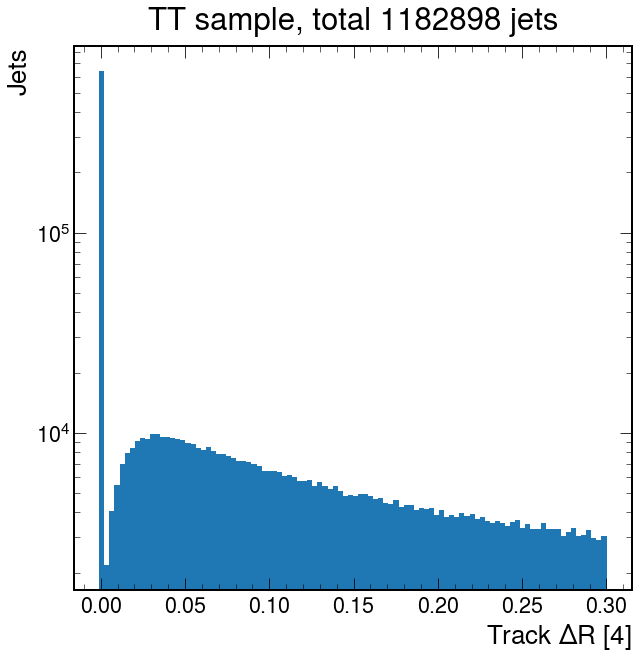

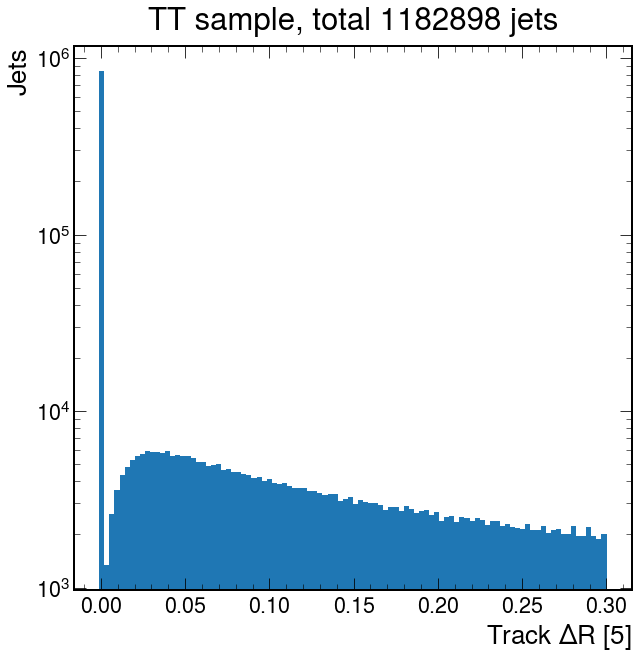

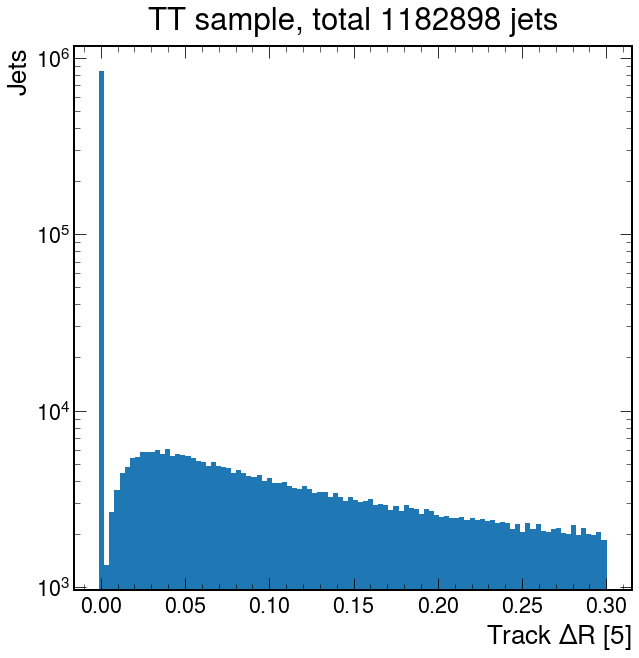

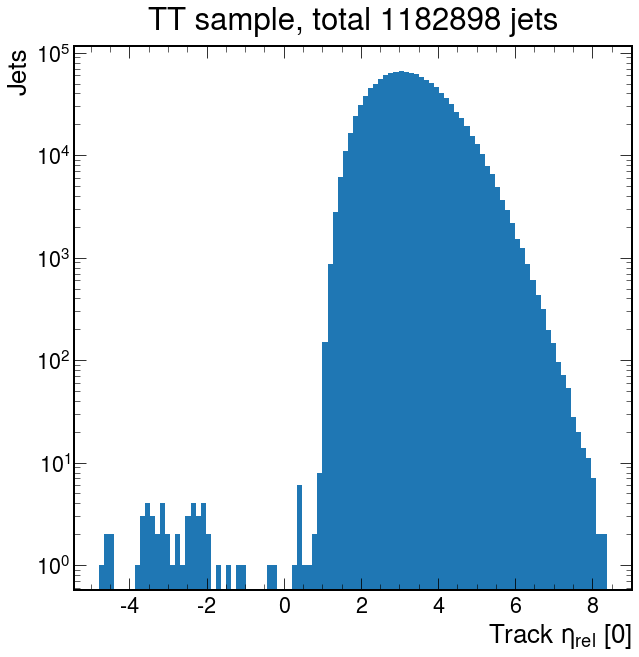

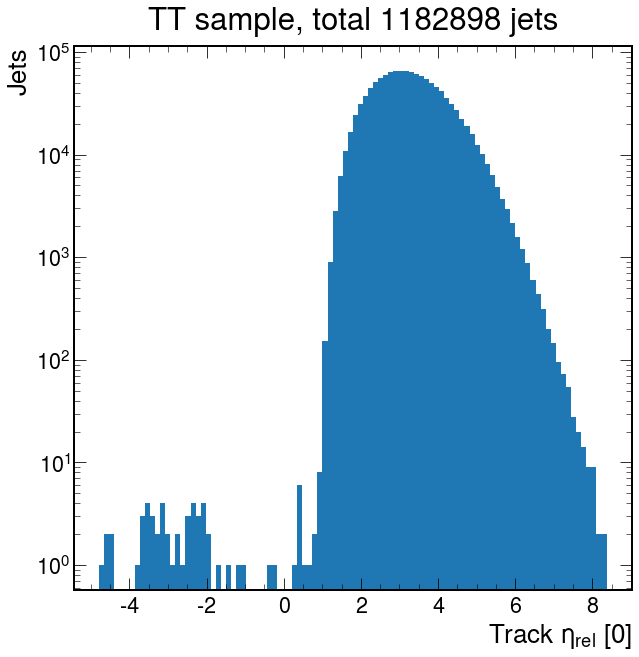

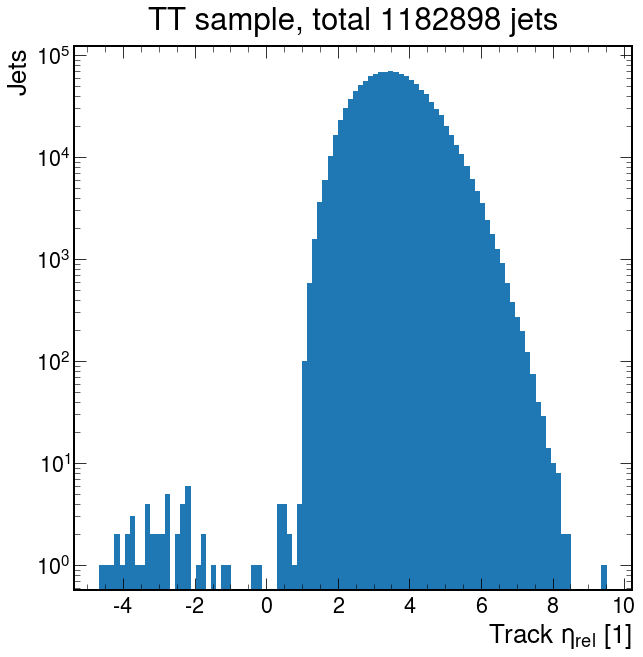

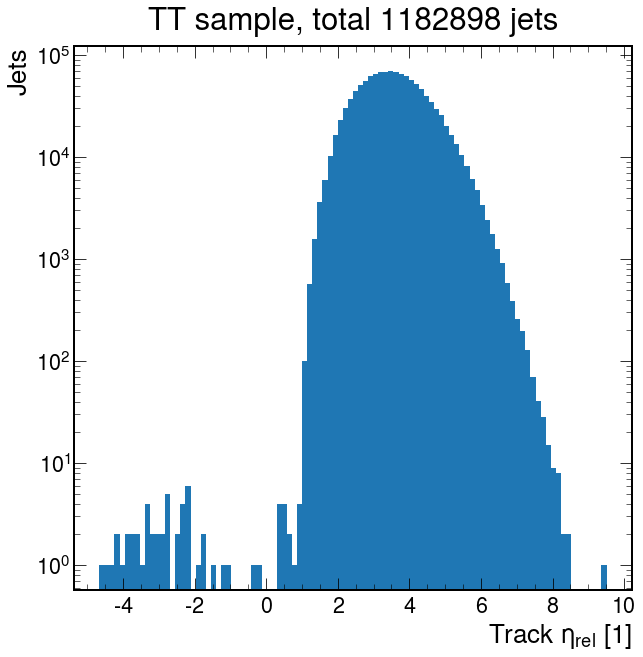

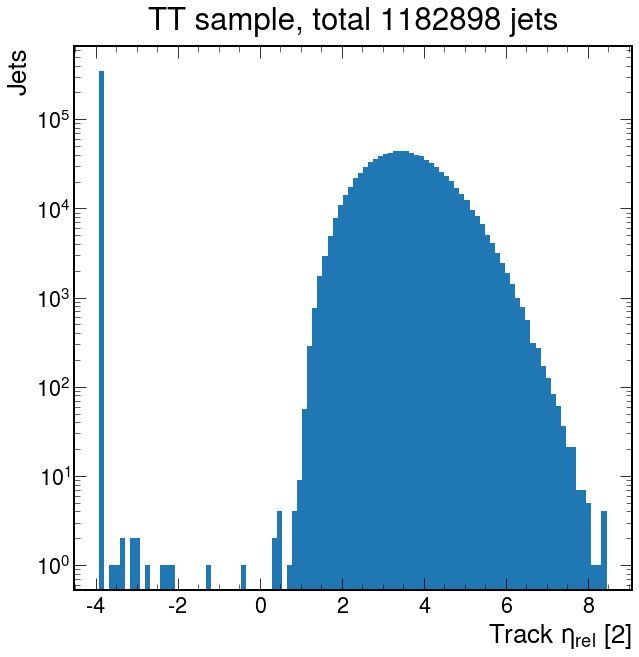

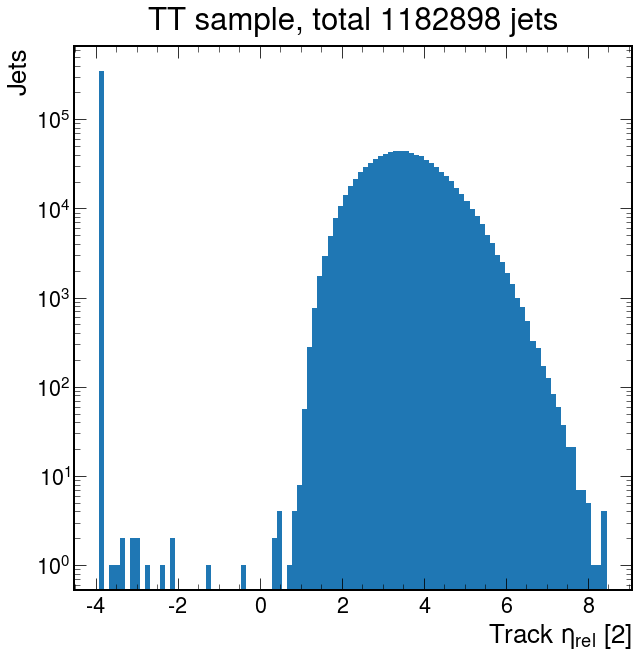

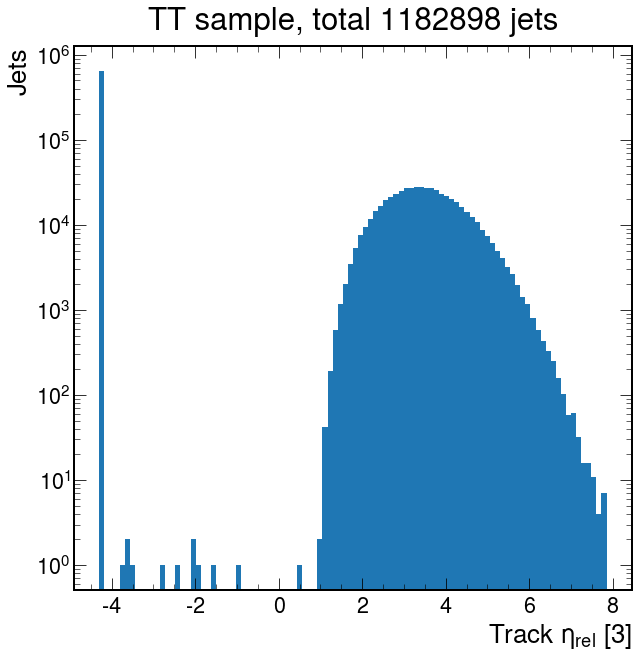

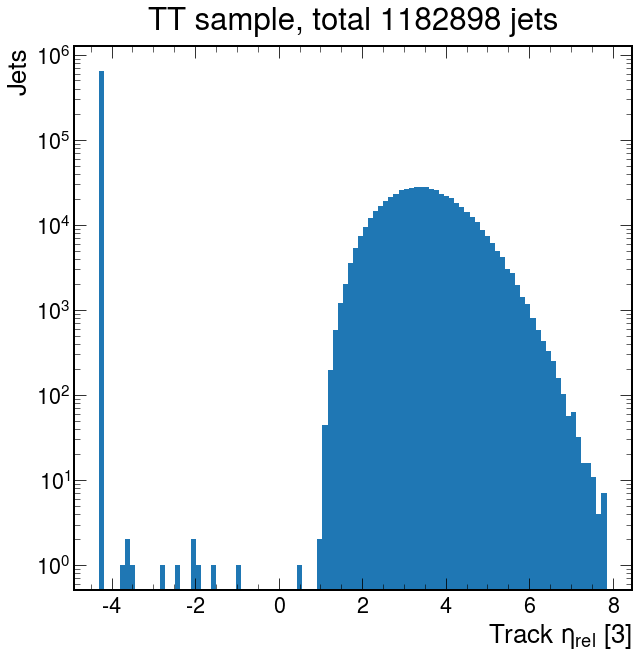

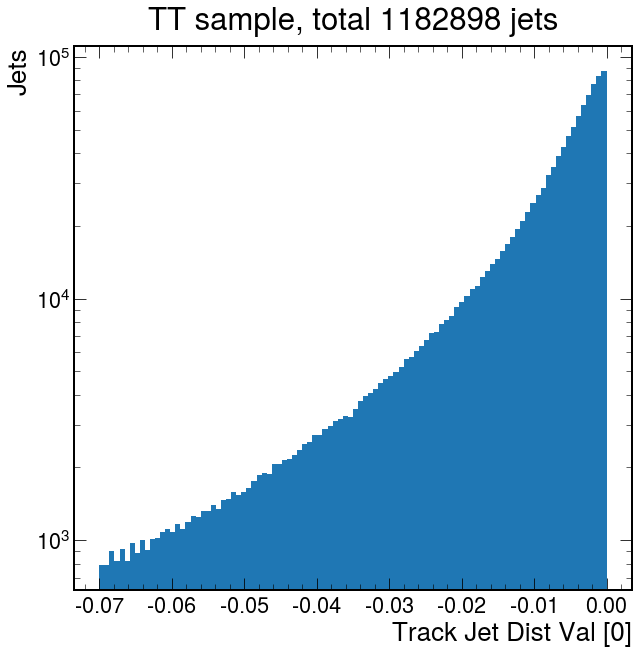

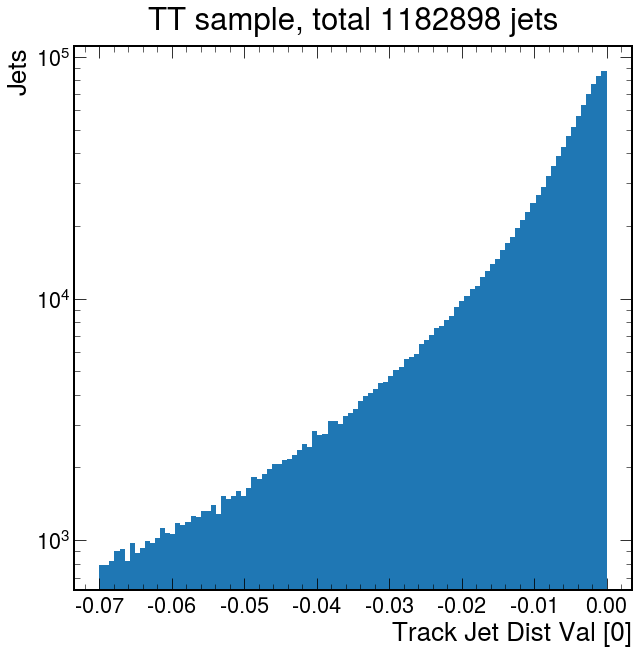

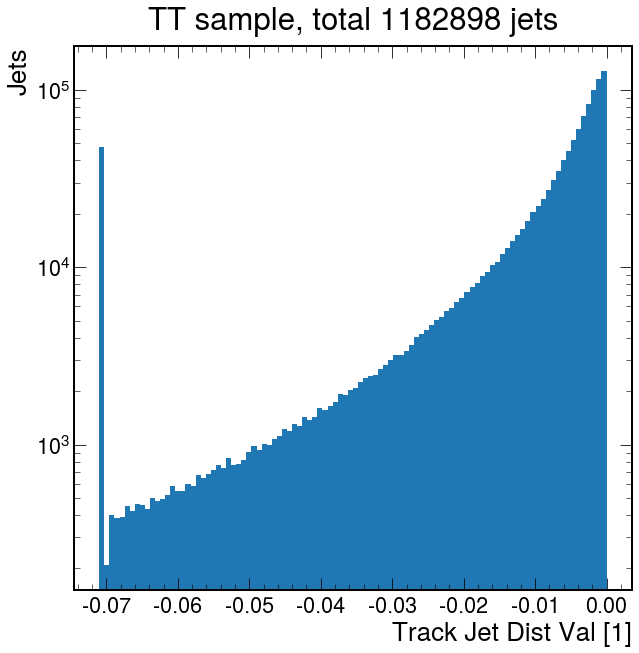

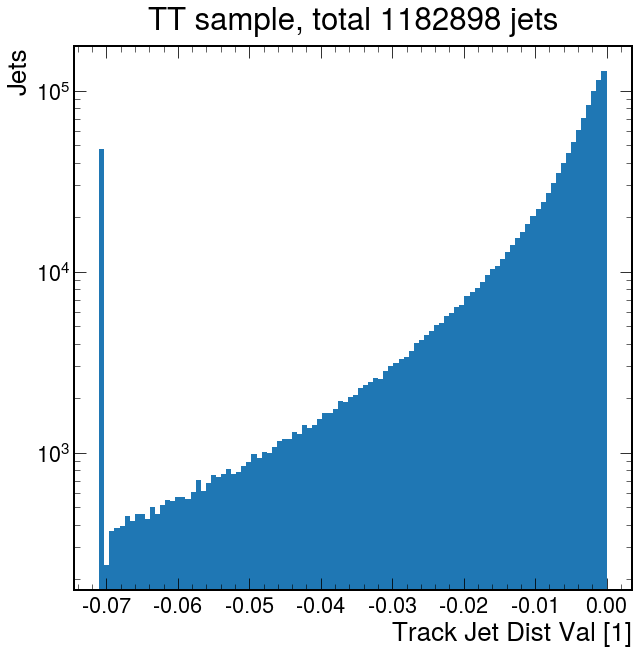

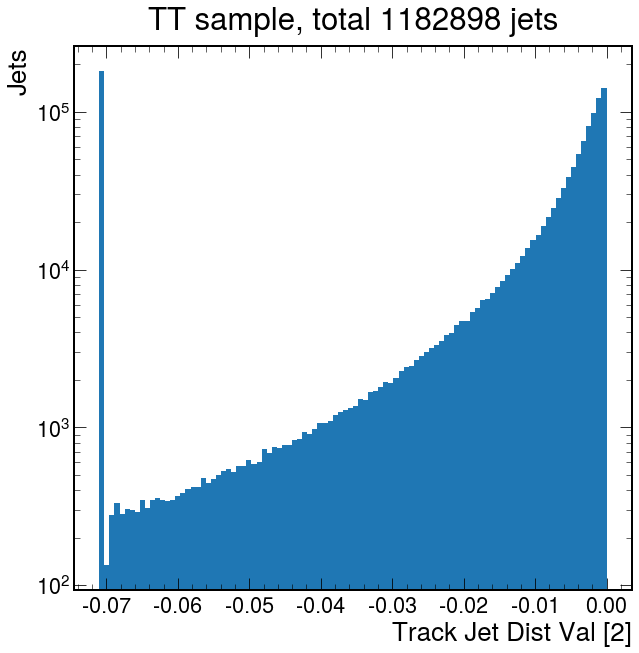

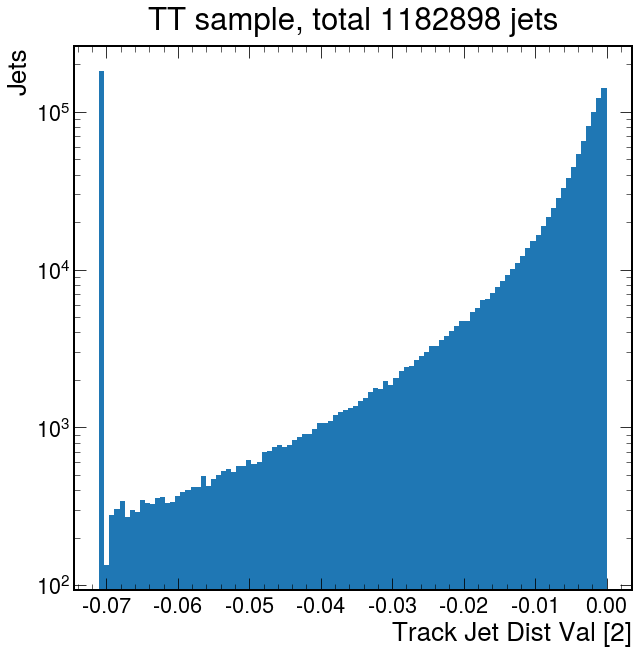

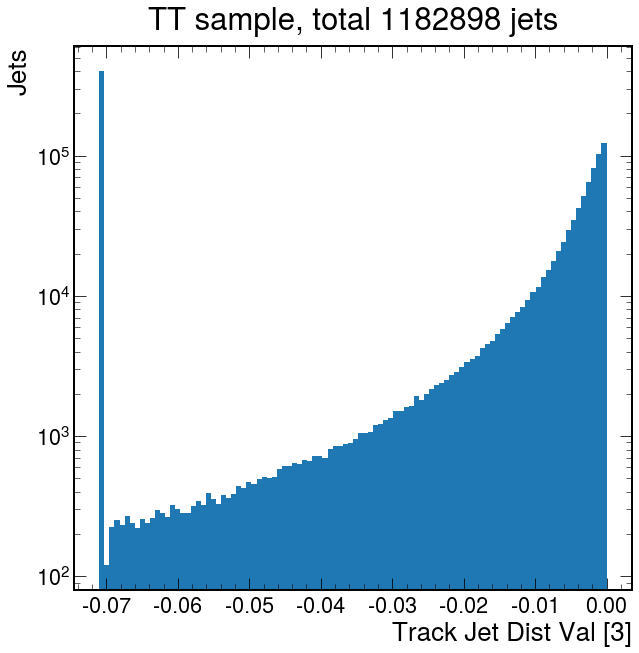

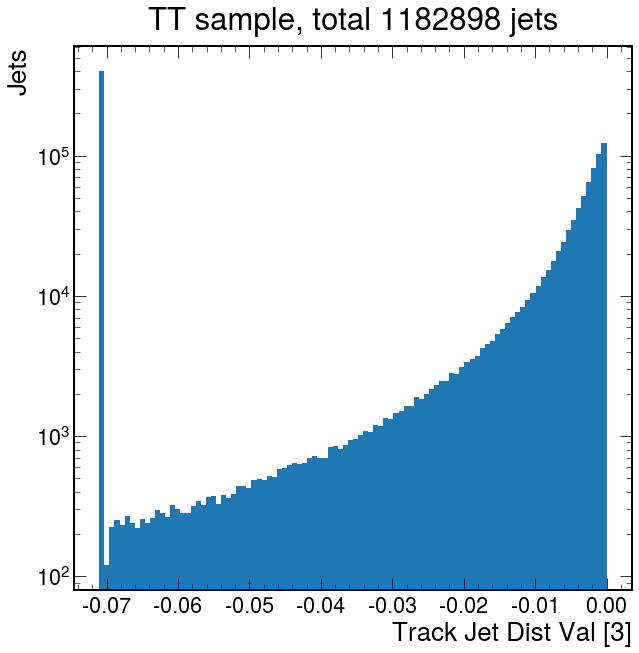

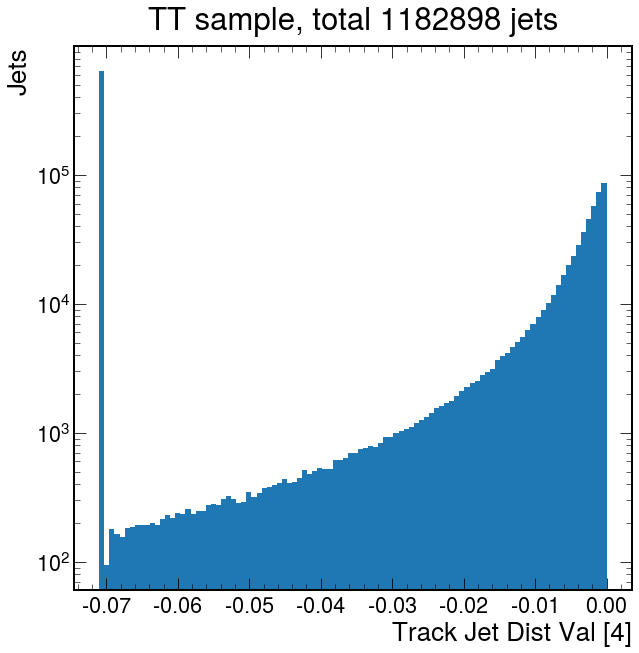

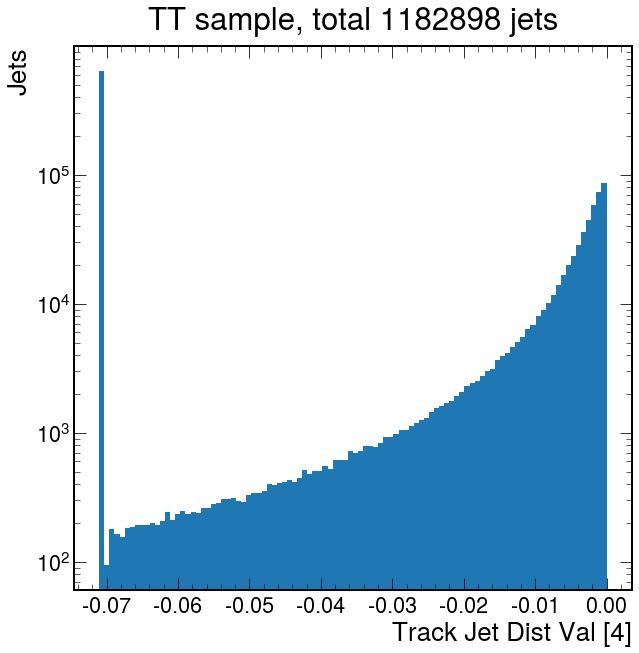

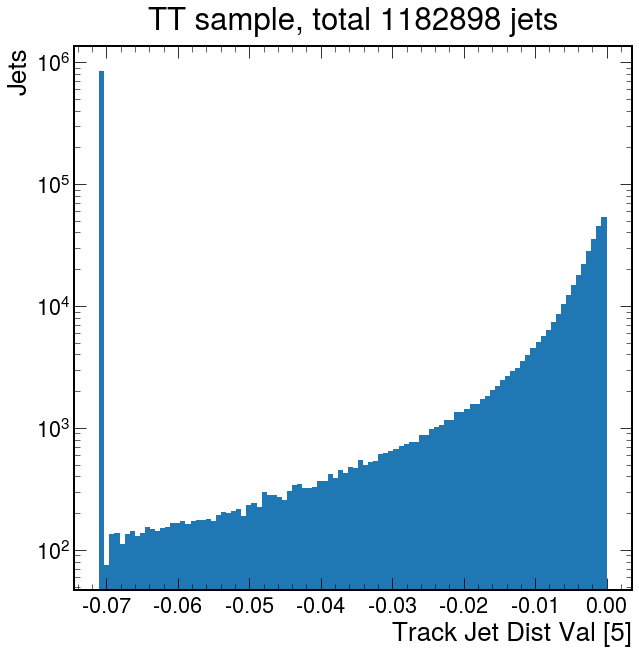

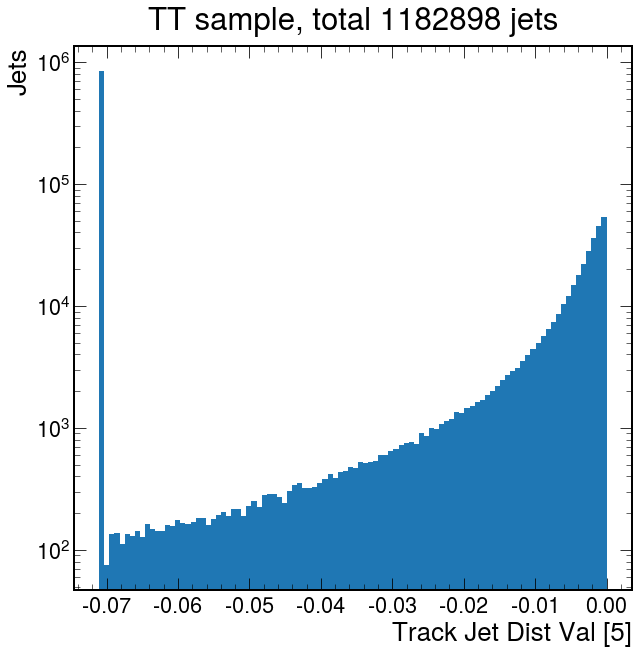

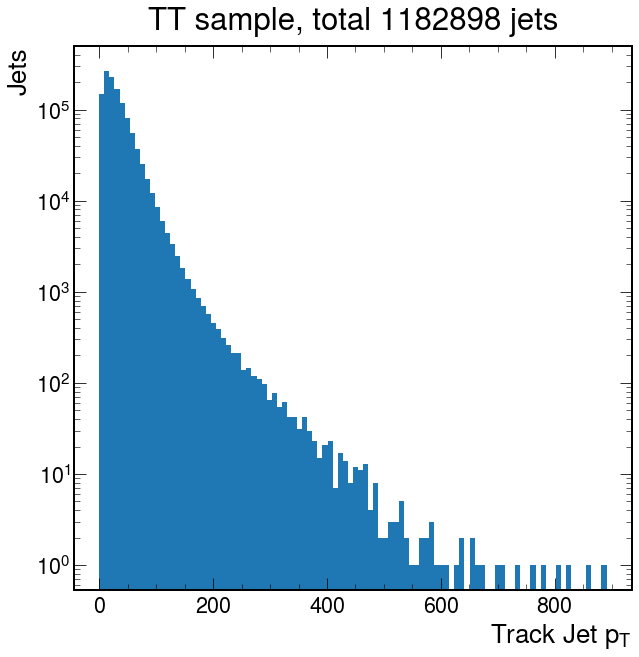

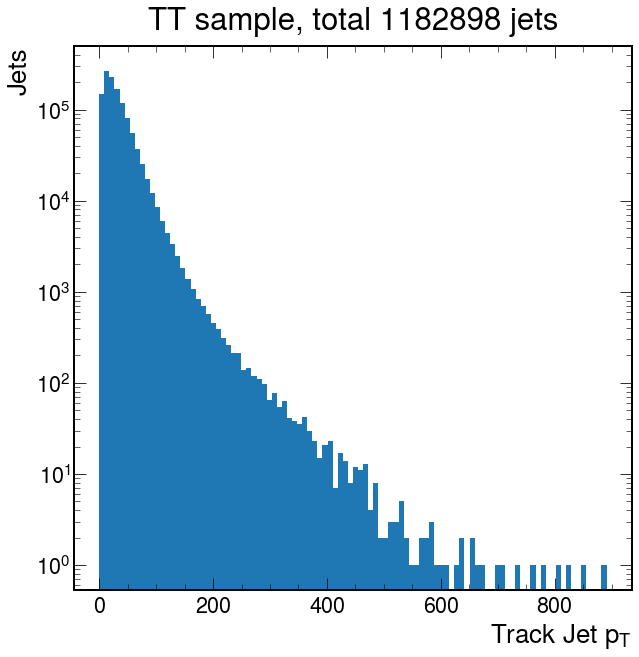

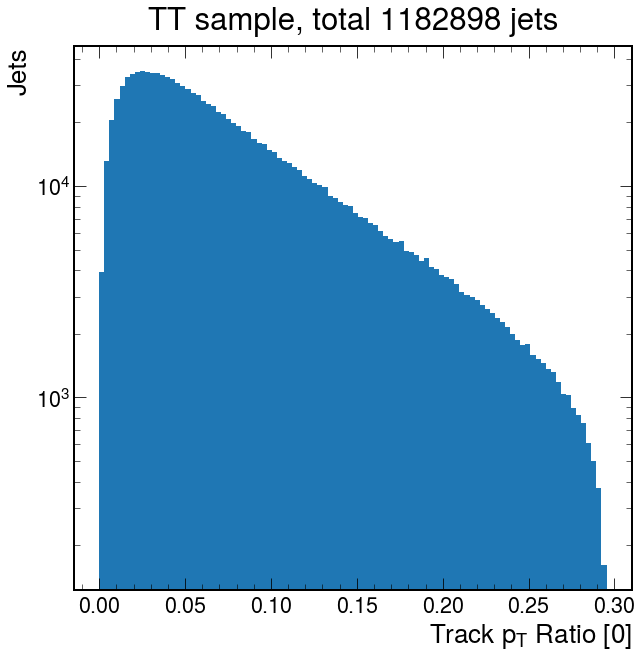

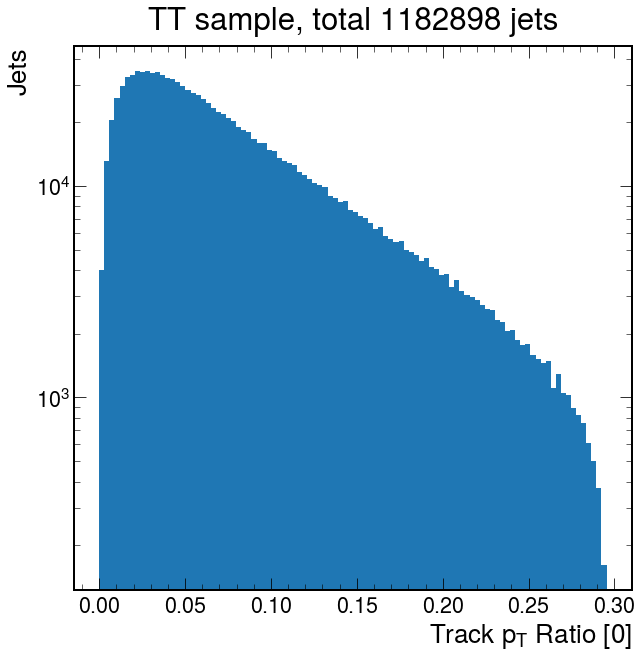

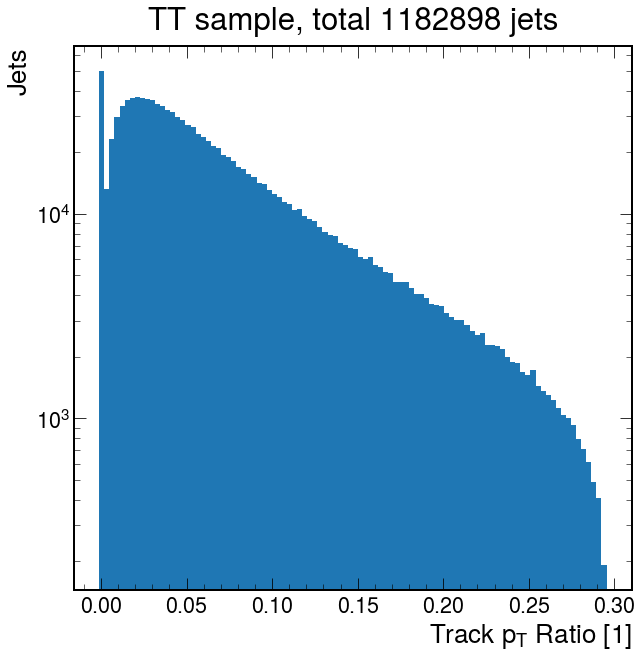

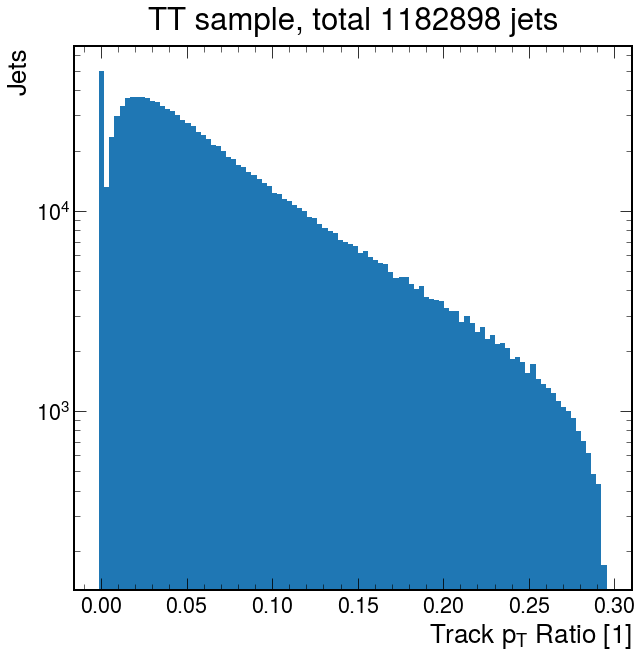

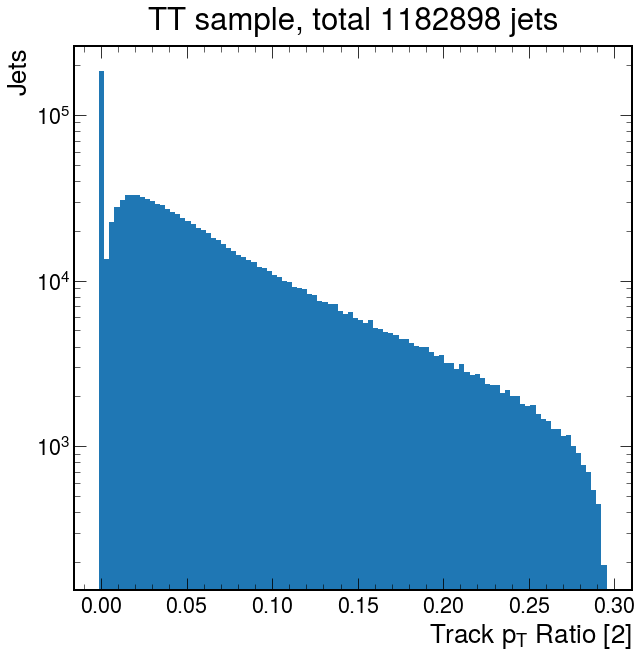

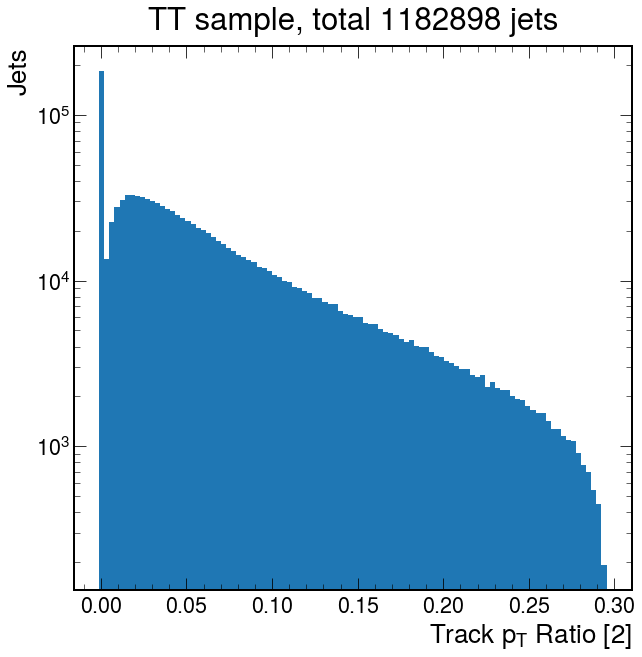

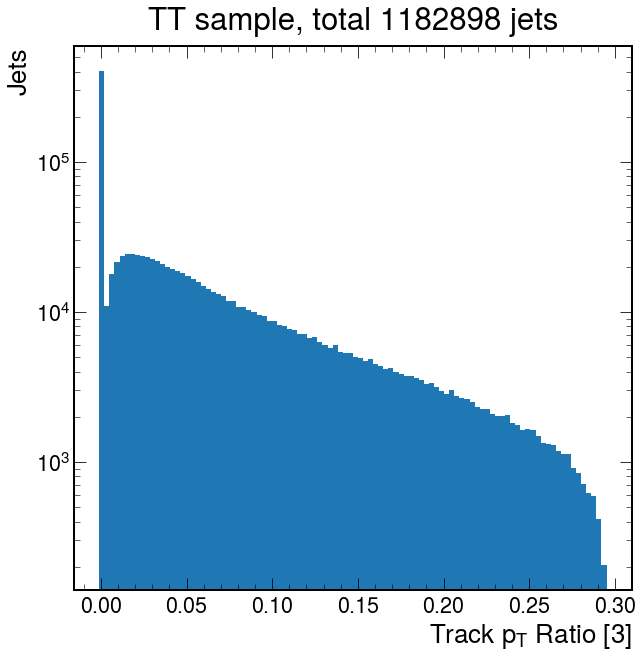

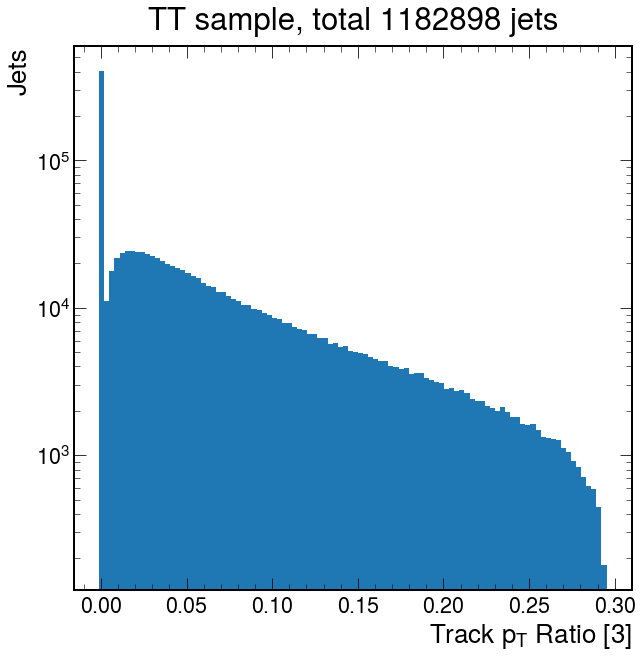

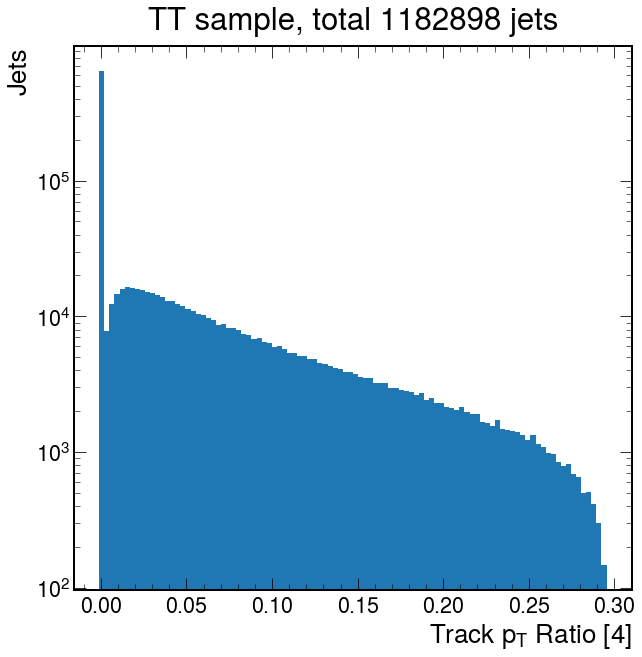

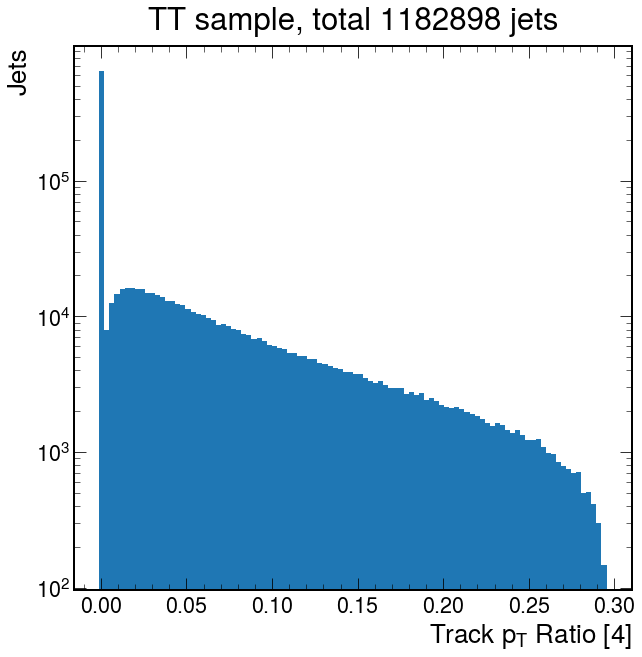

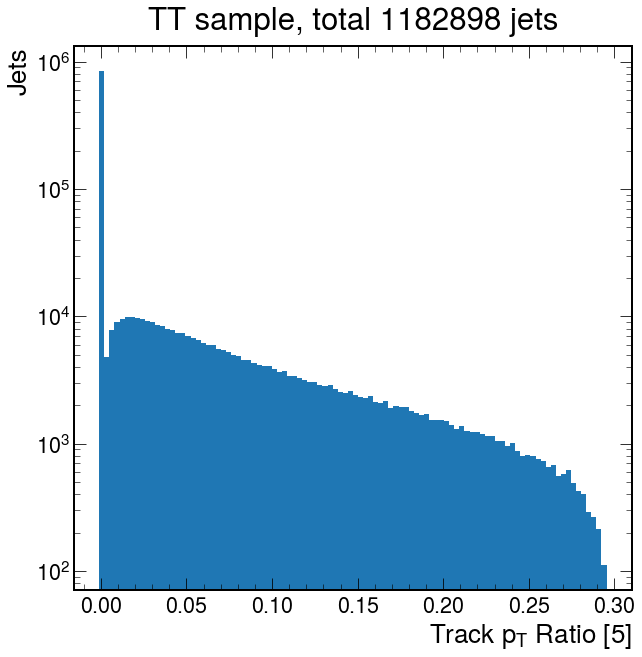

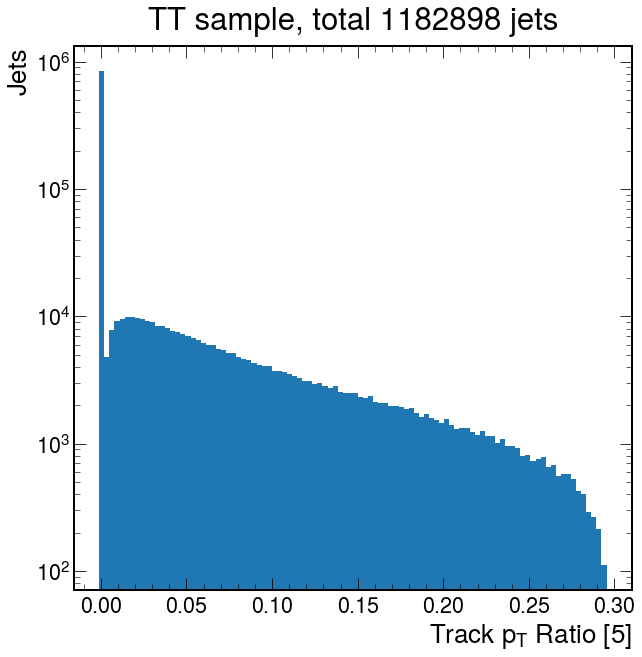

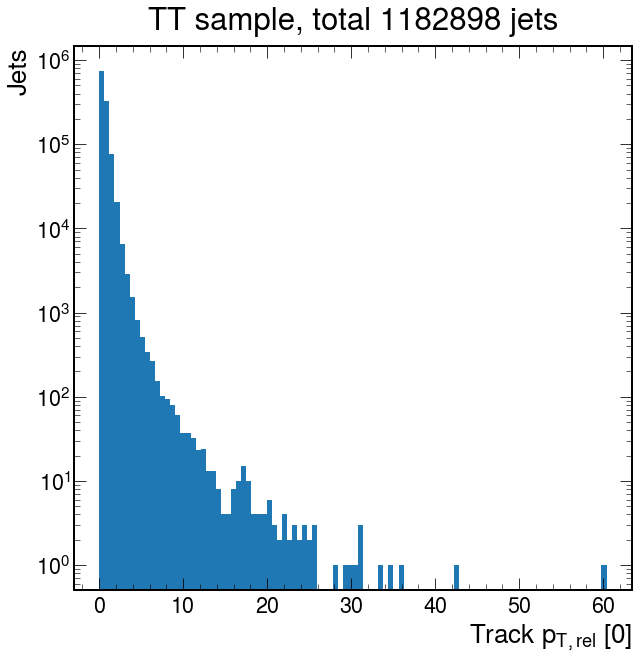

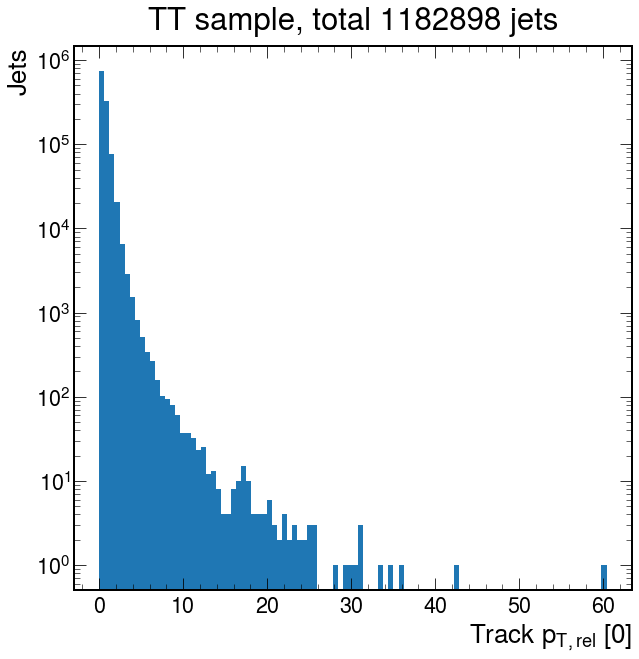

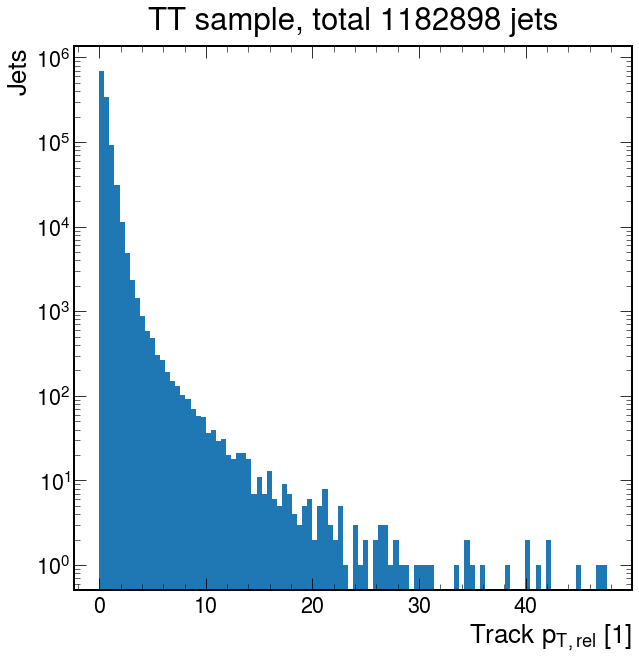

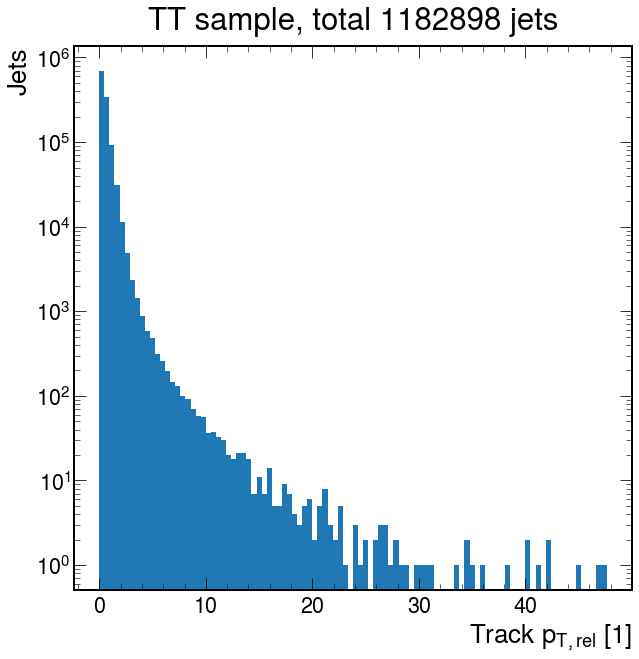

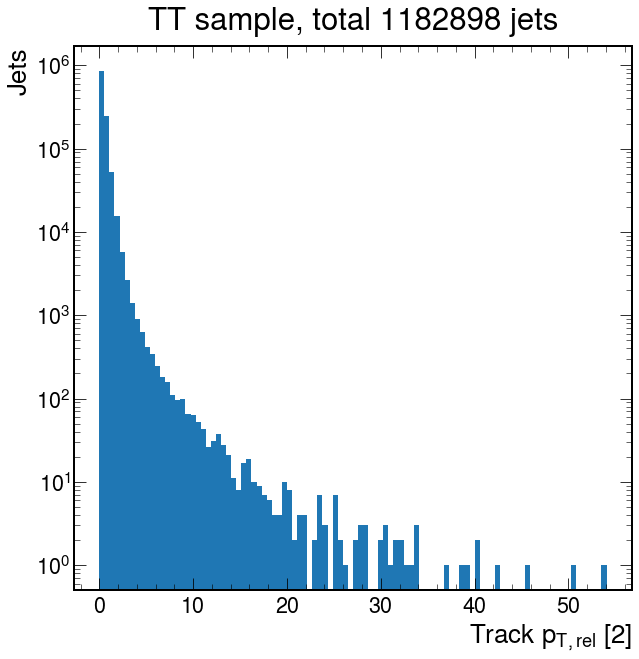

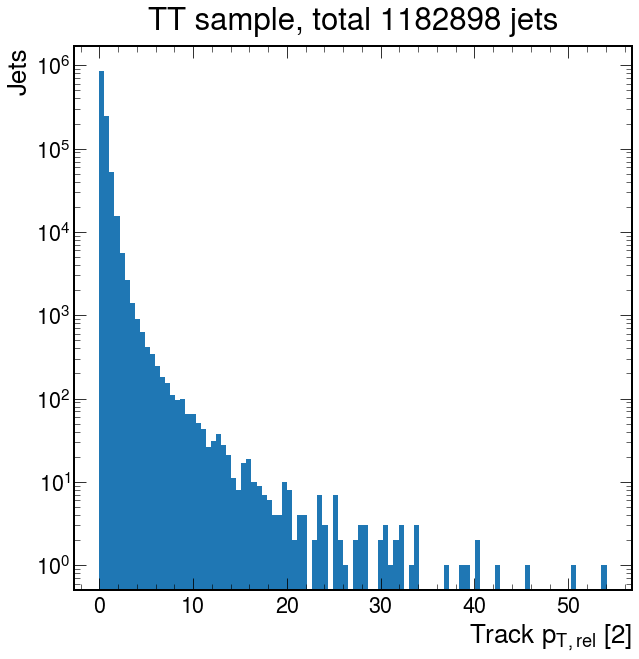

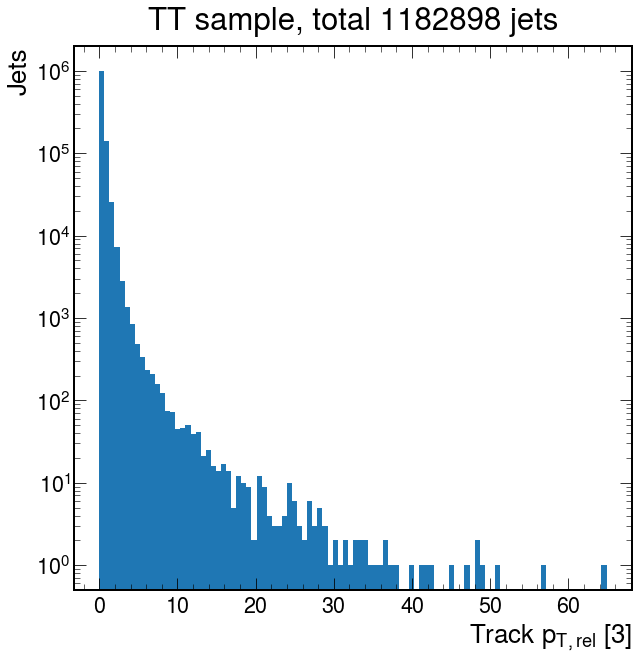

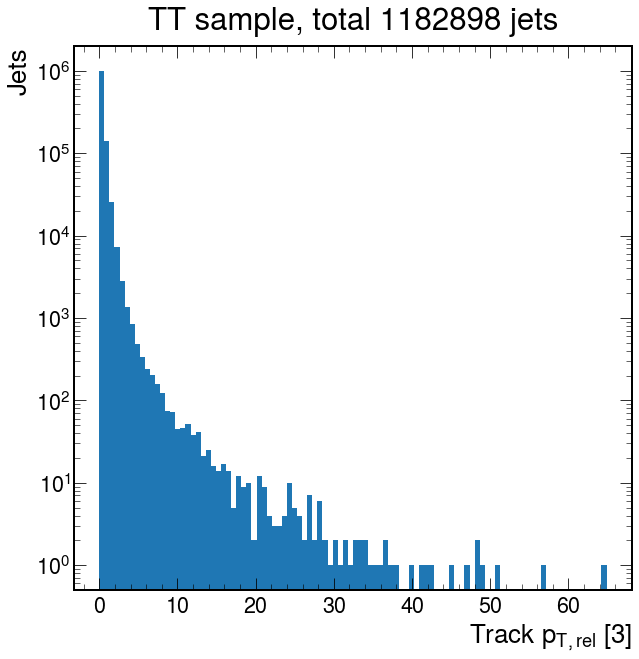

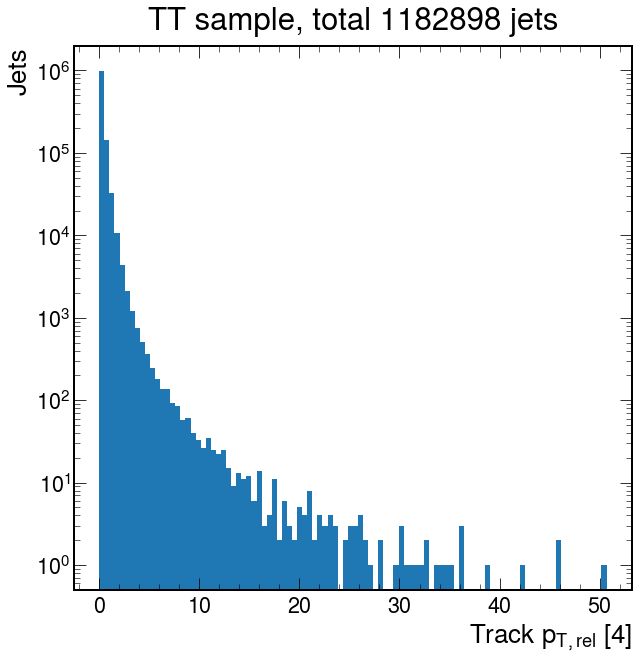

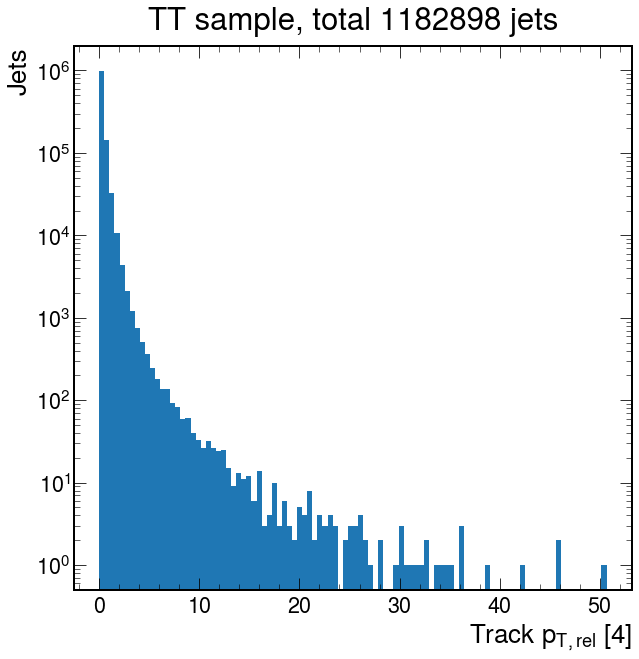

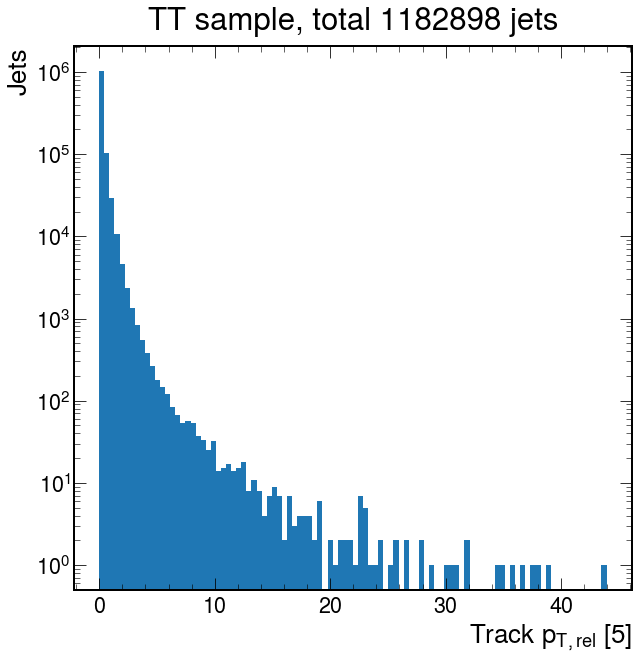

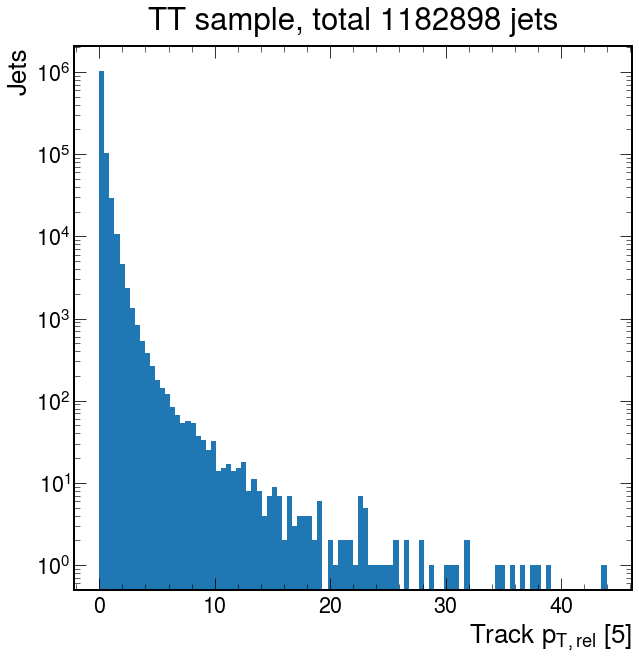

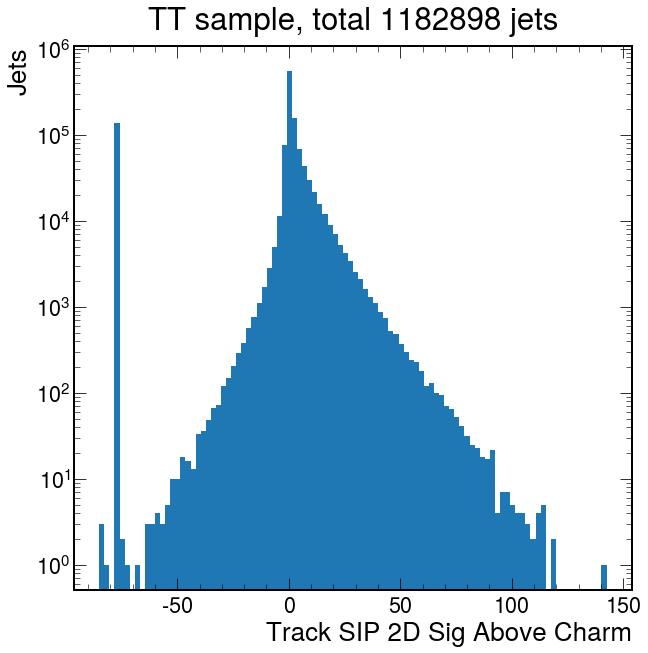

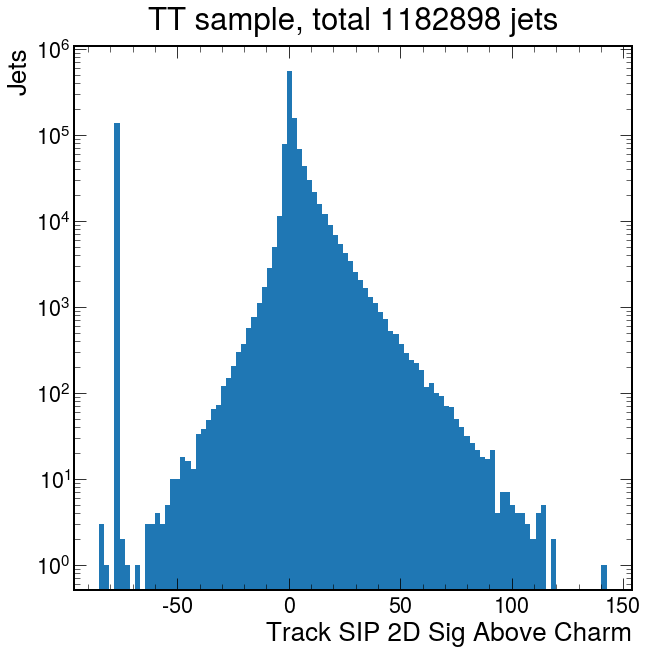

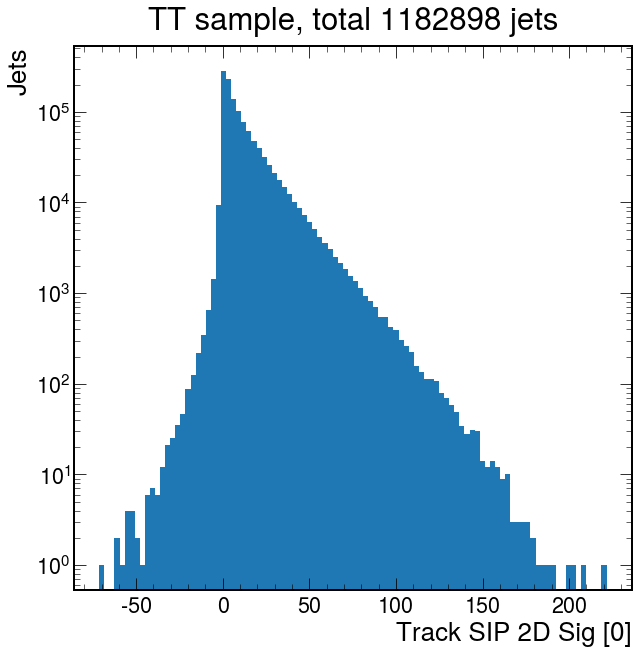

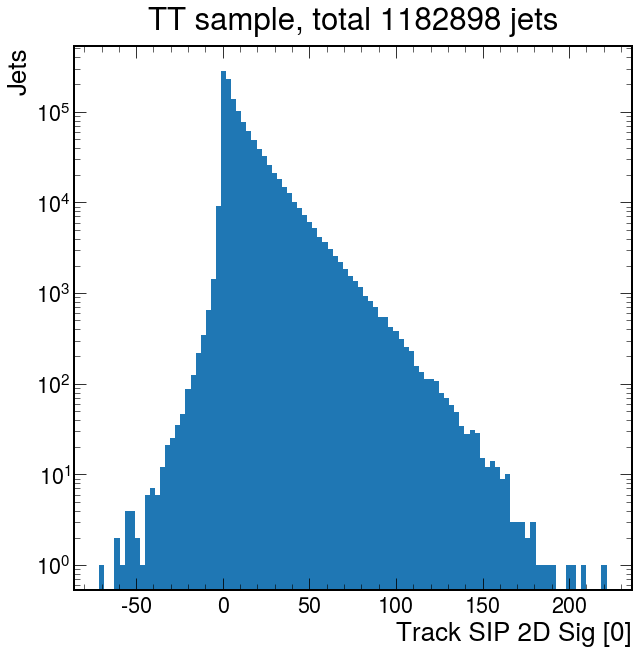

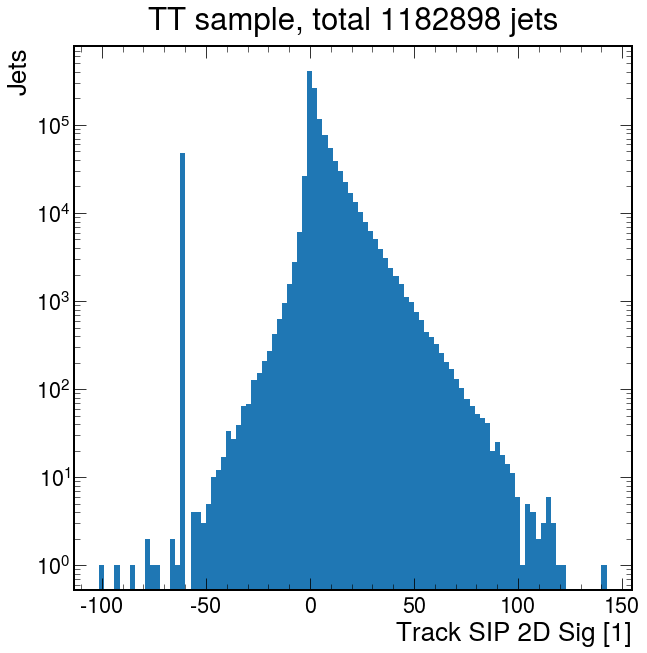

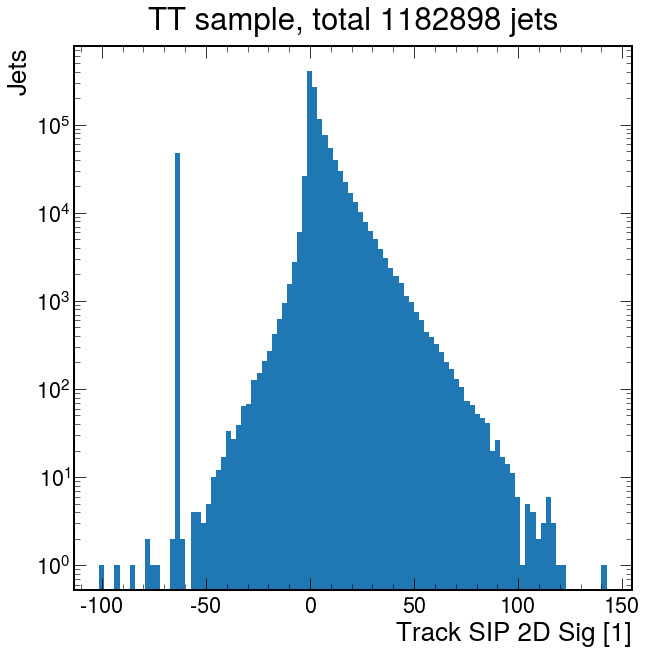

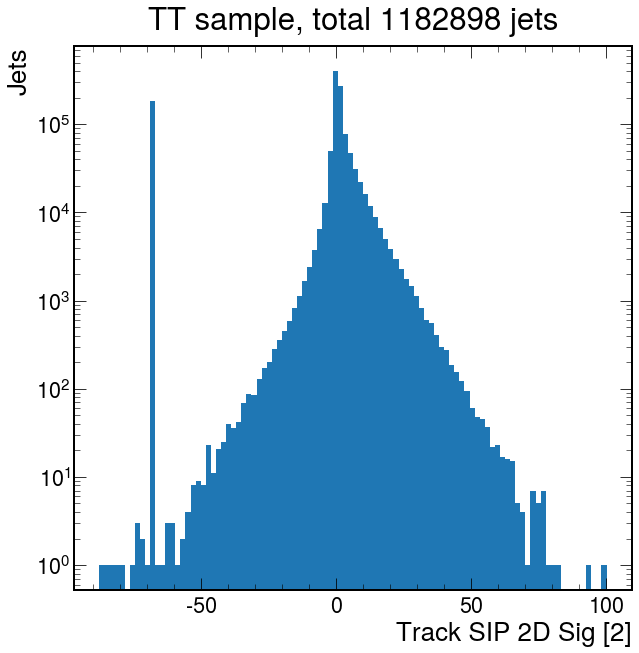

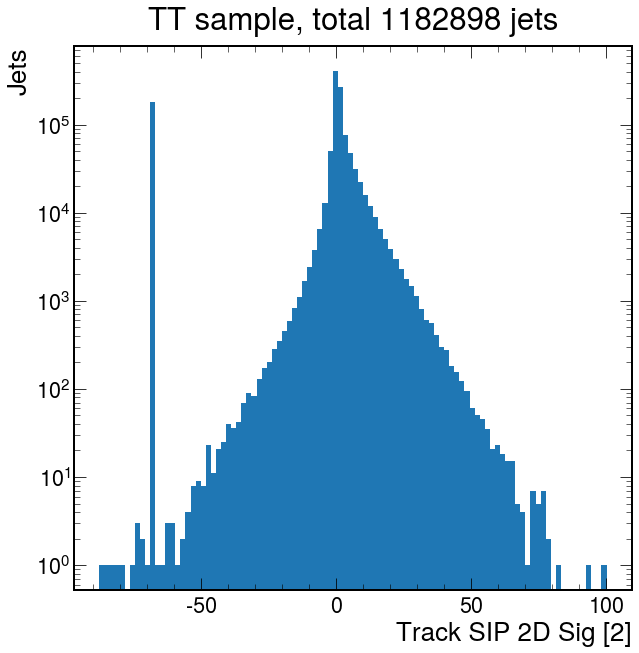

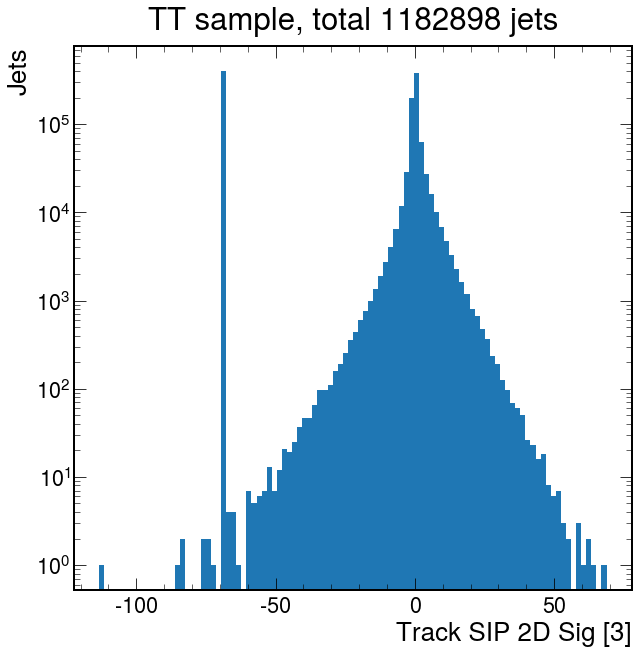

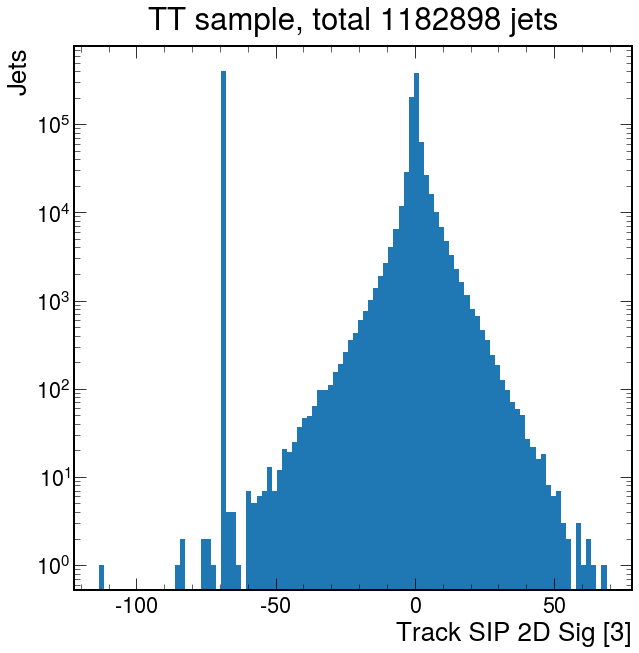

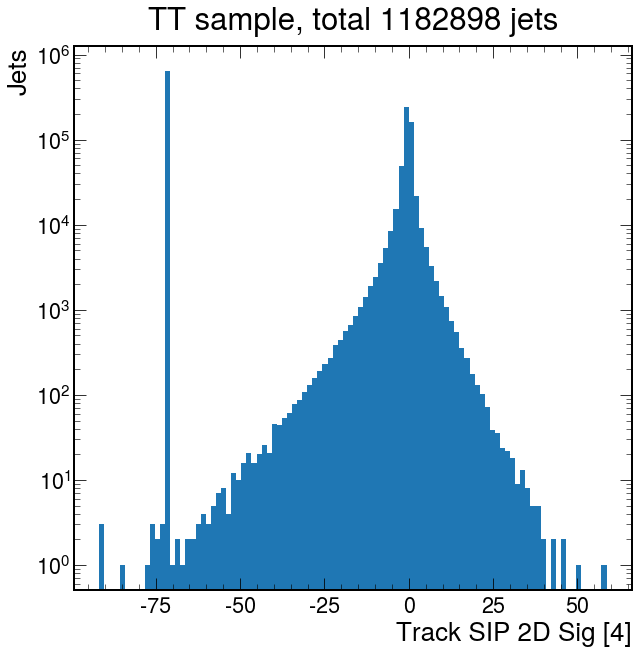

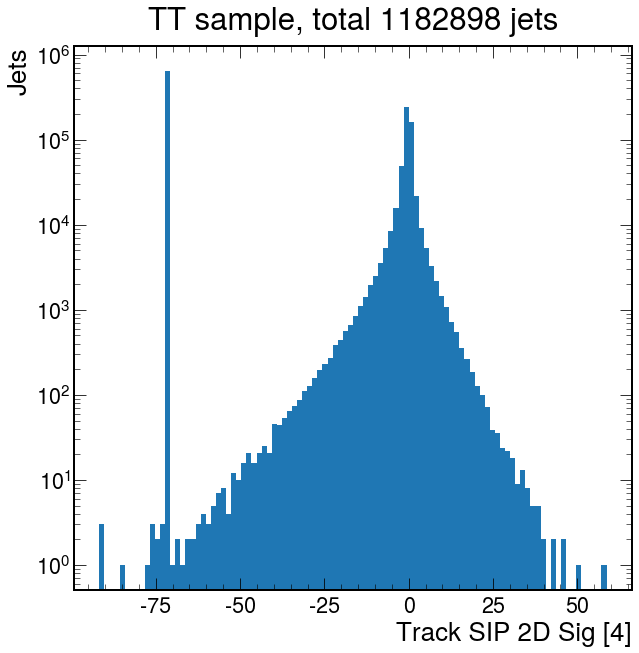

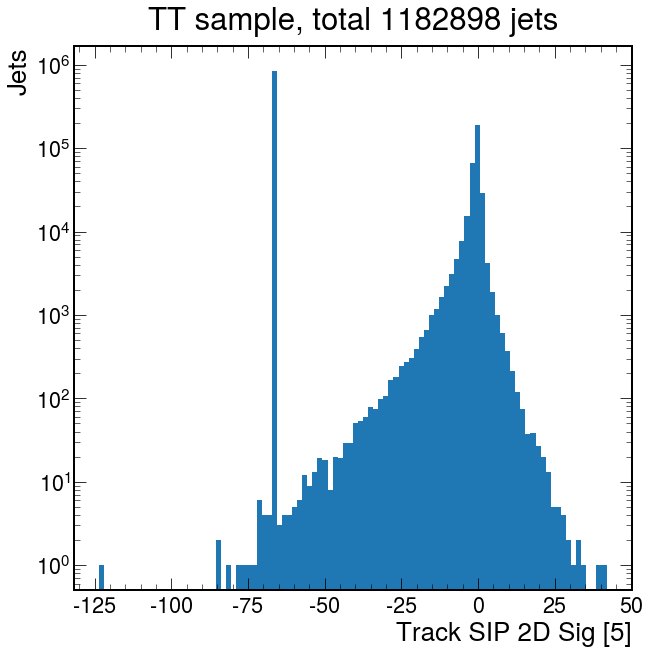

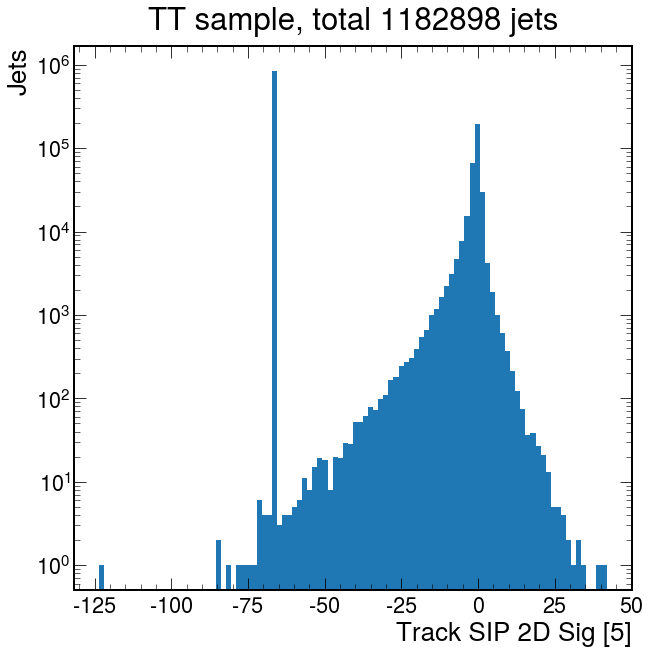

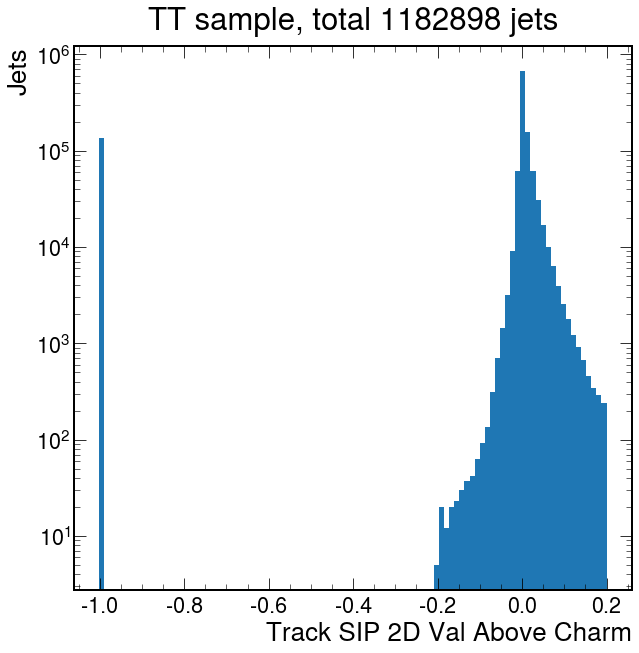

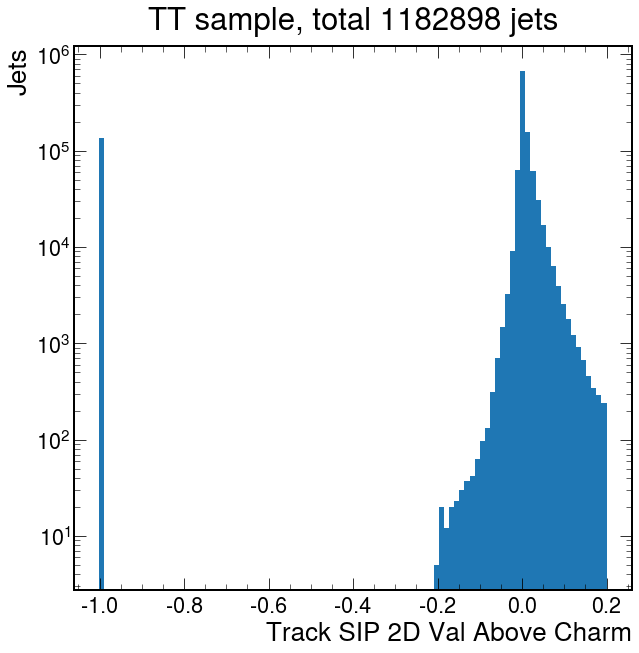

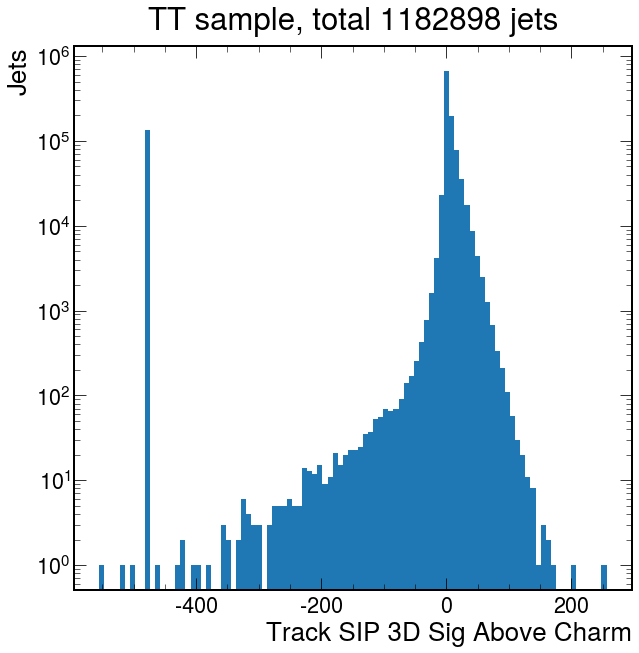

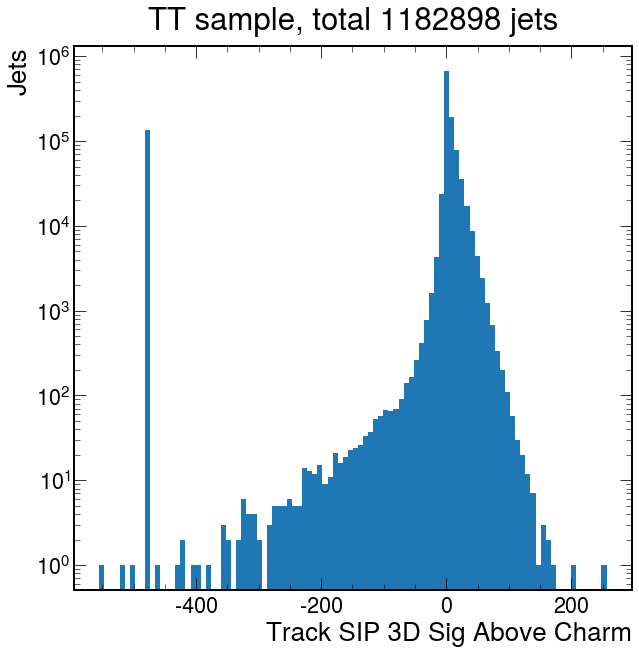

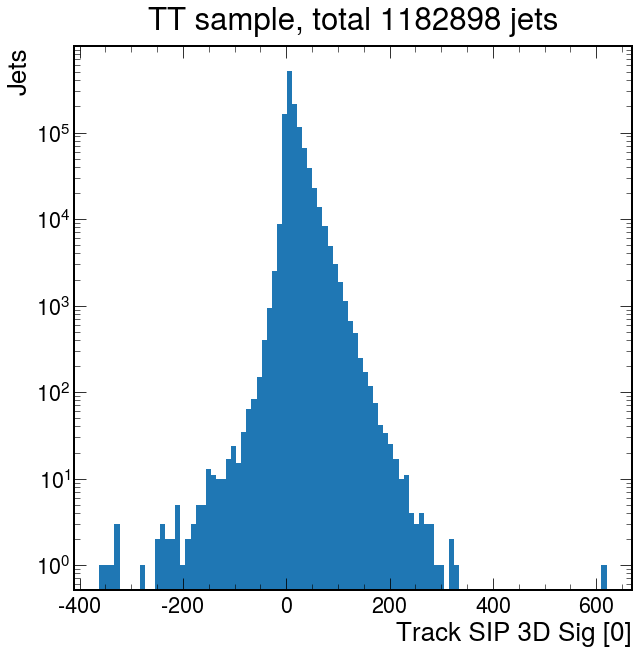

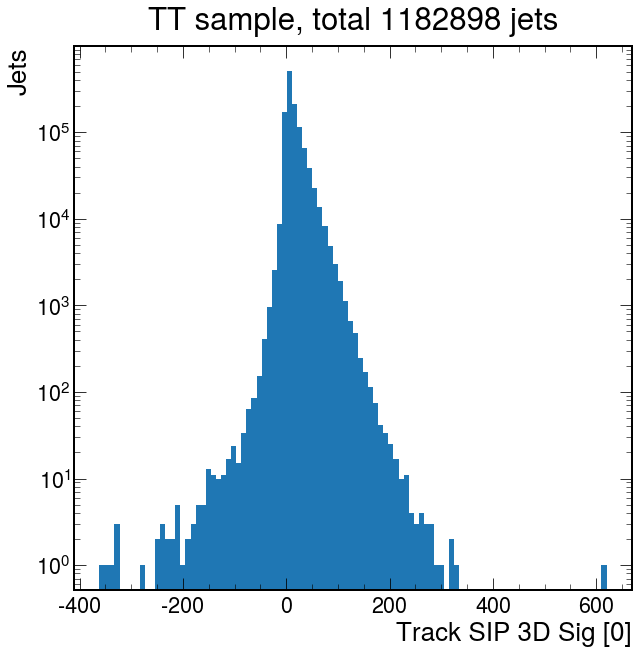

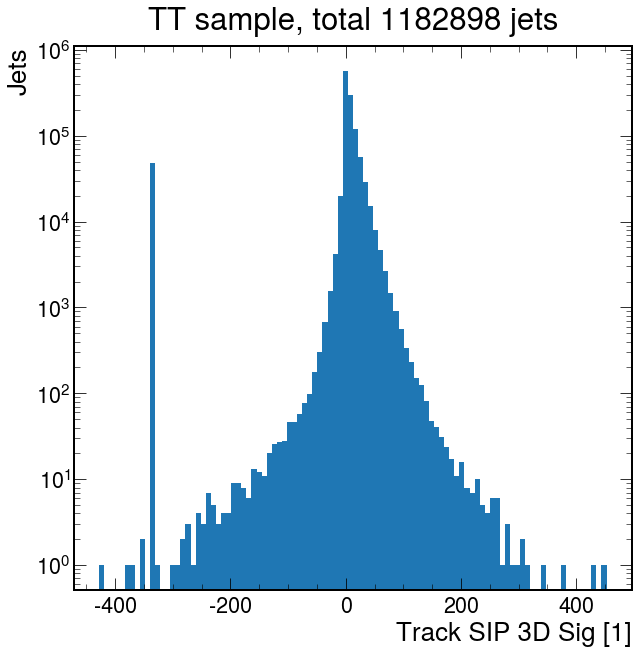

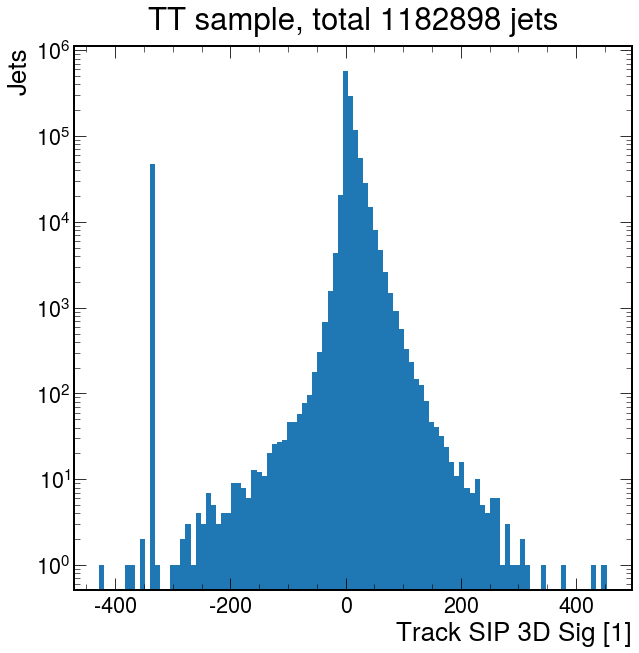

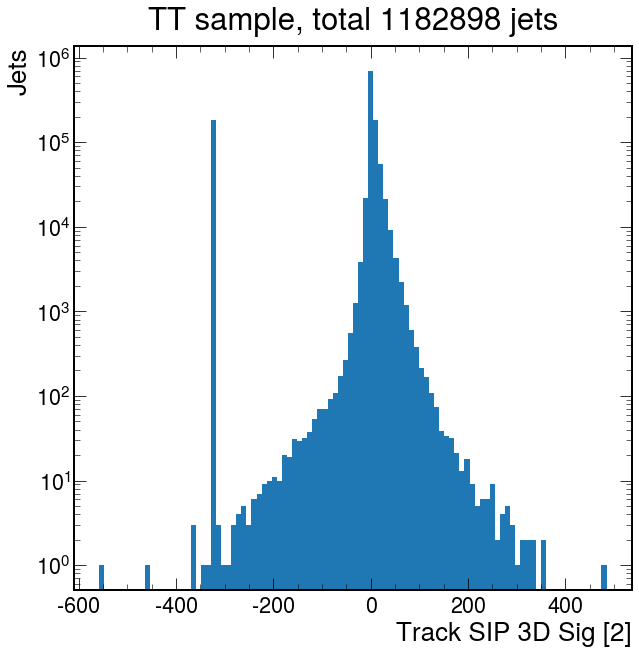

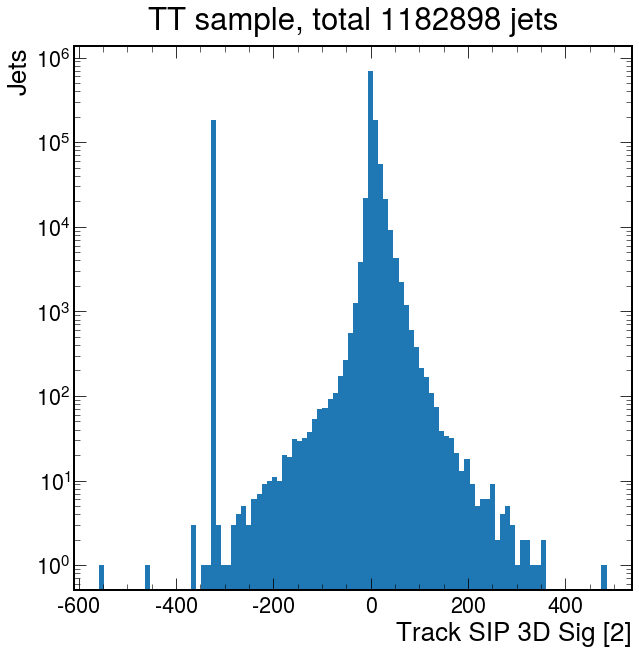

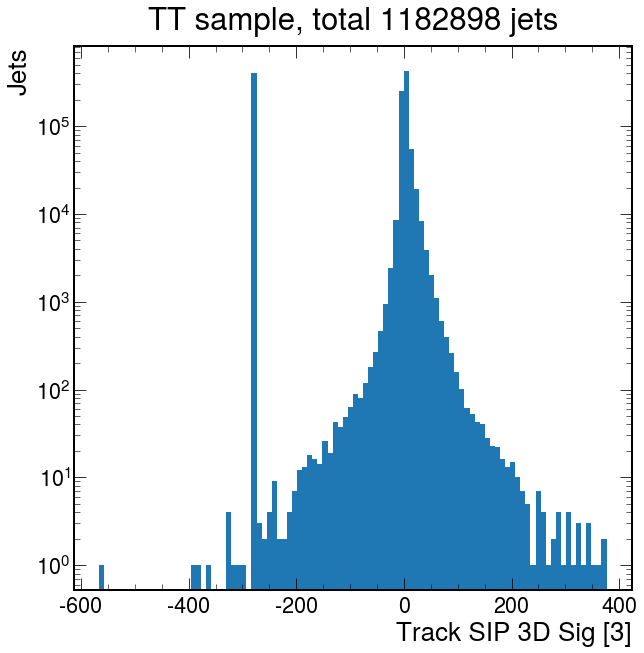

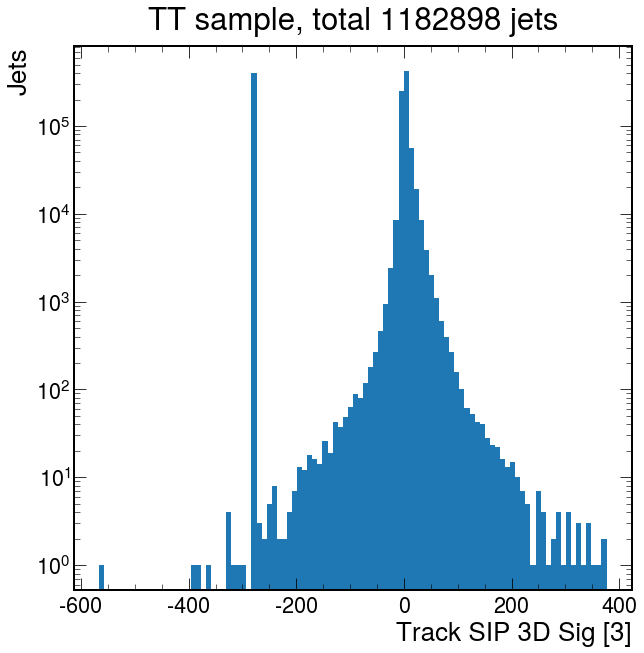

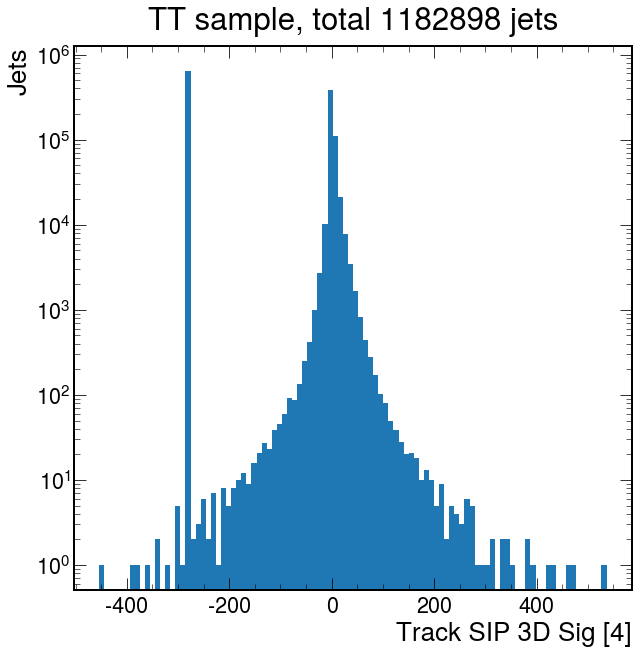

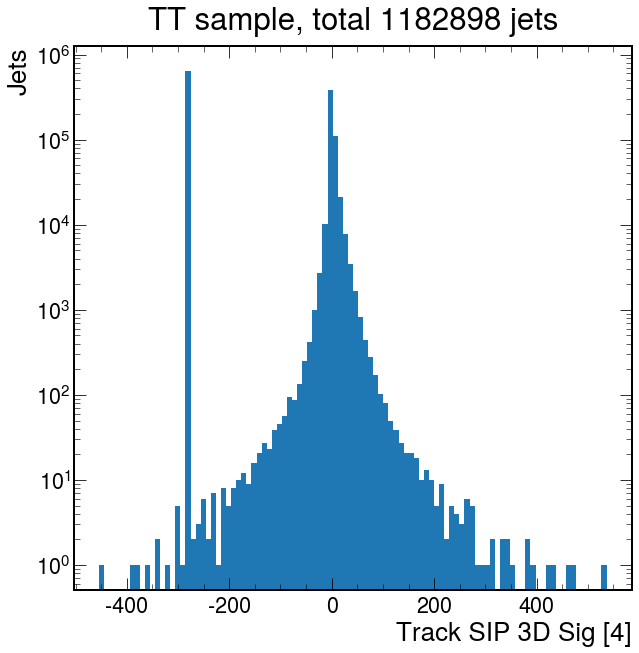

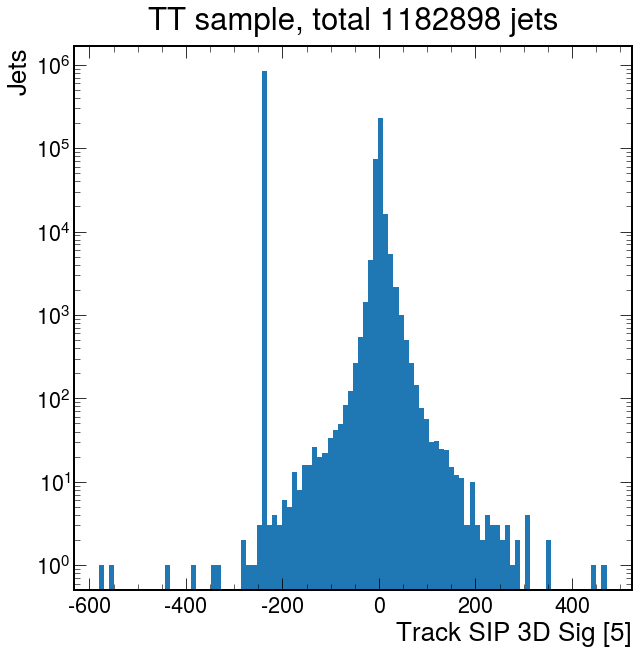

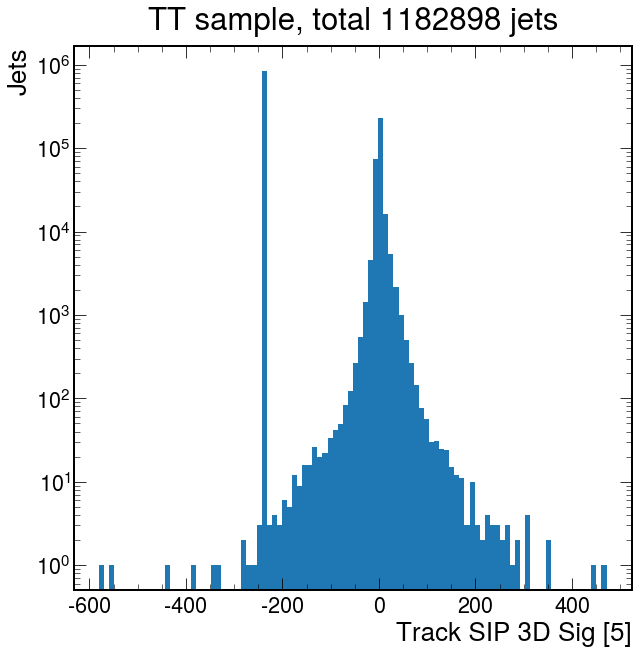

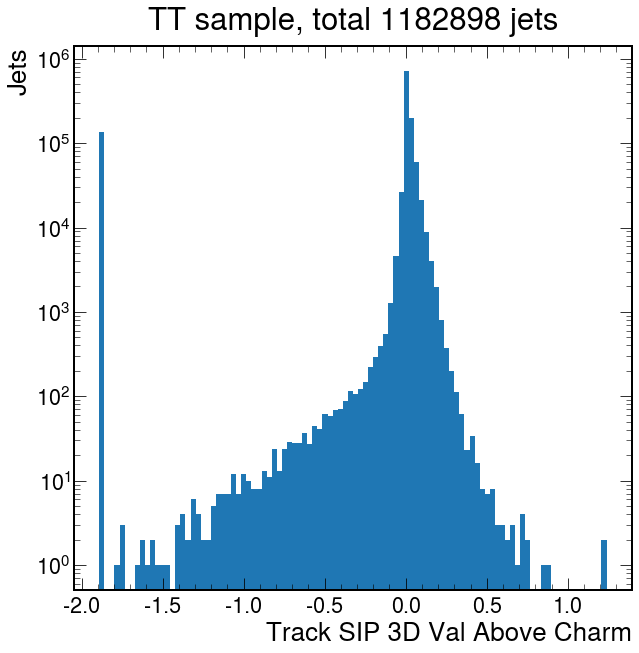

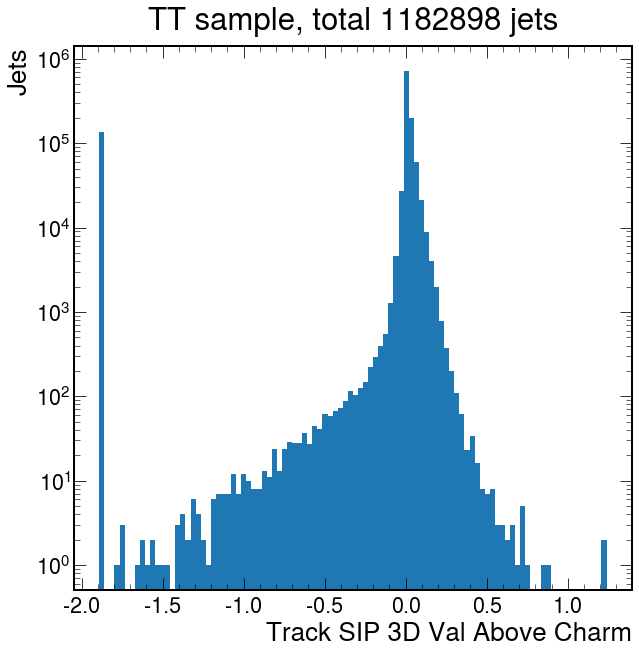

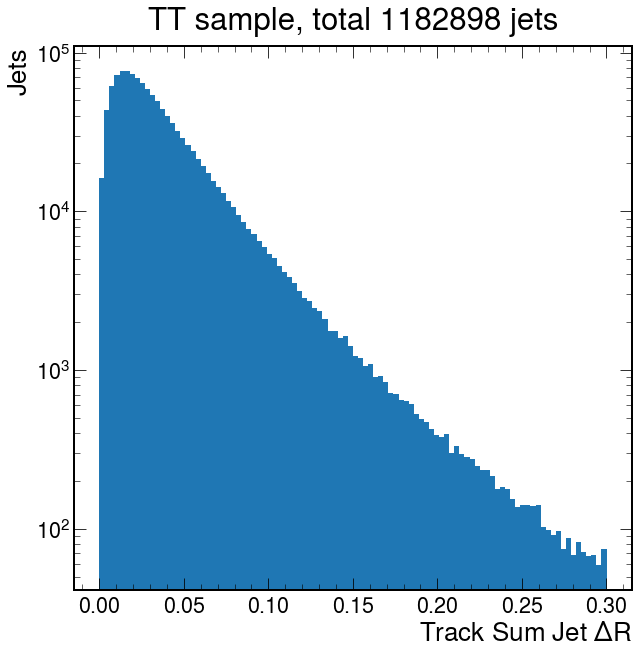

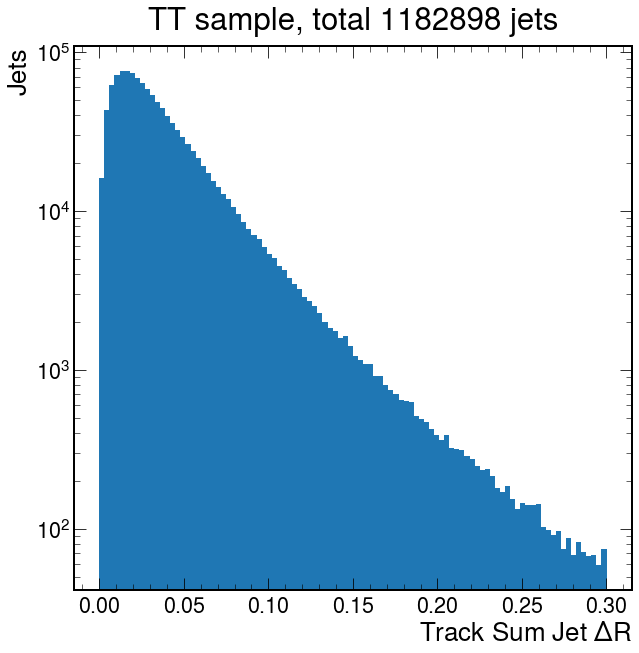

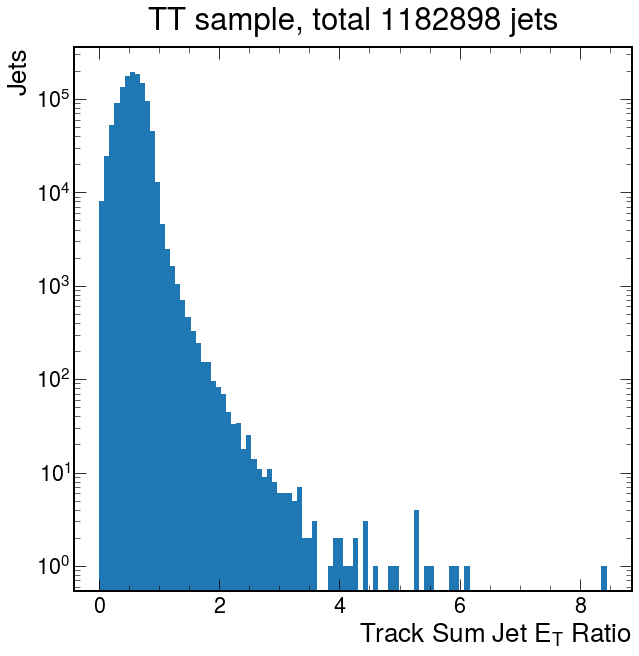

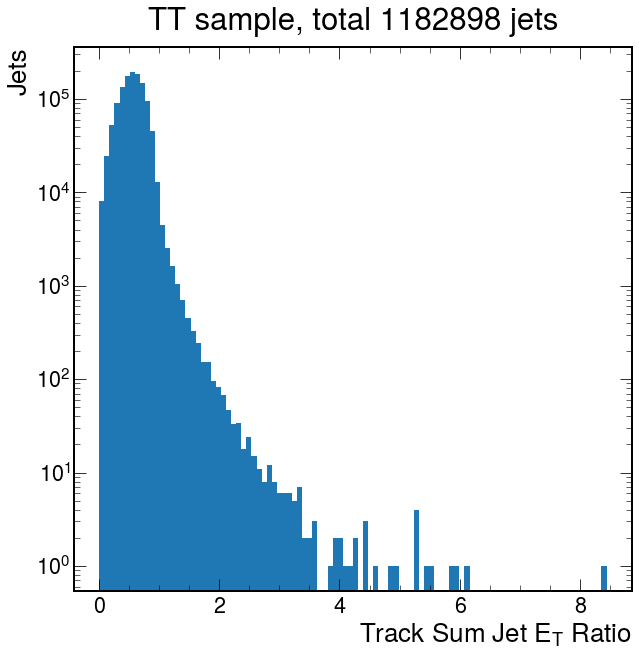

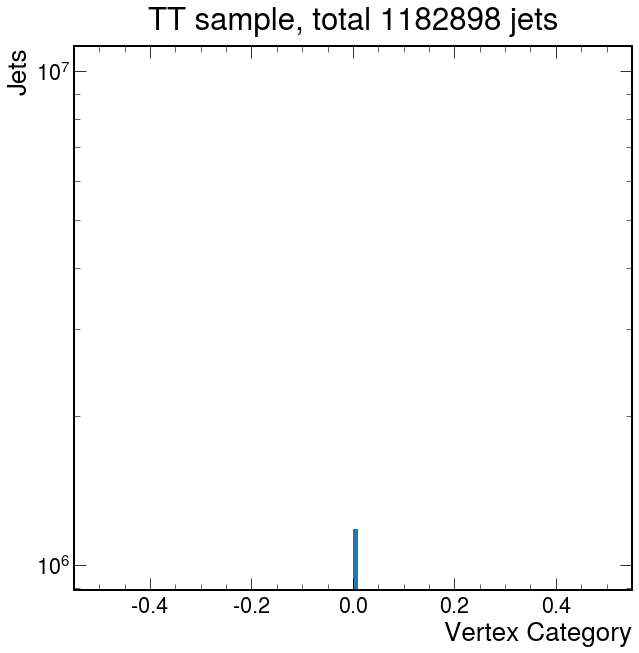

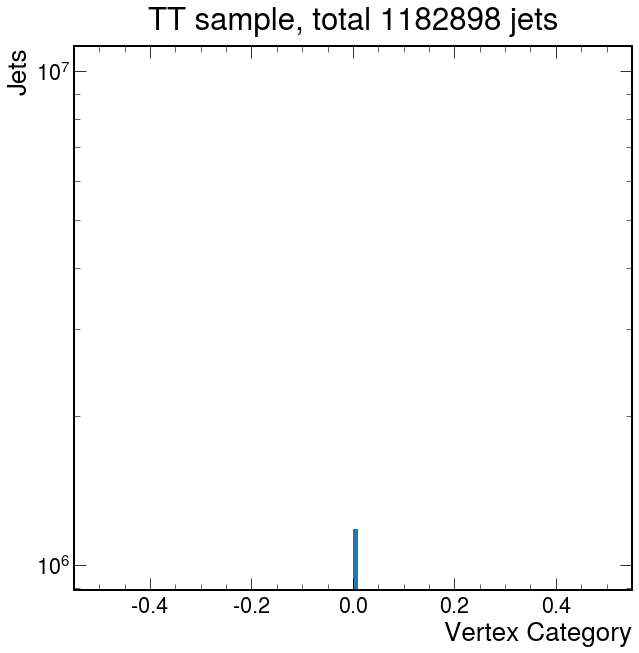

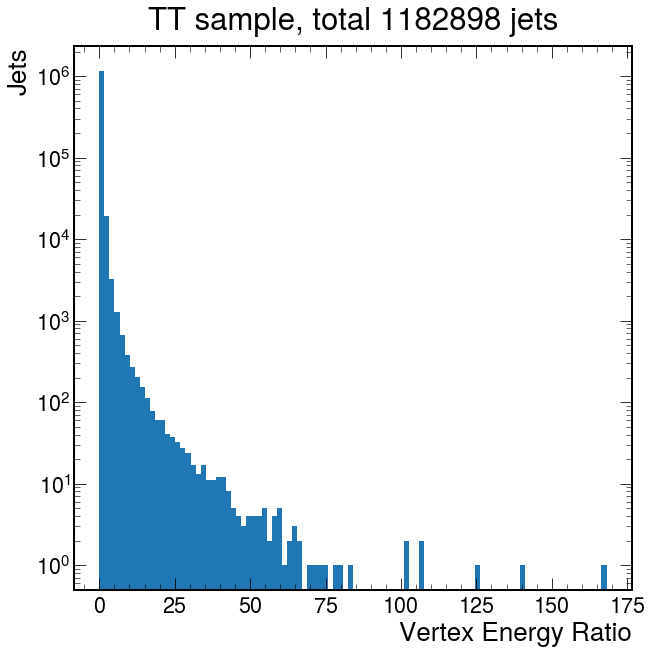

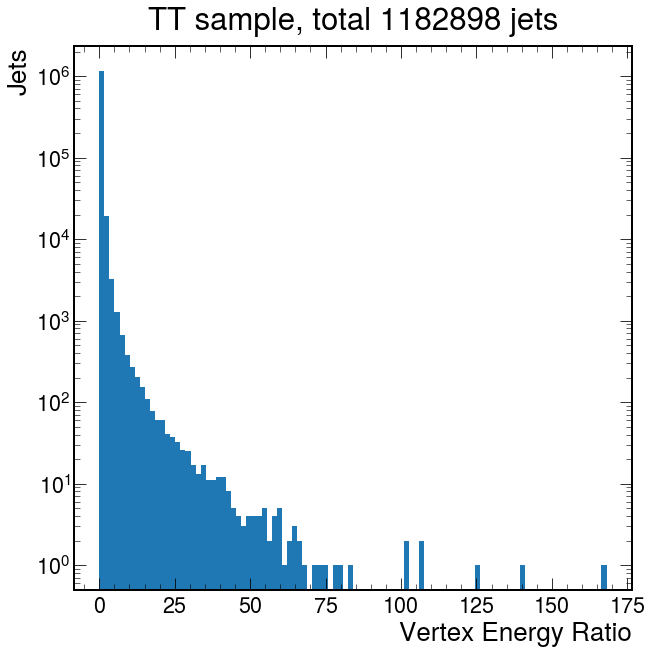

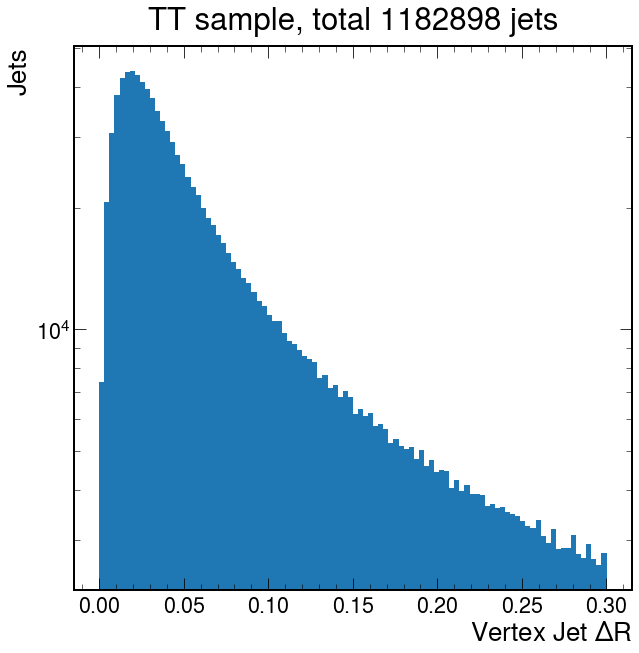

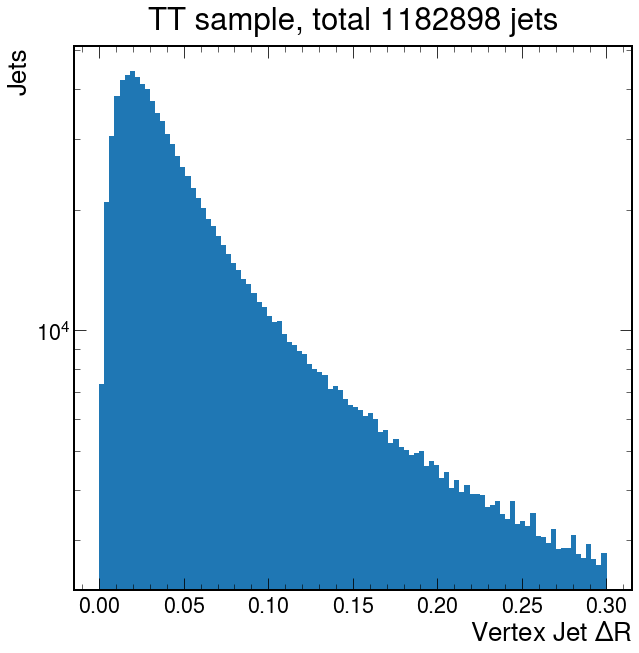

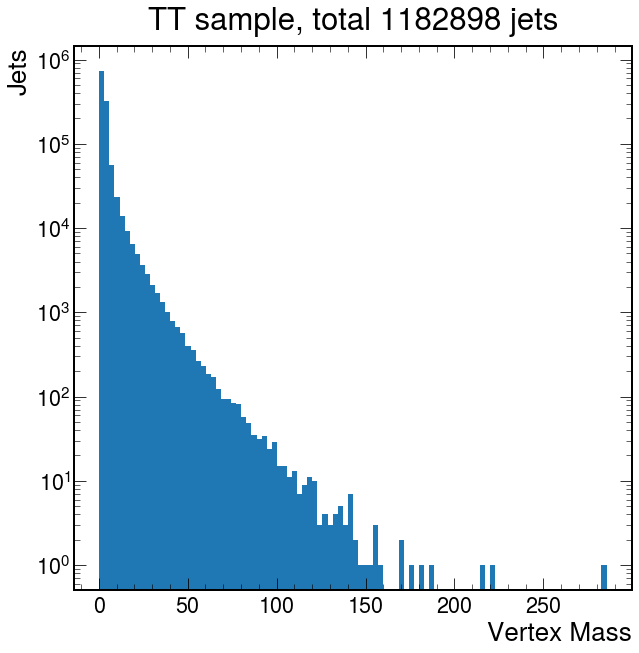

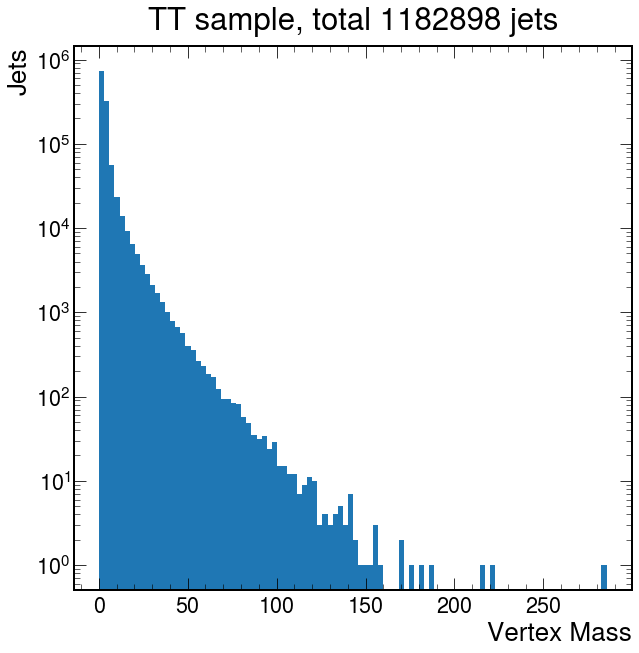

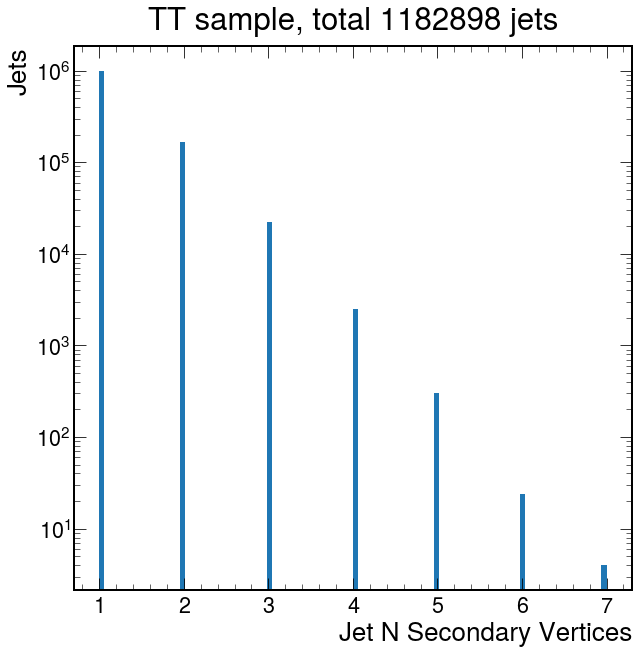

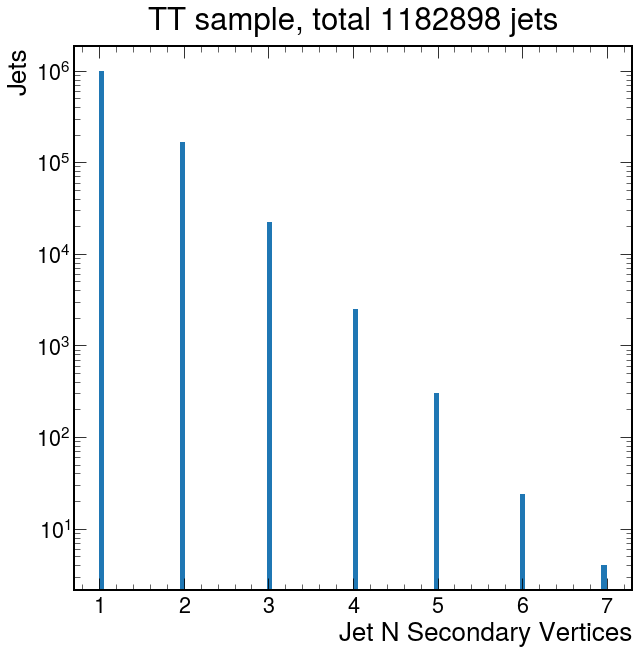

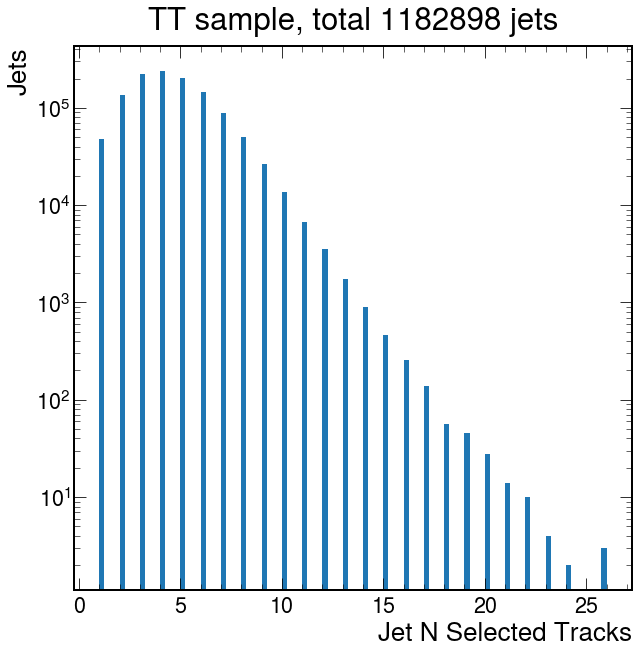

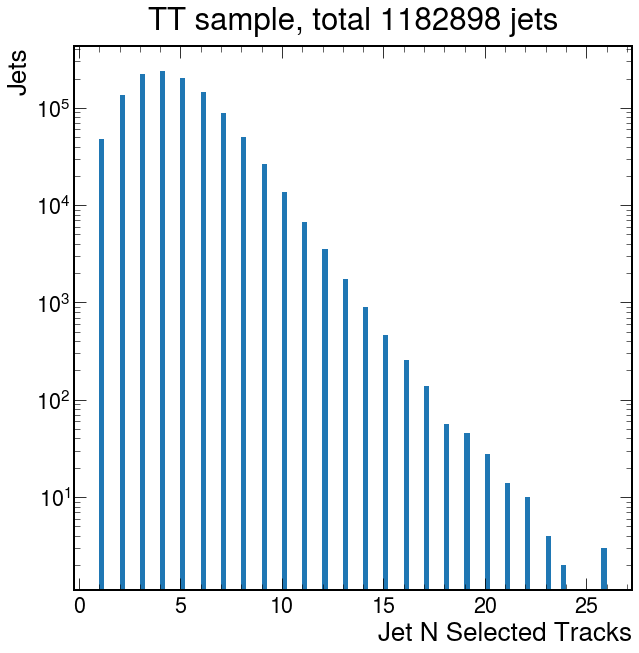

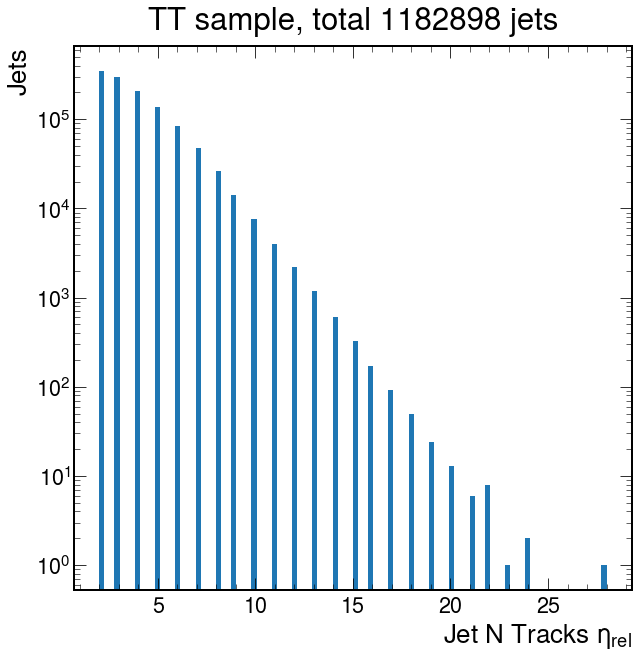

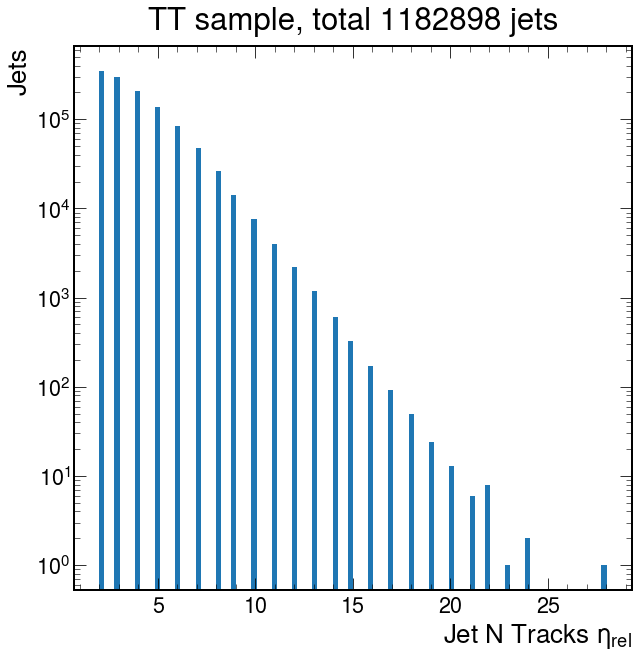

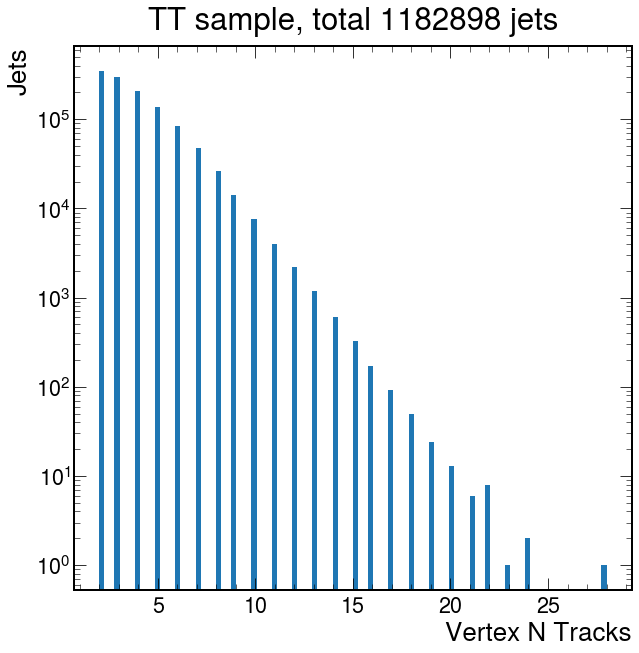

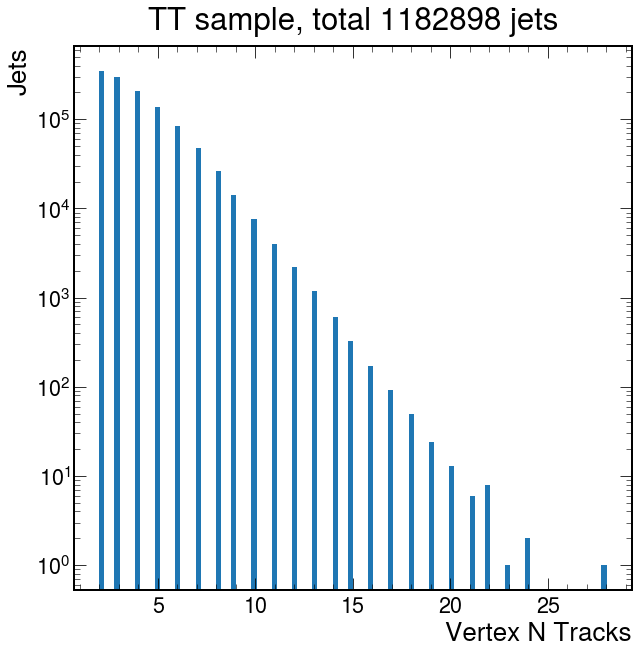

In [28]:
for k in range(67):
    plot_in_prescale(k, singleDataset, f'TT sample, total {n_total} jets')
    plot_in(k, singleScaledDataset, singleScalers, f'TT sample, total {n_total} jets')